## Appendix

In [1]:
#libraries required to perform
import numpy
#to import data frame 
import pandas as pd
from pandas import DataFrame
#to create data frame
from pandas import Series
from pandas import concat
#to read CSV
from pandas import read_csv
# to get MSE
from sklearn.metrics import mean_squared_error
#to perform normalizing of data
from sklearn.preprocessing import MinMaxScaler
#to build model
from keras.models import Sequential
# to add LSTM, Bidirectional LSTM, CNN LSTM layers
from keras.layers import *
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#to get accuracy
from tensorflow.keras.metrics import *
# to perform square root for MSE
from math import sqrt
#to plot data
import matplotlib.pyplot as plt
#for callbacks such as earlystopping, Learning rate
from tensorflow.keras.callbacks import *
#to perform cartesian product for hyper parameter combinations
from itertools import product
#seaborn library for plotting
import seaborn as sns
#to set figure size parameters for seaborn plots
from pylab import rcParams
import plotly.express as px
#to retreive dates
import datetime as dt
#for setting seed
import random

In [2]:
#importing data 
data = pd.read_csv("GE.csv")
#visualizing first 5 columns of data set
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-10-23  180.307693  180.307693  170.615387  171.692307  163.258240   
1  2017-10-24  170.153839  171.615387  167.307693  168.384613  160.112991   
2  2017-10-25  168.000000  168.384613  163.846161  165.384613  157.260376   
3  2017-10-26  165.923080  166.538467  163.076920  164.000000  155.943741   
4  2017-10-27  163.538467  163.846161  158.769226  159.923080  152.067123   

     Volume  
0  24354317  
1  17370067  
2  14367366  
3  11216881  
4  12809498

In [3]:
#date function to get dates in date-month-year format
def date(data):
     #retriving dates of data frame to a list
    train_dates=list(data['Date'])
    dates=[dt.datetime.strptime(date,'%Y-%m-%d').date() for date in train_dates]
    return dates

In [4]:
#retreving dates
dates=date(data)

In [5]:
#setting Date as index for the data
data=data.set_index('Date')

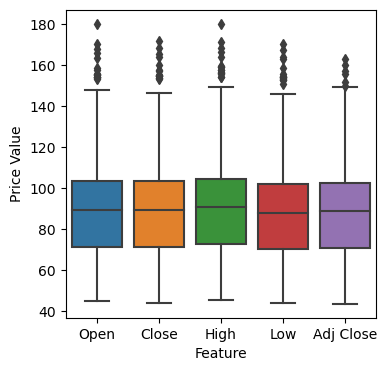

In [6]:
#setting size for plot
rcParams['figure.figsize'] = 4, 4
#boxplot for open,close,high,low,adj close
sns.boxplot(data=data[["Open", "Close","High","Low","Adj Close"]])
plt.xlabel('Feature')
plt.ylabel('Price Value')
plt.show()

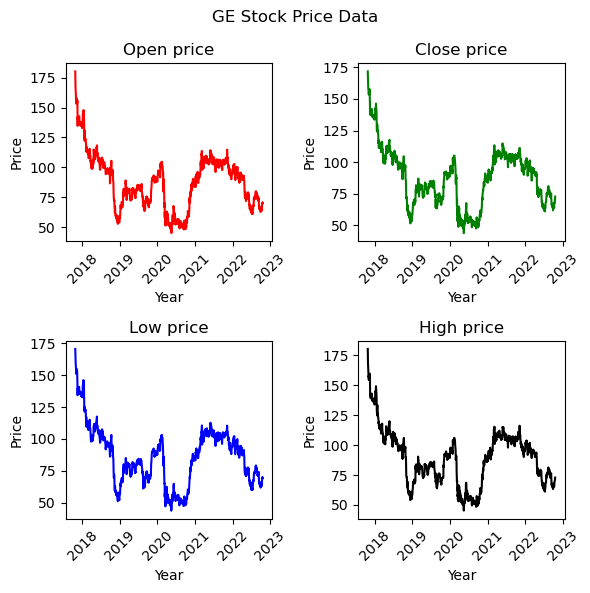

In [7]:
# making subplots
fig, ax = plt.subplots(2, 2,figsize=(6,6))
#main title
fig.suptitle('GE Stock Price Data')
# set data with subplots and plot
#first sub plot for open values
ax[0, 0].plot(dates,data.Open.values, color='red')
#second sub plot for close values
ax[0, 1].plot(dates,data.Close.values, color='green')
#third sub plot for Low values
ax[1, 0].plot(dates,data.Low.values, color='blue')
#fourth sub plot for High values
ax[1, 1].plot(dates,data.High.values, color='black')

# setting the title to 1st subplot and labels
ax[0, 0].set_title("Open price")
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Price")
ax[0, 0].tick_params(axis='x',rotation=45)
# setting the title to 2nd subplot and labels
ax[0, 1].set_title("Close price")
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Price")
ax[0, 1].tick_params(axis='x',rotation=45)
# setting the title to 3rd subplot and labels
ax[1, 0].set_title("Low price")
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("Price")
ax[1, 0].tick_params(axis='x',rotation=45)
# setting the title to 4th subplot and labels
ax[1, 1].set_title("High price")
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("Price")
ax[1, 1].tick_params(axis='x',rotation=45) 
# set spacing
fig.tight_layout()


plt.show()

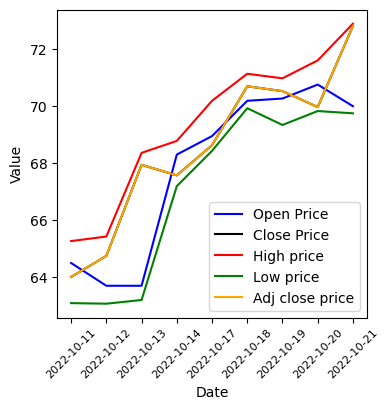

<AxesSubplot:>

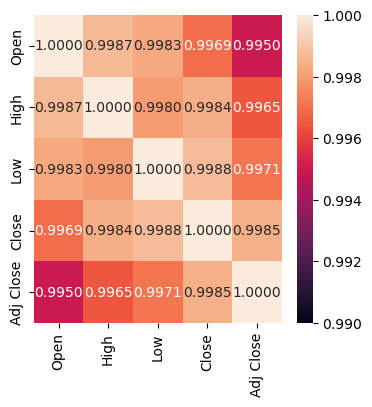

In [8]:
#sample data to get last 10 days data
sample=data.iloc[1250:,:-1]
#line plot for open price data
sns.lineplot(data=sample,x='Date',y='Open',color='blue',label="Open Price")
#line plot for close price data
sns.lineplot(data=sample,x='Date',y='Close',color='black',label="Close Price")
#line plot for high price data
sns.lineplot(data=sample,x='Date',y='High',color='red',label="High price")
#line plot for low price data
sns.lineplot(data=sample,x='Date',y='Low',color='green',label="Low price")
#line plot for Adj close price data
sns.lineplot(data=sample,x='Date',y='Adj Close',color='orange',label="Adj close price")
#setting labels
plt.xlabel('Date')
plt.ylabel('Value')
#rotating x ticks
plt.xticks(rotation=45, fontsize=8)
plt.show()


#rcParams['figure.figsize'] = 6, 5
#heat map for the correlation of features in data
sns.heatmap(data.iloc[0:,:-1].corr(),annot=True,vmin=0.99,vmax=1.0,fmt='.4f')


### Functions for data extraction, data transformation and splitting data

In [9]:
#feature extraction
def feature_extract(dataset):
    #selecting only Open price values
    dataset = dataset.iloc[:,1].values
    #reshaping data
    dataset = dataset.reshape(-1,1) #(1259, )
    #converting dataset type to float
    dataset = dataset.astype("float32")
    return dataset


In [10]:
#data normalising
def data_transform(dataset):
    #setting seed
    random.seed(10)
    # scaling the data for better model building and predictions using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    # passing the reshaped 'open' data to scale
    dataset = scaler.fit_transform(dataset)
    return dataset


In [11]:
#data de-normalizing
def inverse_transform(dataset,predictions):
    #setting seed
    random.seed(10)
    # scaling the data for better model building and predictions using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    # passing the reshaped 'open' data to scale
    dataset = scaler.fit_transform(dataset)
    #to rescale the data 
    preds = scaler.inverse_transform(predictions)
    return preds

In [12]:
#data splitting
def split_data(dataset):
    # splitting the data into training and testing
    train_size = int(len(dataset) * 0.75) # Split dataset 75% for train set, 25% for test set
    test_size = len(dataset) - train_size
    #training data
    train = dataset[0:train_size,:]
    #testing data
    test = dataset[train_size:len(dataset),:]
    #size of train and test data
    print("train size: {}, test size: {} ".format(len(train), len(test)))
    return train,test 

In [13]:
#training data
def train_data(train):
    #creating trainX and trainY data for model training
    time_stemp = 1
    dataX = []
    dataY = []
    for i in range(len(train)-time_stemp-1):
        a = train[i:(i+time_stemp), 0]
        dataX.append(a)
        dataY.append(train[i + time_stemp, 0])
    #making trainX and trainY as numpy array for model training
    trainX = numpy.array(dataX)
    trainY = numpy.array(dataY)
    return trainX,trainY

In [14]:
#testing data
def test_data(test):
    #Creating testX and testY for model testing
    #using last 100 days data for predicting
    time_stemp = 1
    dataX = []
    dataY = []
    #appending 100 days data for model test prediction
    for i in range(len(test)-time_stemp-1):
        a = test[i:(i+time_stemp), 0]
        dataX.append(a)
        dataY.append(test[i + time_stemp, 0])
    #making testX and testY as numpy array for model testing
    testX = numpy.array(dataX)
    testY = numpy.array(dataY)
    return testX,testY


In [15]:
#reshaping testX and trainX for modelling
def shape_data(trainX,testX):
    #reshaping trainX and testX 
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    return trainX, testX


### Function for future predictions and Predictions of Model

In [16]:
#for future predictions function
def future_preds(dates,dataset,model,testX,time):
    #assining dates to future predictions for 100 days starting from 21st October 2022
    forecast_dates=pd.date_range(list(dates)[-1],periods=time,freq='1d').tolist()

    #predicting price for next 100 days
    forecast=model.predict(testX[-time:])

    #appending dates to array
    forecast_dates1=[]
    for i in forecast_dates:
        forecast_dates1.append(i.date())

    #as the predictions are in scaled form, inverting them by using below command
    y_pred_future=inverse_transform(dataset,forecast)

    #converting the future predictions and dates as index to data frame
    df_forecast = pd.DataFrame(y_pred_future,columns=['Open']).set_index(
                                                    pd.Series(forecast_dates))
    
    return df_forecast

In [17]:
#predictions of data
def predict(model,data):
    return model.predict(data)

### Function for Model Building

In [18]:
#lstm model function
def lstm_model(x_train,y_train,x_test,y_test,config):
    #configurations received for lstm layers and hyperparametrs
    stacked_layer, bi_directional_layer,cnn_layer,single_layer,
                      n_neurons,n_batch,dropout,optimizer,n_epochs= config
    #buliding sequential model for lstm
    regressor = Sequential()
    #layers
    #if stacked lstm
    if stacked_layer:
        #adding  LSTM layer to model with received neurons and trainX shape 
        regressor.add(LSTM(units=n_neurons, return_sequences=True,
                                   input_shape=(x_train.shape[1], x_train.shape[2])))
        #adding dropout to the model
        regressor.add(Dropout(dropout))
        #adding  LSTM layer to model with received neurons and trainX shape 
        regressor.add(LSTM(units=n_neurons, return_sequences=True,
                                   input_shape=(x_train.shape[1], x_train.shape[2])))
        #adding dropout to the model
        regressor.add(Dropout(dropout))
        #adding  LSTM layer to model with received neurons and trainX shape 
        regressor.add(LSTM(units=n_neurons, return_sequences=True,
                               input_shape=(x_train.shape[1], x_train.shape[2])))
        #adding dropout to the model
        regressor.add(Dropout(dropout))
        #adding  LSTM layer to model with received neurons and trainX shape 
        regressor.add(LSTM(units=n_neurons, return_sequences = False,
                               input_shape=(x_train.shape[1], x_train.shape[2])))
        #adding dropout to the model
        regressor.add(Dropout(dropout))
   
    #If Bidirectional LSTM 
    if bi_directional_layer:
        #adding BIDIRECTIONAL lstm to model and setting relu activation function
        regressor.add(Bidirectional(LSTM(units= n_neurons, activation='relu'),
                                            input_shape=(x_train.shape[1], x_train.shape[2])))
        #adding dropout to the model
        regressor.add(Dropout(dropout))
    
    #If Convolutional Neural Network LSTM layer
    if cnn_layer:
        #adding 1D CNN layer with relu activation function to model
        regressor.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),
                                          input_shape=(None,x_train.shape[1], x_train.shape[2])))
        #adding maxpooling layer to model
        regressor.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))
        #flattening the output of Maxpool layer
        regressor.add(TimeDistributed(Flatten()))
        #adding LSTM layer to model
        regressor.add(LSTM(units=n_neurons, return_sequences = False,
                                   input_shape=(x_train.shape[1], x_train.shape[2])))
        #adding dropout to the model
        regressor.add(Dropout(dropout))
    #if single layer LSTM
    if single_layer:
        #adding 1 lstm layer    
        regressor.add(LSTM(units=n_neurons, return_sequences = False,
                               input_shape=(x_train.shape[1], x_train.shape[2])))
        #adding dropout to the model
        regressor.add(Dropout(dropout))
    #adding dense layer for the model        
    regressor.add(Dense(units=1, activation='linear'))
    #compiling model with MSE and optimizer
    regressor.compile(optimizer= optimizer, loss='mse')
    #callbacks
    #early stopping to avoid over fitting
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    # to store and load model whenevr required
    mcp=ModelCheckpoint(filepath='weight.h5',monitor='val_loss',verbose=1,
                                    save_best_only=True,save_weights_only=True)
    
    # for learning rate to the model
    rlr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=10,verbose=1)
    #TensorBoard callback to model
    tb=TensorBoard('logs')
    # fitting model with X-train,y_train data, 
    #setting validation_data as X_test and Y_test with epochs, batchsize and callbacks
    history=regressor.fit(x_train, y_train, validation_data=(x_test,y_test),
                                      epochs= n_epochs, batch_size=n_batch, 
                                      callbacks=[es, mcp,rlr,tb], verbose=0)
    #returning model and history
    return regressor,history


###  Function for Tuning Hyperparameters

In [19]:
#function for tuning hyper parameters
def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    #different set of numbers for each hyper parameter are passed to config and stored in below variable
    stacked_layer, bi_directional_layer, cnn_layer, single_layer, 
                n_neurons, n_batch_size, dropout,optimizers,epochs = config
    #cartesian product to get all possible combinations
    possible_combinations = list(product(stacked_layer, bi_directional_layer, cnn_layer,
                                          single_layer,n_neurons, n_batch_size,
                                                    dropout,optimizers,epochs))
    
    #priniting all the possible combinations
    print(possible_combinations)
    print('\n')
    #empty list to store hyper parameters and MSE values later
    hist = []
    
    #Iterating through all possible combinations (108) here
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        #storing set of possible combinations one after other 
        stacked_layer, bi_directional_layer, cnn_layer, single_layer,n_neurons,
                     n_batch_size, dropout,optimizers,epochs = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #buliding sequential model for lstm
        regressor = Sequential()
        #layers
        #if stacked lstm
        if stacked_layer:
            #adding  LSTM layer to model with received neurons and trainX shape 
            regressor.add(LSTM(units=n_neurons, return_sequences=True,
                                input_shape=(x_train.shape[1], x_train.shape[2])))
            
            #adding dropout to the model
            regressor.add(Dropout(dropout))
            
            #adding  LSTM layer to model with received neurons and trainX shape 
            regressor.add(LSTM(units=n_neurons, return_sequences=True,
                                input_shape=(x_train.shape[1], x_train.shape[2])))
            #adding dropout to the model
            regressor.add(Dropout(dropout))
            
            #adding  LSTM layer to model with received neurons and trainX shape 
            regressor.add(LSTM(units=n_neurons, return_sequences=True,
                                input_shape=(x_train.shape[1], x_train.shape[2])))
            #adding dropout to the model
            regressor.add(Dropout(dropout))
            
            #adding  LSTM layer to model with received neurons and trainX shape 
            regressor.add(LSTM(units=n_neurons, return_sequences = False,
                                input_shape=(x_train.shape[1], x_train.shape[2])))
            #adding dropout to the model
            regressor.add(Dropout(dropout))

        #If Bidirectional LSTM 
        if bi_directional_layer:
            #adding BIDIRECTIONAL lstm to model and setting relu activation function
            regressor.add(Bidirectional(LSTM(units= n_neurons, activation='relu'),
                                        input_shape=(x_train.shape[1], x_train.shape[2])))
            
            #adding dropout to the model
            regressor.add(Dropout(dropout))

        #If Convolutional Neural Network LSTM layer
        if cnn_layer:
            #adding 1D CNN layer with relu activation function to model
            regressor.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),
                                            input_shape=(None,x_train.shape[1], x_train.shape[2])))
            #adding maxpooling layer to model
            regressor.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))
            
            #flattening the output of Maxpool layer
            regressor.add(TimeDistributed(Flatten()))
            
            #adding LSTM layer to model
            regressor.add(LSTM(units=n_neurons, return_sequences = False,
                                input_shape=(x_train.shape[1], x_train.shape[2])))
            #adding dropout to the model
            regressor.add(Dropout(dropout))
            
        #if single layer LSTM
        if single_layer:
            #adding 1 lstm layer    
            regressor.add(LSTM(units=n_neurons, return_sequences = False,
                                input_shape=(x_train.shape[1], x_train.shape[2])))
            
            #adding dropout to the model
            regressor.add(Dropout(dropout))

        #adding dense layer for the model        
        regressor.add(Dense(units=1, activation='linear'))
        #compiling model with MSE and optimizer
        regressor.compile(optimizer= optimizers, loss='mse')
        #callbacks
        #early stopping to avoid over fitting
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        
        '''''
        From the mentioned article above --> If a validation dataset is specified
        to the fit() function via the validation_data or validation_split arguments,
        then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'
        # to store and load model whenevr required
        mcp=ModelCheckpoint(filepath='weight.h5',monitor='val_loss',verbose=1,
                                        save_best_only=True,save_weights_only=True)
        
        '''''
        # First, callbacks must be instantiated.
        cb = Callback(...)
        # Then, one or more callbacks that you intend to use must be added to a Python list.
        cb_list = [cb, ...]  
        # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        model.fit(..., callbacks=cb_list) 
        '''''
        # for learning rate to the model
        rlr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=10,verbose=1)
        #TensorBoard callback to model
        tb=TensorBoard('logs')
        
        #model fitting
        regressor.fit(x_train, y_train, validation_data=(x_test,y_test),
                        epochs= epochs,batch_size=n_batch_size,
                          callbacks=[es, mcp,rlr,tb], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')
        
        #valuating train MSE
        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        #valuating test MSE
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)
        #appending possible combination hyper parameters with train and test MSE
        hist.append(list((stacked_layer, bi_directional_layer, cnn_layer,single_layer,
                            n_neurons, n_batch_size, dropout, optimizers,epochs,
                            train_accuracy, test_accuracy)))
        
        #printing combinations, train and test MSE
        print(f'{str(i)}-th combination = {possible_combinations[i]}
                \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist

### Functions for Forecasting errors

In [20]:
#training dataset forecating error
def train_confidence(preds,data):
    time=1
    #Actual train data 
    data=data[time:len(preds)+time]
    #residuals using train predictions and actual train data
    residuals = sorted([x - y for x, y in zip(preds, data['Open'].values)])
    #forecasting error using residuals
    RMSFE = numpy.sqrt(sum([x**2 for x in residuals]) / len(residuals))
    #1.96*error
    band_size = 1.96*RMSFE
    #returning band size
    return band_size

#testing dataset forecasting error
def test_confidence(train_preds,test_preds,data):
    time=1
    #Actual test data 
    data=data[len(train_preds)+(time*2)+1:len(data)-1:]
    #residuals using test predictions and actual test data
    residuals = sorted([x - y for x, y in zip(test_preds, data['Open'].values)])
    #forecasting error using residuals
    RMSFE = numpy.sqrt(sum([x**2 for x in residuals]) / len(residuals))
    #1.96*error
    band_size = 1.96*RMSFE
    #returing band_size
    return band_size

###  Single Layer LSTM Analysis

In [21]:
#extracting open price data
dataset = feature_extract(data)

In [22]:
#scaling data using MinMax scaler
scaled_data = data_transform(dataset)

In [23]:
#spliting data
train,test = split_data(scaled_data)

train size: 944, test size: 315 


In [24]:
#getting trainX and trainY data
trainX,trainY = train_data(train)

In [25]:
#getting testX and testY data
testX,testY = test_data(test)

In [26]:
#reshaping trainX and trainY for model fitting
trainX,testX = shape_data(trainX,testX)

In [443]:
(stacked_layer, bi_directional_layer,cnn_layer,single_layer,
                      n_neurons,n_batch,dropout,optimizer,n_epochs)= config_main

In [27]:
#initial hyperparmeters for single LSTM model, so only 4th value is true
#list[stacked_lstm, bidirectional_lstm, CNN LSTm, Single LSTM, neurons,
            #       batch size, dropout, optimizer, epochs]
config_main = [False, False, False,True, 64, 32, 0.2,'adam',50] 
# ------------------single LSTM-----------------------
#model fitting
single_lstm_model,single_lstm_history = lstm_model(trainX,trainY,testX,testY,config_main)


Epoch 00001: val_loss improved from inf to 0.04528, saving model to weight.h5

Epoch 00002: val_loss improved from 0.04528 to 0.01076, saving model to weight.h5

Epoch 00003: val_loss improved from 0.01076 to 0.00593, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00593 to 0.00527, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00527 to 0.00436, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00436 to 0.00354, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00354 to 0.00278, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00278 to 0.00204, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00204 to 0.00140, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00140 to 0.00092, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00092 to 0.00059, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00059 to 0.00038, saving model to weight.h5

Epoch 0

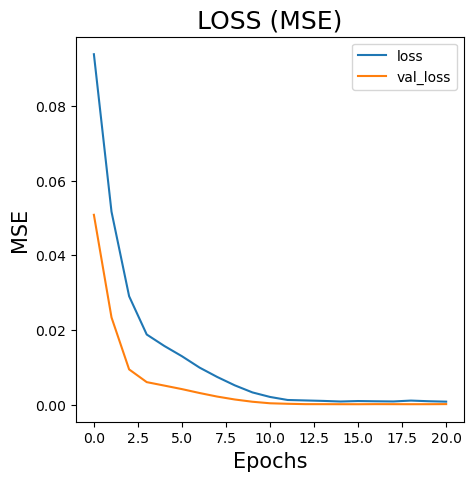

In [428]:
#figure size
fig = plt.figure(figsize=(5,5))
#plotting MSE aginst epochs for training data 
plt.plot(single_lstm_history.epoch, 
                 single_lstm_history.history['loss'], label="loss")
#plotting MSE against epochs for validation data i.e., Test data
plt.plot(single_lstm_history.epoch, 
                 single_lstm_history.history['val_loss'], label="val_loss")

#setting title and labels
plt.title("LOSS (MSE)", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
#plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [29]:
#evaluating model  
results_single = single_lstm_model.evaluate(testX, testY)
#results of model
print("test loss, test MSE:", numpy.round(results_single, 6))

10/10 [==============================] - 0s 2ms/step - loss: 1.8323e-04
test loss, test MSE: 0.000183


In [30]:
# list of [[stacked],[bi_directional], [cnn],[single_layer] [n_neurons],
     #           [n_batch_size], [dropout],[optimizers],[epochs]]
config1 = [[False], [False], [False], [True],[16, 32, 64], 
              [32, 64, 128], [0.2],['adam','adamax','SGD','RMSprop'],[20,50,100]]  


#fitting hyperparameter tuning model
hist = LSTM_HyperParameter_Tuning(config1, trainX, trainY, testX, testY) 

[(False, False, False, True, 16, 32, 0.2, 'adam', 20), (False, False, False, True, 16, 32, 0.2, 'adam', 50), (False, False, False, True, 16, 32, 0.2, 'adam', 100), (False, False, False, True, 16, 32, 0.2, 'adamax', 20), (False, False, False, True, 16, 32, 0.2, 'adamax', 50), (False, False, False, True, 16, 32, 0.2, 'adamax', 100), (False, False, False, True, 16, 32, 0.2, 'SGD', 20), (False, False, False, True, 16, 32, 0.2, 'SGD', 50), (False, False, False, True, 16, 32, 0.2, 'SGD', 100), (False, False, False, True, 16, 32, 0.2, 'RMSprop', 20), (False, False, False, True, 16, 32, 0.2, 'RMSprop', 50), (False, False, False, True, 16, 32, 0.2, 'RMSprop', 100), (False, False, False, True, 16, 64, 0.2, 'adam', 20), (False, False, False, True, 16, 64, 0.2, 'adam', 50), (False, False, False, True, 16, 64, 0.2, 'adam', 100), (False, False, False, True, 16, 64, 0.2, 'adamax', 20), (False, False, False, True, 16, 64, 0.2, 'adamax', 50), (False, False, False, True, 16, 64, 0.2, 'adamax', 100), (Fa


Epoch 00001: val_loss improved from inf to 0.08388, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08388 to 0.05118, saving model to weight.h5

Epoch 00003: val_loss improved from 0.05118 to 0.02829, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02829 to 0.01406, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01406 to 0.00845, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00845 to 0.00699, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00699 to 0.00647, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00647 to 0.00589, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00589 to 0.00531, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00531 to 0.00471, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00471 to 0.00408, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00408 to 0.00345, saving model to weight.h5

Epoch 0


Epoch 00001: val_loss improved from inf to 0.04919, saving model to weight.h5

Epoch 00002: val_loss improved from 0.04919 to 0.02700, saving model to weight.h5

Epoch 00003: val_loss improved from 0.02700 to 0.01436, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01436 to 0.00847, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00847 to 0.00581, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00581 to 0.00491, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00491 to 0.00453, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00453 to 0.00427, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00427 to 0.00407, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00407 to 0.00385, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00385 to 0.00365, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00365 to 0.00344, saving model to weight.h5

Epoch 0


Epoch 00049: val_loss did not improve from 0.00023

Epoch 00050: val_loss improved from 0.00023 to 0.00022, saving model to weight.h5

Epoch 00051: val_loss did not improve from 0.00022

Epoch 00052: val_loss did not improve from 0.00022

Epoch 00053: val_loss did not improve from 0.00022

Epoch 00054: val_loss did not improve from 0.00022

Epoch 00055: val_loss improved from 0.00022 to 0.00021, saving model to weight.h5

Epoch 00056: val_loss did not improve from 0.00021

Epoch 00057: val_loss did not improve from 0.00021

Epoch 00058: val_loss did not improve from 0.00021

Epoch 00059: val_loss did not improve from 0.00021

Epoch 00060: val_loss did not improve from 0.00021

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 00060: early stopping
5-th combination = (False, False, False, True, 16, 32, 0.2, 'adamax', 100) 
 train accuracy: 0.00041745539056137204 and test accuracy: 0.0002783589588943869
------------------------------------------------


Epoch 00004: val_loss improved from 0.01323 to 0.01180, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01180 to 0.01138, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01138 to 0.01123, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01123 to 0.01114, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01114 to 0.01108, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01108 to 0.01102, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01102 to 0.01096, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01096 to 0.01091, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01091 to 0.01086, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01086 to 0.01081, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01081 to 0.01075, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01075 to 0.01071, saving model to weight.h5

Epo


Epoch 00001: val_loss improved from inf to 0.07277, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07277 to 0.03870, saving model to weight.h5

Epoch 00003: val_loss improved from 0.03870 to 0.01651, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01651 to 0.00877, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00877 to 0.00735, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00735 to 0.00616, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00616 to 0.00510, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00510 to 0.00403, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00403 to 0.00290, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00290 to 0.00201, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00201 to 0.00123, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00123 to 0.00068, saving model to weight.h5

Epoch 0


Epoch 00001: val_loss improved from inf to 0.09194, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09194 to 0.06950, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06950 to 0.05053, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05053 to 0.03522, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03522 to 0.02340, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02340 to 0.01511, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01511 to 0.01028, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01028 to 0.00775, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00775 to 0.00661, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00661 to 0.00618, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00618 to 0.00592, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00592 to 0.00568, saving model to weight.h5

Epoch 0


Epoch 00049: val_loss improved from 0.00028 to 0.00028, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00028 to 0.00027, saving model to weight.h5

Epoch 00051: val_loss improved from 0.00027 to 0.00022, saving model to weight.h5

Epoch 00052: val_loss did not improve from 0.00022

Epoch 00053: val_loss did not improve from 0.00022

Epoch 00054: val_loss did not improve from 0.00022

Epoch 00054: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00055: val_loss did not improve from 0.00022

Epoch 00056: val_loss did not improve from 0.00022
Epoch 00056: early stopping
14-th combination = (False, False, False, True, 16, 64, 0.2, 'adam', 100) 
 train accuracy: 0.0004305893089622259 and test accuracy: 0.0002607336500659585
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------


Epoch 00005: val_loss improved from 0.05850 to 0.04750, saving model to weight.h5

Epoch 00006: val_loss improved from 0.04750 to 0.03816, saving model to weight.h5

Epoch 00007: val_loss improved from 0.03816 to 0.03041, saving model to weight.h5

Epoch 00008: val_loss improved from 0.03041 to 0.02404, saving model to weight.h5

Epoch 00009: val_loss improved from 0.02404 to 0.01905, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01905 to 0.01525, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01525 to 0.01247, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01247 to 0.01047, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01047 to 0.00920, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00920 to 0.00837, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00837 to 0.00779, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00779 to 0.00744, saving model to weight.h5

Epo


Epoch 00017: val_loss improved from 0.00972 to 0.00968, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00968 to 0.00965, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00965 to 0.00961, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00961 to 0.00958, saving model to weight.h5
18-th combination = (False, False, False, True, 16, 64, 0.2, 'SGD', 20) 
 train accuracy: 0.026444554328918457 and test accuracy: 0.009580683894455433
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
20th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.05093, saving model to weight.h5

Epoch 00002: val_loss improved from 0.05093 to 0.03029, saving model to 


Epoch 00037: val_loss improved from 0.01145 to 0.01142, saving model to weight.h5

Epoch 00038: val_loss improved from 0.01142 to 0.01140, saving model to weight.h5

Epoch 00039: val_loss improved from 0.01140 to 0.01138, saving model to weight.h5

Epoch 00040: val_loss improved from 0.01138 to 0.01135, saving model to weight.h5

Epoch 00041: val_loss improved from 0.01135 to 0.01132, saving model to weight.h5

Epoch 00042: val_loss improved from 0.01132 to 0.01130, saving model to weight.h5

Epoch 00043: val_loss improved from 0.01130 to 0.01127, saving model to weight.h5

Epoch 00044: val_loss improved from 0.01127 to 0.01125, saving model to weight.h5

Epoch 00045: val_loss improved from 0.01125 to 0.01122, saving model to weight.h5

Epoch 00046: val_loss improved from 0.01122 to 0.01120, saving model to weight.h5

Epoch 00047: val_loss improved from 0.01120 to 0.01117, saving model to weight.h5

Epoch 00048: val_loss improved from 0.01117 to 0.01115, saving model to weight.h5

Epo


Epoch 00005: val_loss improved from 0.01716 to 0.00976, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00976 to 0.00654, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00654 to 0.00564, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00564 to 0.00508, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00508 to 0.00440, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00440 to 0.00384, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00384 to 0.00324, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00324 to 0.00264, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00264 to 0.00208, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00208 to 0.00164, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00164 to 0.00121, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00121 to 0.00088, saving model to weight.h5

Epo


Epoch 00006: val_loss improved from 0.03630 to 0.02820, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02820 to 0.02158, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02158 to 0.01643, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01643 to 0.01248, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01248 to 0.00967, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00967 to 0.00773, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00773 to 0.00649, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00649 to 0.00576, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00576 to 0.00534, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00534 to 0.00510, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00510 to 0.00494, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00494 to 0.00482, saving model to weight.h5

Epo


Epoch 00050: val_loss improved from 0.00148 to 0.00139, saving model to weight.h5

Epoch 00051: val_loss improved from 0.00139 to 0.00130, saving model to weight.h5

Epoch 00052: val_loss improved from 0.00130 to 0.00122, saving model to weight.h5

Epoch 00053: val_loss improved from 0.00122 to 0.00115, saving model to weight.h5

Epoch 00054: val_loss improved from 0.00115 to 0.00106, saving model to weight.h5

Epoch 00055: val_loss improved from 0.00106 to 0.00099, saving model to weight.h5

Epoch 00056: val_loss improved from 0.00099 to 0.00092, saving model to weight.h5

Epoch 00057: val_loss improved from 0.00092 to 0.00086, saving model to weight.h5

Epoch 00058: val_loss improved from 0.00086 to 0.00081, saving model to weight.h5

Epoch 00059: val_loss improved from 0.00081 to 0.00076, saving model to weight.h5

Epoch 00060: val_loss improved from 0.00076 to 0.00069, saving model to weight.h5

Epoch 00061: val_loss improved from 0.00069 to 0.00063, saving model to weight.h5

Epo


Epoch 00041: val_loss improved from 0.00734 to 0.00725, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00725 to 0.00715, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00715 to 0.00706, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00706 to 0.00696, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00696 to 0.00686, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00686 to 0.00677, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00677 to 0.00667, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00667 to 0.00657, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00657 to 0.00647, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00647 to 0.00637, saving model to weight.h5
28-th combination = (False, False, False, True, 16, 128, 0.2, 'adamax', 50) 
 train accuracy: 0.01720297522842884 and test accuracy: 0.006373145151883364
----------------


Epoch 00087: val_loss improved from 0.00115 to 0.00110, saving model to weight.h5

Epoch 00088: val_loss improved from 0.00110 to 0.00106, saving model to weight.h5

Epoch 00089: val_loss improved from 0.00106 to 0.00102, saving model to weight.h5

Epoch 00090: val_loss improved from 0.00102 to 0.00098, saving model to weight.h5

Epoch 00091: val_loss improved from 0.00098 to 0.00094, saving model to weight.h5

Epoch 00092: val_loss improved from 0.00094 to 0.00091, saving model to weight.h5

Epoch 00093: val_loss improved from 0.00091 to 0.00087, saving model to weight.h5

Epoch 00094: val_loss improved from 0.00087 to 0.00083, saving model to weight.h5

Epoch 00095: val_loss improved from 0.00083 to 0.00080, saving model to weight.h5

Epoch 00096: val_loss improved from 0.00080 to 0.00078, saving model to weight.h5

Epoch 00097: val_loss improved from 0.00078 to 0.00075, saving model to weight.h5

Epoch 00098: val_loss improved from 0.00075 to 0.00072, saving model to weight.h5

Epo


Epoch 00001: val_loss improved from inf to 0.08254, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08254 to 0.06184, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06184 to 0.04679, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04679 to 0.03648, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03648 to 0.02922, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02922 to 0.02392, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02392 to 0.02021, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02021 to 0.01761, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01761 to 0.01581, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01581 to 0.01440, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01440 to 0.01341, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01341 to 0.01276, saving model to weight.h5

Epoch 0


Epoch 00099: val_loss improved from 0.01054 to 0.01053, saving model to weight.h5

Epoch 00100: val_loss improved from 0.01053 to 0.01053, saving model to weight.h5
32-th combination = (False, False, False, True, 16, 128, 0.2, 'SGD', 100) 
 train accuracy: 0.028882894665002823 and test accuracy: 0.010531795211136341
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
34th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.07711, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07711 to 0.06278, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06278 to 0.05118, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05118 to 0.04131, saving model t


Epoch 00016: val_loss improved from 0.00579 to 0.00544, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00544 to 0.00511, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00511 to 0.00474, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00474 to 0.00439, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00439 to 0.00405, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00405 to 0.00374, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00374 to 0.00338, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00338 to 0.00305, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00305 to 0.00275, saving model to weight.h5

Epoch 00025: val_loss improved from 0.00275 to 0.00245, saving model to weight.h5

Epoch 00026: val_loss improved from 0.00245 to 0.00221, saving model to weight.h5

Epoch 00027: val_loss improved from 0.00221 to 0.00189, saving model to weight.h5

Epo


Epoch 00004: val_loss improved from 0.00629 to 0.00538, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00538 to 0.00478, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00478 to 0.00414, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00414 to 0.00357, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00357 to 0.00299, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00299 to 0.00246, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00246 to 0.00195, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00195 to 0.00151, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00151 to 0.00115, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00115 to 0.00086, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00086 to 0.00061, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00061 to 0.00050, saving model to weight.h5

Epo


Epoch 00039: val_loss did not improve from 0.00023

Epoch 00040: val_loss did not improve from 0.00023

Epoch 00041: val_loss did not improve from 0.00023

Epoch 00042: val_loss improved from 0.00023 to 0.00021, saving model to weight.h5

Epoch 00043: val_loss did not improve from 0.00021

Epoch 00044: val_loss did not improve from 0.00021

Epoch 00045: val_loss improved from 0.00021 to 0.00020, saving model to weight.h5

Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00046: val_loss did not improve from 0.00020

Epoch 00047: val_loss did not improve from 0.00020

Epoch 00048: val_loss did not improve from 0.00020

Epoch 00049: val_loss did not improve from 0.00020

Epoch 00050: val_loss did not improve from 0.00020
Epoch 00050: early stopping
40-th combination = (False, False, False, True, 32, 32, 0.2, 'adamax', 50) 
 train accuracy: 0.0004132143221795559 and test accuracy: 0.00024894525995478034
------------------------------------------------


Epoch 00010: val_loss improved from 0.01115 to 0.01107, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01107 to 0.01100, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01100 to 0.01093, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01093 to 0.01086, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01086 to 0.01079, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01079 to 0.01072, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01072 to 0.01065, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01065 to 0.01059, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01059 to 0.01051, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01051 to 0.01044, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01044 to 0.01038, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01038 to 0.01031, saving model to weight.h5

Epo


Epoch 00055: val_loss improved from 0.00890 to 0.00885, saving model to weight.h5

Epoch 00056: val_loss improved from 0.00885 to 0.00880, saving model to weight.h5

Epoch 00057: val_loss improved from 0.00880 to 0.00875, saving model to weight.h5

Epoch 00058: val_loss improved from 0.00875 to 0.00870, saving model to weight.h5

Epoch 00059: val_loss improved from 0.00870 to 0.00865, saving model to weight.h5

Epoch 00060: val_loss improved from 0.00865 to 0.00860, saving model to weight.h5

Epoch 00061: val_loss improved from 0.00860 to 0.00855, saving model to weight.h5

Epoch 00062: val_loss improved from 0.00855 to 0.00850, saving model to weight.h5

Epoch 00063: val_loss improved from 0.00850 to 0.00845, saving model to weight.h5

Epoch 00064: val_loss improved from 0.00845 to 0.00840, saving model to weight.h5

Epoch 00065: val_loss improved from 0.00840 to 0.00836, saving model to weight.h5

Epoch 00066: val_loss improved from 0.00836 to 0.00831, saving model to weight.h5

Epo


Epoch 00004: val_loss improved from 0.00741 to 0.00554, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00554 to 0.00407, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00407 to 0.00279, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00279 to 0.00167, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00167 to 0.00084, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00084 to 0.00044, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00044 to 0.00031, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00031 to 0.00022, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.00022

Epoch 00013: val_loss improved from 0.00022 to 0.00022, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00022 to 0.00021, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00021 to 0.00019, saving model to weight.h5

Epoch 00016: val_loss improved fro


Epoch 00001: val_loss improved from inf to 0.07086, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07086 to 0.04349, saving model to weight.h5

Epoch 00003: val_loss improved from 0.04349 to 0.02421, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02421 to 0.01269, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01269 to 0.00737, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00737 to 0.00573, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00573 to 0.00535, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00535 to 0.00510, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00510 to 0.00480, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00480 to 0.00447, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00447 to 0.00415, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00415 to 0.00384, saving model to weight.h5

Epoch 0


Epoch 00025: val_loss improved from 0.00388 to 0.00371, saving model to weight.h5

Epoch 00026: val_loss improved from 0.00371 to 0.00354, saving model to weight.h5

Epoch 00027: val_loss improved from 0.00354 to 0.00337, saving model to weight.h5

Epoch 00028: val_loss improved from 0.00337 to 0.00321, saving model to weight.h5

Epoch 00029: val_loss improved from 0.00321 to 0.00306, saving model to weight.h5

Epoch 00030: val_loss improved from 0.00306 to 0.00291, saving model to weight.h5

Epoch 00031: val_loss improved from 0.00291 to 0.00276, saving model to weight.h5

Epoch 00032: val_loss improved from 0.00276 to 0.00260, saving model to weight.h5

Epoch 00033: val_loss improved from 0.00260 to 0.00245, saving model to weight.h5

Epoch 00034: val_loss improved from 0.00245 to 0.00231, saving model to weight.h5

Epoch 00035: val_loss improved from 0.00231 to 0.00216, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00216 to 0.00202, saving model to weight.h5

Epo


Epoch 00073: val_loss did not improve from 0.00021

Epoch 00074: val_loss did not improve from 0.00021
Epoch 00074: early stopping
53-th combination = (False, False, False, True, 32, 64, 0.2, 'adamax', 100) 
 train accuracy: 0.0004088923742529005 and test accuracy: 0.00023673239047639072
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
55th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.06622, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06622 to 0.03955, saving model to weight.h5

Epoch 00003: val_loss improved from 0.03955 to 0.02593, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02593 to 0.01896, saving model to weight.h5

Epoch 00005: val


Epoch 00013: val_loss improved from 0.01178 to 0.01173, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01173 to 0.01168, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01168 to 0.01164, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01164 to 0.01160, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01160 to 0.01156, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01156 to 0.01153, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01153 to 0.01149, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01149 to 0.01145, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01145 to 0.01141, saving model to weight.h5

Epoch 00022: val_loss improved from 0.01141 to 0.01137, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01137 to 0.01134, saving model to weight.h5

Epoch 00024: val_loss improved from 0.01134 to 0.01130, saving model to weight.h5

Epo


Epoch 00008: val_loss improved from 0.00467 to 0.00387, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00387 to 0.00309, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00309 to 0.00235, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00235 to 0.00175, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00175 to 0.00129, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00129 to 0.00085, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00085 to 0.00057, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00057 to 0.00032, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00032 to 0.00024, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00024 to 0.00022, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00022 to 0.00019, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00019 to 0.00018, saving model to weight.h5

Epo


Epoch 00016: val_loss improved from 0.00552 to 0.00537, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00537 to 0.00520, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00520 to 0.00502, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00502 to 0.00484, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00484 to 0.00467, saving model to weight.h5
60-th combination = (False, False, False, True, 32, 128, 0.2, 'adam', 20) 
 train accuracy: 0.012289191596210003 and test accuracy: 0.004668100271373987
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
62th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.09377, saving model t


Epoch 00034: val_loss improved from 0.00194 to 0.00181, saving model to weight.h5

Epoch 00035: val_loss improved from 0.00181 to 0.00168, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00168 to 0.00156, saving model to weight.h5

Epoch 00037: val_loss improved from 0.00156 to 0.00144, saving model to weight.h5

Epoch 00038: val_loss improved from 0.00144 to 0.00133, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00133 to 0.00122, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00122 to 0.00112, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00112 to 0.00102, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00102 to 0.00094, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00094 to 0.00085, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00085 to 0.00078, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00078 to 0.00071, saving model to weight.h5

Epo


Epoch 00032: val_loss improved from 0.00433 to 0.00424, saving model to weight.h5

Epoch 00033: val_loss improved from 0.00424 to 0.00416, saving model to weight.h5

Epoch 00034: val_loss improved from 0.00416 to 0.00407, saving model to weight.h5

Epoch 00035: val_loss improved from 0.00407 to 0.00398, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00398 to 0.00390, saving model to weight.h5

Epoch 00037: val_loss improved from 0.00390 to 0.00381, saving model to weight.h5

Epoch 00038: val_loss improved from 0.00381 to 0.00372, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00372 to 0.00363, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00363 to 0.00355, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00355 to 0.00347, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00347 to 0.00339, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00339 to 0.00330, saving model to weight.h5

Epo


Epoch 00077: val_loss improved from 0.00124 to 0.00118, saving model to weight.h5

Epoch 00078: val_loss improved from 0.00118 to 0.00112, saving model to weight.h5

Epoch 00079: val_loss improved from 0.00112 to 0.00107, saving model to weight.h5

Epoch 00080: val_loss improved from 0.00107 to 0.00101, saving model to weight.h5

Epoch 00081: val_loss improved from 0.00101 to 0.00096, saving model to weight.h5

Epoch 00082: val_loss improved from 0.00096 to 0.00091, saving model to weight.h5

Epoch 00083: val_loss improved from 0.00091 to 0.00087, saving model to weight.h5

Epoch 00084: val_loss improved from 0.00087 to 0.00082, saving model to weight.h5

Epoch 00085: val_loss improved from 0.00082 to 0.00078, saving model to weight.h5

Epoch 00086: val_loss improved from 0.00078 to 0.00075, saving model to weight.h5

Epoch 00087: val_loss improved from 0.00075 to 0.00071, saving model to weight.h5

Epoch 00088: val_loss improved from 0.00071 to 0.00068, saving model to weight.h5

Epo


Epoch 00046: val_loss improved from 0.01086 to 0.01084, saving model to weight.h5

Epoch 00047: val_loss improved from 0.01084 to 0.01083, saving model to weight.h5

Epoch 00048: val_loss improved from 0.01083 to 0.01082, saving model to weight.h5

Epoch 00049: val_loss improved from 0.01082 to 0.01080, saving model to weight.h5

Epoch 00050: val_loss improved from 0.01080 to 0.01079, saving model to weight.h5
67-th combination = (False, False, False, True, 32, 128, 0.2, 'SGD', 50) 
 train accuracy: 0.029627971351146698 and test accuracy: 0.01078658364713192
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
69th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.09822, saving model to 


Epoch 00090: val_loss improved from 0.01189 to 0.01187, saving model to weight.h5

Epoch 00091: val_loss improved from 0.01187 to 0.01186, saving model to weight.h5

Epoch 00092: val_loss improved from 0.01186 to 0.01184, saving model to weight.h5

Epoch 00093: val_loss improved from 0.01184 to 0.01183, saving model to weight.h5

Epoch 00094: val_loss improved from 0.01183 to 0.01181, saving model to weight.h5

Epoch 00095: val_loss improved from 0.01181 to 0.01179, saving model to weight.h5

Epoch 00096: val_loss improved from 0.01179 to 0.01178, saving model to weight.h5

Epoch 00097: val_loss improved from 0.01178 to 0.01176, saving model to weight.h5

Epoch 00098: val_loss improved from 0.01176 to 0.01174, saving model to weight.h5

Epoch 00099: val_loss improved from 0.01174 to 0.01173, saving model to weight.h5

Epoch 00100: val_loss improved from 0.01173 to 0.01171, saving model to weight.h5
68-th combination = (False, False, False, True, 32, 128, 0.2, 'SGD', 100) 
 train accur


Epoch 00009: val_loss improved from 0.00796 to 0.00625, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00625 to 0.00552, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00552 to 0.00516, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00516 to 0.00478, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00478 to 0.00442, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00442 to 0.00406, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00406 to 0.00355, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00355 to 0.00316, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00316 to 0.00273, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00273 to 0.00244, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00244 to 0.00199, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00199 to 0.00167, saving model to weight.h5

Epo


Epoch 00005: val_loss improved from 0.00575 to 0.00487, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00487 to 0.00393, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00393 to 0.00308, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00308 to 0.00227, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00227 to 0.00158, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00158 to 0.00103, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00103 to 0.00065, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00065 to 0.00046, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00046 to 0.00030, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00030 to 0.00024, saving model to weight.h5

Epoch 00015: val_loss did not improve from 0.00024

Epoch 00016: val_loss improved from 0.00024 to 0.00022, saving model to weight.h5

Epoch 00017: val_loss did not impr


Epoch 00001: val_loss improved from inf to 0.04927, saving model to weight.h5

Epoch 00002: val_loss improved from 0.04927 to 0.01932, saving model to weight.h5

Epoch 00003: val_loss improved from 0.01932 to 0.00834, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00834 to 0.00605, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00605 to 0.00559, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00559 to 0.00523, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00523 to 0.00486, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00486 to 0.00448, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00448 to 0.00411, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00411 to 0.00374, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00374 to 0.00338, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00338 to 0.00302, saving model to weight.h5

Epoch 0


Epoch 00034: val_loss improved from 0.01025 to 0.01020, saving model to weight.h5

Epoch 00035: val_loss improved from 0.01020 to 0.01014, saving model to weight.h5

Epoch 00036: val_loss improved from 0.01014 to 0.01008, saving model to weight.h5

Epoch 00037: val_loss improved from 0.01008 to 0.01002, saving model to weight.h5

Epoch 00038: val_loss improved from 0.01002 to 0.00997, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00997 to 0.00991, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00991 to 0.00985, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00985 to 0.00980, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00980 to 0.00975, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00975 to 0.00969, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00969 to 0.00964, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00964 to 0.00959, saving model to weight.h5

Epo


Epoch 00078: val_loss improved from 0.00686 to 0.00681, saving model to weight.h5

Epoch 00079: val_loss improved from 0.00681 to 0.00675, saving model to weight.h5

Epoch 00080: val_loss improved from 0.00675 to 0.00670, saving model to weight.h5

Epoch 00081: val_loss improved from 0.00670 to 0.00666, saving model to weight.h5

Epoch 00082: val_loss improved from 0.00666 to 0.00660, saving model to weight.h5

Epoch 00083: val_loss improved from 0.00660 to 0.00655, saving model to weight.h5

Epoch 00084: val_loss improved from 0.00655 to 0.00650, saving model to weight.h5

Epoch 00085: val_loss improved from 0.00650 to 0.00645, saving model to weight.h5

Epoch 00086: val_loss improved from 0.00645 to 0.00639, saving model to weight.h5

Epoch 00087: val_loss improved from 0.00639 to 0.00634, saving model to weight.h5

Epoch 00088: val_loss improved from 0.00634 to 0.00629, saving model to weight.h5

Epoch 00089: val_loss improved from 0.00629 to 0.00624, saving model to weight.h5

Epo


Epoch 00005: val_loss improved from 0.00842 to 0.00582, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00582 to 0.00559, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00559 to 0.00520, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00520 to 0.00470, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00470 to 0.00429, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00429 to 0.00387, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00387 to 0.00348, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00348 to 0.00310, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00310 to 0.00268, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00268 to 0.00229, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00229 to 0.00195, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00195 to 0.00165, saving model to weight.h5

Epo


Epoch 00001: val_loss improved from inf to 0.08774, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08774 to 0.06182, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06182 to 0.04182, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04182 to 0.02720, saving model to weight.h5

Epoch 00005: val_loss improved from 0.02720 to 0.01709, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01709 to 0.01110, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01110 to 0.00810, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00810 to 0.00685, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00685 to 0.00639, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00639 to 0.00616, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00616 to 0.00596, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00596 to 0.00578, saving model to weight.h5

Epoch 0


Epoch 00019: val_loss improved from 0.00421 to 0.00399, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00399 to 0.00379, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00379 to 0.00358, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00358 to 0.00338, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00338 to 0.00316, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00316 to 0.00297, saving model to weight.h5

Epoch 00025: val_loss improved from 0.00297 to 0.00277, saving model to weight.h5

Epoch 00026: val_loss improved from 0.00277 to 0.00258, saving model to weight.h5

Epoch 00027: val_loss improved from 0.00258 to 0.00239, saving model to weight.h5

Epoch 00028: val_loss improved from 0.00239 to 0.00221, saving model to weight.h5

Epoch 00029: val_loss improved from 0.00221 to 0.00204, saving model to weight.h5

Epoch 00030: val_loss improved from 0.00204 to 0.00187, saving model to weight.h5

Epo


Epoch 00013: val_loss improved from 0.01074 to 0.01069, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01069 to 0.01065, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01065 to 0.01061, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01061 to 0.01058, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01058 to 0.01055, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01055 to 0.01051, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01051 to 0.01048, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01048 to 0.01044, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01044 to 0.01041, saving model to weight.h5

Epoch 00022: val_loss improved from 0.01041 to 0.01038, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01038 to 0.01035, saving model to weight.h5

Epoch 00024: val_loss improved from 0.01035 to 0.01032, saving model to weight.h5

Epo


Epoch 00057: val_loss improved from 0.00854 to 0.00851, saving model to weight.h5

Epoch 00058: val_loss improved from 0.00851 to 0.00848, saving model to weight.h5

Epoch 00059: val_loss improved from 0.00848 to 0.00845, saving model to weight.h5

Epoch 00060: val_loss improved from 0.00845 to 0.00842, saving model to weight.h5

Epoch 00061: val_loss improved from 0.00842 to 0.00839, saving model to weight.h5

Epoch 00062: val_loss improved from 0.00839 to 0.00836, saving model to weight.h5

Epoch 00063: val_loss improved from 0.00836 to 0.00833, saving model to weight.h5

Epoch 00064: val_loss improved from 0.00833 to 0.00830, saving model to weight.h5

Epoch 00065: val_loss improved from 0.00830 to 0.00827, saving model to weight.h5

Epoch 00066: val_loss improved from 0.00827 to 0.00824, saving model to weight.h5

Epoch 00067: val_loss improved from 0.00824 to 0.00821, saving model to weight.h5

Epoch 00068: val_loss improved from 0.00821 to 0.00818, saving model to weight.h5

Epo

94-th combination = (False, False, False, True, 64, 64, 0.2, 'RMSprop', 50) 
 train accuracy: 0.00032748148078098893 and test accuracy: 0.0001764545449987054
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
96th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.06022, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06022 to 0.03198, saving model to weight.h5

Epoch 00003: val_loss improved from 0.03198 to 0.01512, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01512 to 0.00755, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00755 to 0.00582, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00582 to 0.00488, saving mo


Epoch 00041: val_loss improved from 0.00041 to 0.00037, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00037 to 0.00034, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00034 to 0.00032, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00032 to 0.00030, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00030 to 0.00028, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00028 to 0.00026, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00026 to 0.00024, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00024 to 0.00024, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00024 to 0.00024, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00024 to 0.00023, saving model to weight.h5
97-th combination = (False, False, False, True, 64, 128, 0.2, 'adam', 50) 
 train accuracy: 0.00041400251211598516 and test accuracy: 0.0002274813159601763
--------------


Epoch 00001: val_loss improved from inf to 0.10164, saving model to weight.h5

Epoch 00002: val_loss improved from 0.10164 to 0.08361, saving model to weight.h5

Epoch 00003: val_loss improved from 0.08361 to 0.06795, saving model to weight.h5

Epoch 00004: val_loss improved from 0.06795 to 0.05454, saving model to weight.h5

Epoch 00005: val_loss improved from 0.05454 to 0.04308, saving model to weight.h5

Epoch 00006: val_loss improved from 0.04308 to 0.03357, saving model to weight.h5

Epoch 00007: val_loss improved from 0.03357 to 0.02575, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02575 to 0.01954, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01954 to 0.01479, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01479 to 0.01147, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01147 to 0.00919, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00919 to 0.00782, saving model to weight.h5

Epoch 0


Epoch 00045: val_loss improved from 0.00241 to 0.00230, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00230 to 0.00220, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00220 to 0.00210, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00210 to 0.00200, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00200 to 0.00191, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00191 to 0.00182, saving model to weight.h5

Epoch 00051: val_loss improved from 0.00182 to 0.00173, saving model to weight.h5

Epoch 00052: val_loss improved from 0.00173 to 0.00164, saving model to weight.h5

Epoch 00053: val_loss improved from 0.00164 to 0.00156, saving model to weight.h5

Epoch 00054: val_loss improved from 0.00156 to 0.00148, saving model to weight.h5

Epoch 00055: val_loss improved from 0.00148 to 0.00140, saving model to weight.h5

Epoch 00056: val_loss improved from 0.00140 to 0.00132, saving model to weight.h5

Epo


Epoch 00013: val_loss improved from 0.01270 to 0.01224, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01224 to 0.01193, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01193 to 0.01169, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01169 to 0.01155, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01155 to 0.01143, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01143 to 0.01136, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01136 to 0.01129, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01129 to 0.01124, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01124 to 0.01120, saving model to weight.h5

Epoch 00022: val_loss improved from 0.01120 to 0.01117, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01117 to 0.01114, saving model to weight.h5

Epoch 00024: val_loss improved from 0.01114 to 0.01112, saving model to weight.h5

Epo


Epoch 00056: val_loss improved from 0.01034 to 0.01032, saving model to weight.h5

Epoch 00057: val_loss improved from 0.01032 to 0.01030, saving model to weight.h5

Epoch 00058: val_loss improved from 0.01030 to 0.01029, saving model to weight.h5

Epoch 00059: val_loss improved from 0.01029 to 0.01027, saving model to weight.h5

Epoch 00060: val_loss improved from 0.01027 to 0.01025, saving model to weight.h5

Epoch 00061: val_loss improved from 0.01025 to 0.01023, saving model to weight.h5

Epoch 00062: val_loss improved from 0.01023 to 0.01021, saving model to weight.h5

Epoch 00063: val_loss improved from 0.01021 to 0.01019, saving model to weight.h5

Epoch 00064: val_loss improved from 0.01019 to 0.01018, saving model to weight.h5

Epoch 00065: val_loss improved from 0.01018 to 0.01016, saving model to weight.h5

Epoch 00066: val_loss improved from 0.01016 to 0.01014, saving model to weight.h5

Epoch 00067: val_loss improved from 0.01014 to 0.01012, saving model to weight.h5

Epo


Epoch 00025: val_loss improved from 0.00020 to 0.00018, saving model to weight.h5

Epoch 00026: val_loss did not improve from 0.00018

Epoch 00027: val_loss did not improve from 0.00018

Epoch 00028: val_loss did not improve from 0.00018

Epoch 00029: val_loss did not improve from 0.00018

Epoch 00030: val_loss did not improve from 0.00018
Epoch 00030: early stopping
106-th combination = (False, False, False, True, 64, 128, 0.2, 'RMSprop', 50) 
 train accuracy: 0.00035285414196550846 and test accuracy: 0.00018036724941339344
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
108th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.07772, saving model to weight.h5

Epoch 00002: val_loss 

In [31]:
#results of hyperparameter combinations to data frame from list
hist1 = pd.DataFrame(hist)
#sorting values based on validation loss
hist1 = hist1.sort_values(by=[10], ascending=True)
hist1

0      1      2     3   4    5    6        7    8         9         10
94   False  False  False  True  64   64  0.2  RMSprop   50  0.000327  0.000176
106  False  False  False  True  64  128  0.2  RMSprop   50  0.000353  0.000180
95   False  False  False  True  64   64  0.2  RMSprop  100  0.000336  0.000181
59   False  False  False  True  32   64  0.2  RMSprop  100  0.000357  0.000185
98   False  False  False  True  64  128  0.2     adam  100  0.000358  0.000186
..     ...    ...    ...   ...  ..  ...  ...      ...  ...       ...       ...
102  False  False  False  True  64  128  0.2      SGD   20  0.030157  0.011053
54   False  False  False  True  32   64  0.2      SGD   20  0.030761  0.011222
68   False  False  False  True  32  128  0.2      SGD  100  0.032194  0.011714
66   False  False  False  True  32  128  0.2      SGD   20  0.032291  0.011804
30   False  False  False  True  16  128  0.2      SGD   20  0.035738  0.013124

[108 rows x 11 columns]

In [32]:
# getting neurons, batch size, drop out , optimizer and epochs for first five rows of hyperparameter combinations
params= [[hist1.iloc[0,4],hist1.iloc[0,5],hist1.iloc[0,6],hist1.iloc[0,7],hist1.iloc[0,8]],
         [hist1.iloc[1,4],hist1.iloc[1,5],hist1.iloc[1,6],hist1.iloc[1,7],hist1.iloc[1,8]],
         [hist1.iloc[2,4],hist1.iloc[2,5],hist1.iloc[2,6],hist1.iloc[2,7],hist1.iloc[2,8]],
         [hist1.iloc[3,4],hist1.iloc[3,5],hist1.iloc[3,6],hist1.iloc[3,7],hist1.iloc[3,8]],
         [hist1.iloc[4,4],hist1.iloc[4,5],hist1.iloc[4,6],hist1.iloc[4,7],hist1.iloc[4,8]]]

#MSE on test set for first 5 rows of best hyperparametrs combinations 
mse_single=[hist1.iloc[0,10],hist1.iloc[1,10],hist1.iloc[2,10],
                                     hist1.iloc[3,10],hist1.iloc[4,10]]

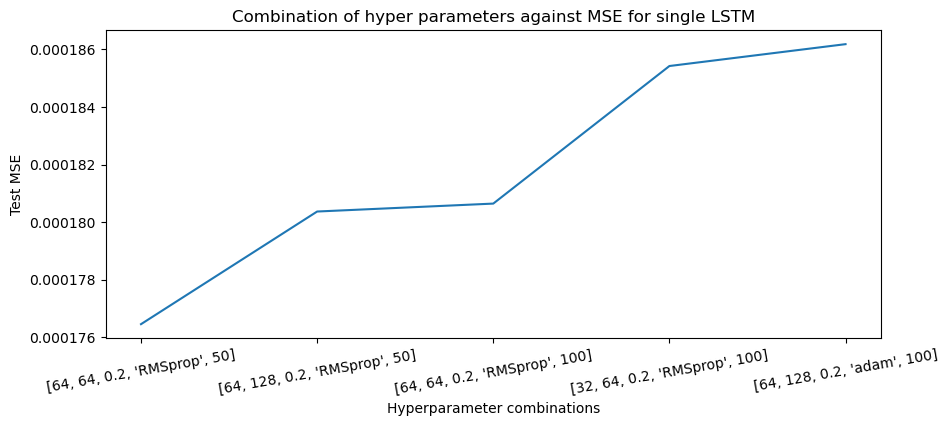

In [89]:
fig = plt.figure(figsize=(10,4))
#giving 5 numbers for easy plotting of hyperparameters
x=[1,2,3,4,5]
#plotting numbers against MSE of first 5 rows
plt.plot(x,mse_single)
#changing xticks to combinations of hyperparameters and rotating 
plt.xticks(x,params,rotation=10)
plt.xlabel("Hyperparameter combinations")
plt.ylabel("Test MSE")
plt.title("Combination of hyper parameters against MSE for single LSTM")
plt.show()

In [433]:
#prininting the best combinations 
print(f'Best Combination: \n Stacked layer = {hist1.iloc[2, 0]}\n Bi directional layer = {hist1.iloc[2, 1]}\n CNN layer = {hist1.iloc[2, 2]}\n single layer = {hist1.iloc[2, 3]}\n n_neurons = {hist1.iloc[2, 4]}\n n_batch_size = {hist1.iloc[2, 5]}\n dropout = {hist1.iloc[2, 6]}\n optimizer ={hist1.iloc[2,7]} \n epochs ={hist1.iloc[2,8]}')
print('**************************')
#results before tuning
print(f'Results Before Tunning:\n Test Set MSE: {numpy.round(results_single, 6)}\n')
#results after tuning
print(f'Results After Tunning:\n Test Set MSE: {numpy.round(hist1.iloc[2, -1], 6)}\n')
#calculating % imrovement after tuning hyperparameters
print(f'{numpy.round((results_single - hist1.iloc[2, -1])*100/numpy.round(results_single, 6))}% Improvement')

Best Combination: 
 Stacked layer = False 
 Bi directional layer = False
 CNN layer = False
 single layer = True
 n_neurons = 64
 n_batch_size = 64
 dropout = 0.2
 optimizer =RMSprop 
 epochs =100
**************************
Results Before Tunning:
 Test Set MSE: 0.000183

Results After Tunning:
 Test Set MSE: 0.000181

1.0% Improvement


In [90]:
#storing best combinations of hyperparameters into configuration
config1=list(hist1.iloc[2, :-2])

In [91]:
#bulding modeling with best combinations to store the model and history
single_lstm_model,single_lstm_history = lstm_model(trainX,trainY,testX,testY,config1)


Epoch 00001: val_loss improved from inf to 0.05085, saving model to weight.h5

Epoch 00002: val_loss improved from 0.05085 to 0.02340, saving model to weight.h5

Epoch 00003: val_loss improved from 0.02340 to 0.00949, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00949 to 0.00608, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00608 to 0.00515, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00515 to 0.00421, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00421 to 0.00317, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00317 to 0.00221, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00221 to 0.00143, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00143 to 0.00083, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00083 to 0.00042, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00042 to 0.00028, saving model to weight.h5

Epoch 0

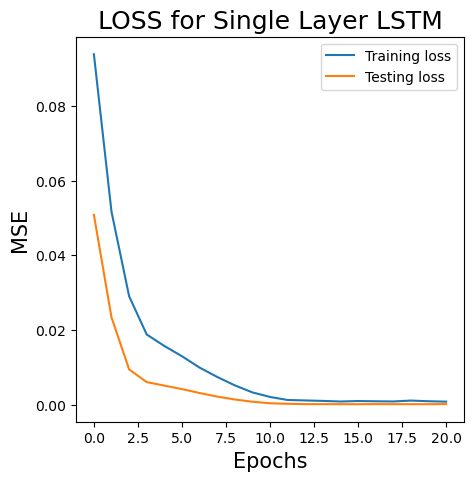

In [440]:
#figure size
fig = plt.figure(figsize=(5,5))
#plotting MSE aginst epochs for training data 
plt.plot(single_lstm_history.epoch, 
                 single_lstm_history.history['loss'], label="Training loss")
#plotting MSE against epochs for validation data i.e., Test data
plt.plot(single_lstm_history.epoch, 
                 single_lstm_history.history['val_loss'], label="Testing loss")

#setting title and labels
plt.title("LOSS for Single Layer LSTM", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
#plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [92]:
#predictions for training data
trainPredictions=predict(single_lstm_model,trainX)
#predictions for testing data
testPredictions= predict(single_lstm_model,testX)

In [93]:
#de-normalizing data
# invert train predictions
trainPredict = inverse_transform(dataset,trainPredictions)
#inverting train data
trainY = inverse_transform(dataset,[trainY])
#inverting test predictions
testPredict = inverse_transform(dataset,testPredictions)
#inverting test data 
testY = inverse_transform(dataset,[testY])

In [94]:

import math
#to calculate RMSE function using predictions and actual data
def rmse(data,preds):
    return math.sqrt(mean_squared_error(data[0], preds[:,0]))

# calculate root mean squared error for train and test predictions and printing them
trainScore = rmse(trainY,trainPredict)
print('Train Score: %.2f RMSE for single LSTM layer' % (trainScore))
testScore = rmse(testY,testPredict)
print('Test Score: %.2f RMSE for single LSTM layer' % (testScore))

Train Score: 2.47 RMSE for single LSTM layer
Test Score: 1.91 RMSE for single LSTM layer


In [95]:
#no.of days future days to be predicted
pred_time=100
#sending dates in dataset, model, test data and no.of days to be predicted for predicting future values
futurePreds = future_preds(dates,dataset,single_lstm_model,testX,pred_time)

In [96]:
time=1
#converting the train predictions and dates as index to data frame
PREDICTION_TRAIN = pd.DataFrame(trainPredict, columns=['Open']).set_index( 
                                    pd.Series(dates[time:len(trainPredict)+time]))
#converting the test predictions and dates as index to data frame
PREDICTION_TEST = pd.DataFrame(testPredict, columns=['Open']).set_index(
                                    pd.Series(dates[len(trainPredict)+(time*2)+1:len(dataset)-1:]))


In [444]:
#converting the test predictions and dates as index to data frame
PREDICTION_TEST = pd.DataFrame(testPredict,
                            columns=['Open']).set_index(pd.Series(dates[len(trainPredict)+(time*2)+1:len(dataset)-1:]))

In [97]:
#for better visualization of predictions we extract OPEN price dates from datset
df=pd.DataFrame(data,columns=['Open'])
df.index=dates
df.index=pd.to_datetime(df.index)

In [98]:
#training forecasting error i.e., 1.96*SE
train_band_size= train_confidence(trainPredict,df)
#testing forecasting error i.e., 1.96*SE
test_band_size = test_confidence(trainPredict, testPredict,df)

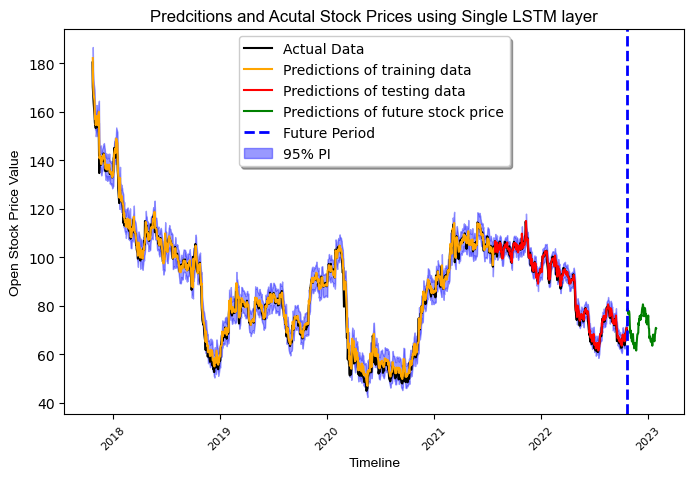

In [99]:
#plt.plot(figsize=(10,10))
fig = plt.figure(figsize=(8,5))
#plotting actual data against date
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
#plotting train predictions 
plt.plot(PREDICTION_TRAIN.index,PREDICTION_TRAIN['Open'],
                     color='orange',label="Predictions of training data")

#plotting test predictions
plt.plot(PREDICTION_TEST.index,PREDICTION_TEST['Open'],
                 color='red',label="Predictions of testing data")

#plotting future predictions
plt.plot(futurePreds.index,futurePreds['Open'],
                 color='green',label="Predictions of future stock price")

#to get vertical line where future predictions start 
plt.axvline(x = min(futurePreds.index), color='blue', 
                    linewidth=2, linestyle='--',label="Future Period")

#plotting 95% PI for train data
plt.fill_between(PREDICTION_TRAIN.index, (PREDICTION_TRAIN['Open']-train_band_size), 
                     (PREDICTION_TRAIN['Open']+train_band_size), color='blue', alpha=.4)
#95% PI for test data
plt.fill_between(PREDICTION_TEST.index, (PREDICTION_TEST['Open']-test_band_size),
                     (PREDICTION_TEST['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#plotting legends
plt.legend(shadow=True)
#title
plt.title('Predcitions and Acutal Stock Prices using Single LSTM layer', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Open Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

### Stacked LSTM Analysis

In [48]:
#trainX and trainY datasets
trainX,trainY = train_data(train)

In [49]:
#testX and testY datasets
testX,testY = test_data(test)

In [50]:
#shaping trainX and testX
trainX,testX = shape_data(trainX,testX)

In [51]:
#initial hyperparmeters for stacked LSTM model, so only 1st value is true
#list[stacked_lstm, bidirectional_lstm, CNN LSTm, Single LSTM, 
            #        neurons, batch size, dropout, optimizer, epochs]
config_main = [True, False, False,False, 64, 32, 0.2,'adam',50] 
# ------------------Stacked LSTM-----------------------
stacked_lstm_model,stacked_lstm_history = lstm_model(trainX,trainY,testX,testY,config_main)


Epoch 00001: val_loss improved from inf to 0.02526, saving model to weight.h5

Epoch 00002: val_loss improved from 0.02526 to 0.00852, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00852 to 0.00434, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00434 to 0.00052, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00052 to 0.00028, saving model to weight.h5

Epoch 00006: val_loss did not improve from 0.00028

Epoch 00007: val_loss improved from 0.00028 to 0.00028, saving model to weight.h5

Epoch 00008: val_loss did not improve from 0.00028

Epoch 00009: val_loss did not improve from 0.00028

Epoch 00010: val_loss did not improve from 0.00028

Epoch 00011: val_loss did not improve from 0.00028

Epoch 00012: val_loss did not improve from 0.00028
Epoch 00012: early stopping


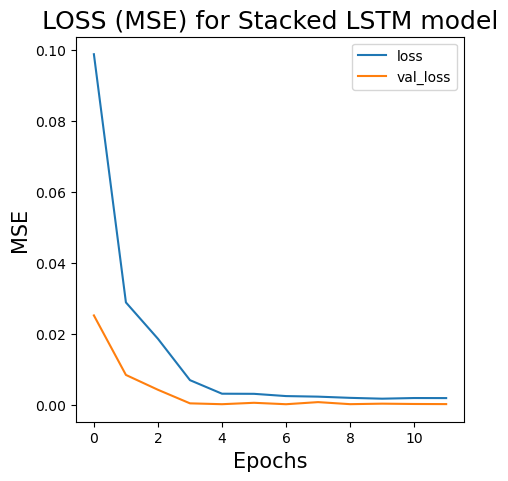

In [52]:
#figure size
fig = plt.figure(figsize=(5,5))
#plotting MSE aginst epochs for training data 
plt.plot(stacked_lstm_history.epoch, 
                 stacked_lstm_history.history['loss'], label="loss")
#plotting MSE against epochs for validation data i.e., Test data
plt.plot(stacked_lstm_history.epoch, 
             stacked_lstm_history.history['val_loss'], label="val_loss")

#setting title and labels
plt.title("LOSS (MSE) for Stacked LSTM model", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
#plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [53]:
#evaluating stacked LSTM model
results_stacked = stacked_lstm_model.evaluate(testX, testY)
print("test loss, test acc:", numpy.round(results_stacked, 6))

10/10 [==============================] - 0s 2ms/step - loss: 3.1055e-04
test loss, test acc: 0.000311


In [54]:
# list of [[stacked],[bi_directional], [cnn],[single_layer] [n_neurons], 
 #             [n_batch_size], [dropout],[optimizers],[epochs]]
config1 = [[True], [False], [False], [False],[16, 32, 64], 
               [32, 64, 128], [0.2],['adam','adamax','SGD','RMSprop'],[20,50,100]]  


#fitting hyperparameter tuning model for stacked LSTM
hist = LSTM_HyperParameter_Tuning(config1, trainX, trainY, testX, testY)  # change x_train shape

[(True, False, False, False, 16, 32, 0.2, 'adam', 20), (True, False, False, False, 16, 32, 0.2, 'adam', 50), (True, False, False, False, 16, 32, 0.2, 'adam', 100), (True, False, False, False, 16, 32, 0.2, 'adamax', 20), (True, False, False, False, 16, 32, 0.2, 'adamax', 50), (True, False, False, False, 16, 32, 0.2, 'adamax', 100), (True, False, False, False, 16, 32, 0.2, 'SGD', 20), (True, False, False, False, 16, 32, 0.2, 'SGD', 50), (True, False, False, False, 16, 32, 0.2, 'SGD', 100), (True, False, False, False, 16, 32, 0.2, 'RMSprop', 20), (True, False, False, False, 16, 32, 0.2, 'RMSprop', 50), (True, False, False, False, 16, 32, 0.2, 'RMSprop', 100), (True, False, False, False, 16, 64, 0.2, 'adam', 20), (True, False, False, False, 16, 64, 0.2, 'adam', 50), (True, False, False, False, 16, 64, 0.2, 'adam', 100), (True, False, False, False, 16, 64, 0.2, 'adamax', 20), (True, False, False, False, 16, 64, 0.2, 'adamax', 50), (True, False, False, False, 16, 64, 0.2, 'adamax', 100), (Tr


Epoch 00003: val_loss improved from 0.02264 to 0.01089, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01089 to 0.00951, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00951 to 0.00797, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00797 to 0.00524, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00524 to 0.00264, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00264 to 0.00201, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00201 to 0.00079, saving model to weight.h5

Epoch 00010: val_loss did not improve from 0.00079

Epoch 00011: val_loss did not improve from 0.00079

Epoch 00012: val_loss did not improve from 0.00079

Epoch 00013: val_loss did not improve from 0.00079

Epoch 00014: val_loss did not improve from 0.00079
Epoch 00014: early stopping
1-th combination = (True, False, False, False, 16, 32, 0.2, 'adam', 50) 
 train accuracy: 0.0014106491580605507 and test accuracy: 


Epoch 00029: val_loss improved from 0.00114 to 0.00113, saving model to weight.h5

Epoch 00030: val_loss did not improve from 0.00113

Epoch 00031: val_loss did not improve from 0.00113

Epoch 00032: val_loss did not improve from 0.00113

Epoch 00033: val_loss improved from 0.00113 to 0.00108, saving model to weight.h5

Epoch 00034: val_loss did not improve from 0.00108

Epoch 00035: val_loss did not improve from 0.00108

Epoch 00036: val_loss did not improve from 0.00108

Epoch 00036: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00037: val_loss did not improve from 0.00108

Epoch 00038: val_loss did not improve from 0.00108
Epoch 00038: early stopping
4-th combination = (True, False, False, False, 16, 32, 0.2, 'adamax', 50) 
 train accuracy: 0.0019379286095499992 and test accuracy: 0.0012236355105414987
--------------------------------------------------------------------
--------------------------------------------------------------------
----------------


Epoch 00007: val_loss improved from 0.01217 to 0.01210, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01210 to 0.01208, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01208 to 0.01207, saving model to weight.h5

Epoch 00010: val_loss did not improve from 0.01207

Epoch 00011: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.01207

Epoch 00013: val_loss did not improve from 0.01207

Epoch 00014: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00015: val_loss did not improve from 0.01207

Epoch 00016: val_loss did not improve from 0.01207

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 00017: val_loss did not improve from 0.01207

Epoch 00018: val_loss did not improve from 0.01207

Epoch 00019: val_loss did not improve from 0.01207
Epoch 00019: early stopping
8-th combination = (True, False, False, False, 16, 32, 0.2, '


Epoch 00001: val_loss improved from inf to 0.09264, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09264 to 0.06736, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06736 to 0.04222, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04222 to 0.02038, saving model to weight.h5

Epoch 00005: val_loss improved from 0.02038 to 0.01079, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01079 to 0.01064, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01064 to 0.00982, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00982 to 0.00899, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00899 to 0.00793, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00793 to 0.00657, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00657 to 0.00495, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00495 to 0.00357, saving model to weight.h5

Epoch 0


Epoch 00054: val_loss did not improve from 0.00017

Epoch 00055: val_loss improved from 0.00017 to 0.00017, saving model to weight.h5

Epoch 00056: val_loss did not improve from 0.00017

Epoch 00057: val_loss did not improve from 0.00017

Epoch 00058: val_loss improved from 0.00017 to 0.00016, saving model to weight.h5

Epoch 00059: val_loss did not improve from 0.00016

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00060: val_loss did not improve from 0.00016

Epoch 00061: val_loss did not improve from 0.00016

Epoch 00062: val_loss did not improve from 0.00016

Epoch 00063: val_loss did not improve from 0.00016
Epoch 00063: early stopping
14-th combination = (True, False, False, False, 16, 64, 0.2, 'adam', 100) 
 train accuracy: 0.0004394397255964577 and test accuracy: 0.00023401786165777594
--------------------------------------------------------------------
--------------------------------------------------------------------
---------------


Epoch 00007: val_loss improved from 0.02413 to 0.01595, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01595 to 0.01181, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01181 to 0.01067, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01067 to 0.01051, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01051 to 0.01033, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01033 to 0.01015, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01015 to 0.00992, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00992 to 0.00966, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00966 to 0.00941, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00941 to 0.00910, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00910 to 0.00876, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00876 to 0.00838, saving model to weight.h5

Epo


Epoch 00003: val_loss improved from 0.03975 to 0.02633, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02633 to 0.01949, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01949 to 0.01595, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01595 to 0.01413, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01413 to 0.01316, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01316 to 0.01264, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01264 to 0.01238, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01238 to 0.01224, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01224 to 0.01218, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01218 to 0.01213, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01213 to 0.01211, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01211 to 0.01210, saving model to weight.h5

Epo


Epoch 00001: val_loss improved from inf to 0.07995, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07995 to 0.05142, saving model to weight.h5

Epoch 00003: val_loss improved from 0.05142 to 0.02734, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02734 to 0.01309, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01309 to 0.01010, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01010 to 0.00951, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00951 to 0.00860, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00860 to 0.00753, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00753 to 0.00642, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00642 to 0.00500, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00500 to 0.00363, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00363 to 0.00301, saving model to weight.h5

Epoch 0


Epoch 00001: val_loss improved from inf to 0.10559, saving model to weight.h5

Epoch 00002: val_loss improved from 0.10559 to 0.09345, saving model to weight.h5

Epoch 00003: val_loss improved from 0.09345 to 0.08098, saving model to weight.h5

Epoch 00004: val_loss improved from 0.08098 to 0.06823, saving model to weight.h5

Epoch 00005: val_loss improved from 0.06823 to 0.05517, saving model to weight.h5

Epoch 00006: val_loss improved from 0.05517 to 0.04179, saving model to weight.h5

Epoch 00007: val_loss improved from 0.04179 to 0.02913, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02913 to 0.01824, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01824 to 0.01160, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01160 to 0.01060, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.01060

Epoch 00012: val_loss improved from 0.01060 to 0.01004, saving model to weight.h5

Epoch 00013: val_loss improved from 0.


Epoch 00037: val_loss improved from 0.00883 to 0.00860, saving model to weight.h5

Epoch 00038: val_loss improved from 0.00860 to 0.00835, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00835 to 0.00808, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00808 to 0.00780, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00780 to 0.00752, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00752 to 0.00721, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00721 to 0.00688, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00688 to 0.00653, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00653 to 0.00618, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00618 to 0.00583, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00583 to 0.00547, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00547 to 0.00509, saving model to weight.h5

Epo


Epoch 00013: val_loss improved from 0.01336 to 0.01295, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01295 to 0.01269, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01269 to 0.01254, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01254 to 0.01240, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01240 to 0.01231, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01231 to 0.01225, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01225 to 0.01220, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01220 to 0.01216, saving model to weight.h5
30-th combination = (True, False, False, False, 16, 128, 0.2, 'SGD', 20) 
 train accuracy: 0.033234644681215286 and test accuracy: 0.012156190350651741
--------------------------------------------------------------------
--------------------------------------------------------------------
----------------------------------------------


Epoch 00001: val_loss improved from inf to 0.09581, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09581 to 0.07981, saving model to weight.h5

Epoch 00003: val_loss improved from 0.07981 to 0.06522, saving model to weight.h5

Epoch 00004: val_loss improved from 0.06522 to 0.05111, saving model to weight.h5

Epoch 00005: val_loss improved from 0.05111 to 0.03796, saving model to weight.h5

Epoch 00006: val_loss improved from 0.03796 to 0.02637, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02637 to 0.01783, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01783 to 0.01261, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01261 to 0.01081, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01081 to 0.01032, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01032 to 0.01003, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01003 to 0.00970, saving model to weight.h5

Epoch 0


Epoch 00028: val_loss improved from 0.00170 to 0.00145, saving model to weight.h5

Epoch 00029: val_loss did not improve from 0.00145

Epoch 00030: val_loss did not improve from 0.00145

Epoch 00031: val_loss improved from 0.00145 to 0.00111, saving model to weight.h5

Epoch 00032: val_loss did not improve from 0.00111

Epoch 00033: val_loss did not improve from 0.00111

Epoch 00034: val_loss did not improve from 0.00111

Epoch 00035: val_loss did not improve from 0.00111

Epoch 00036: val_loss did not improve from 0.00111
Epoch 00036: early stopping
35-th combination = (True, False, False, False, 16, 128, 0.2, 'RMSprop', 100) 
 train accuracy: 0.0047094919718801975 and test accuracy: 0.0035786693915724754
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
37th co


Epoch 00014: val_loss improved from 0.00132 to 0.00127, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00127 to 0.00124, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00124 to 0.00096, saving model to weight.h5

Epoch 00017: val_loss did not improve from 0.00096

Epoch 00018: val_loss improved from 0.00096 to 0.00082, saving model to weight.h5

Epoch 00019: val_loss did not improve from 0.00082

Epoch 00020: val_loss improved from 0.00082 to 0.00066, saving model to weight.h5
39-th combination = (True, False, False, False, 32, 32, 0.2, 'adamax', 20) 
 train accuracy: 0.0015382625861093402 and test accuracy: 0.0006648627459071577
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
41th combination: 

-----------------------------


Epoch 00005: val_loss improved from 0.01269 to 0.01229, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01229 to 0.01214, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01214 to 0.01210, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01210 to 0.01208, saving model to weight.h5

Epoch 00009: val_loss did not improve from 0.01208

Epoch 00010: val_loss improved from 0.01208 to 0.01208, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.01208

Epoch 00012: val_loss improved from 0.01208 to 0.01207, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.01207

Epoch 00015: val_loss did not improve from 0.01207

Epoch 00016: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 00017: val_loss improved from 0.01207 to 


Epoch 00013: val_loss improved from 0.00053 to 0.00042, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00042

Epoch 00015: val_loss improved from 0.00042 to 0.00025, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00025

Epoch 00017: val_loss did not improve from 0.00025

Epoch 00018: val_loss improved from 0.00025 to 0.00022, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00022 to 0.00021, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00021 to 0.00017, saving model to weight.h5

Epoch 00021: val_loss did not improve from 0.00017

Epoch 00022: val_loss did not improve from 0.00017

Epoch 00023: val_loss did not improve from 0.00017

Epoch 00024: val_loss did not improve from 0.00017

Epoch 00025: val_loss did not improve from 0.00017

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 00025: early stopping
47-th combination = (True, False, False, False, 32, 32, 0.2,


Epoch 00025: val_loss did not improve from 0.00022

Epoch 00026: val_loss did not improve from 0.00022

Epoch 00027: val_loss improved from 0.00022 to 0.00019, saving model to weight.h5

Epoch 00028: val_loss did not improve from 0.00019

Epoch 00029: val_loss did not improve from 0.00019

Epoch 00030: val_loss did not improve from 0.00019

Epoch 00031: val_loss did not improve from 0.00019

Epoch 00032: val_loss did not improve from 0.00019
Epoch 00032: early stopping
50-th combination = (True, False, False, False, 32, 64, 0.2, 'adam', 100) 
 train accuracy: 0.00035468576243147254 and test accuracy: 0.00021953086252324283
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
52th combination: 

--------------------------------------------------------------------

Ep


Epoch 00027: val_loss did not improve from 0.00085

Epoch 00028: val_loss did not improve from 0.00085

Epoch 00029: val_loss did not improve from 0.00085

Epoch 00030: val_loss did not improve from 0.00085

Epoch 00031: val_loss did not improve from 0.00085
Epoch 00031: early stopping
53-th combination = (True, False, False, False, 32, 64, 0.2, 'adamax', 100) 
 train accuracy: 0.0016834144480526447 and test accuracy: 0.0009724372066557407
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
55th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.06675, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06675 to 0.04062, saving model to weight.h5

Epoch 00003: val_loss impro


Epoch 00001: val_loss improved from inf to 0.06355, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06355 to 0.02054, saving model to weight.h5

Epoch 00003: val_loss improved from 0.02054 to 0.00949, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00949 to 0.00837, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00837 to 0.00674, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00674 to 0.00581, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00581 to 0.00296, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00296 to 0.00189, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00189 to 0.00106, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00106 to 0.00081, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.00081

Epoch 00012: val_loss did not improve from 0.00081

Epoch 00013: val_loss did not improve from 0.00081

Epoch 00014: val_


Epoch 00001: val_loss improved from inf to 0.10129, saving model to weight.h5

Epoch 00002: val_loss improved from 0.10129 to 0.08392, saving model to weight.h5

Epoch 00003: val_loss improved from 0.08392 to 0.06499, saving model to weight.h5

Epoch 00004: val_loss improved from 0.06499 to 0.04465, saving model to weight.h5

Epoch 00005: val_loss improved from 0.04465 to 0.02467, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02467 to 0.01137, saving model to weight.h5

Epoch 00007: val_loss did not improve from 0.01137

Epoch 00008: val_loss improved from 0.01137 to 0.01043, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01043 to 0.00923, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00923 to 0.00870, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00870 to 0.00793, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00793 to 0.00717, saving model to weight.h5

Epoch 00013: val_loss improved from 0.


Epoch 00007: val_loss improved from 0.03409 to 0.02379, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02379 to 0.01608, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01608 to 0.01189, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01189 to 0.01068, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.01068

Epoch 00012: val_loss improved from 0.01068 to 0.01056, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01056 to 0.01026, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01026 to 0.01002, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01002 to 0.00979, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00979 to 0.00955, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00955 to 0.00928, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00928 to 0.00902, saving model to weight.h5

Epoch 00019: val_loss improved fro


Epoch 00028: val_loss improved from 0.00538 to 0.00475, saving model to weight.h5

Epoch 00029: val_loss improved from 0.00475 to 0.00413, saving model to weight.h5

Epoch 00030: val_loss improved from 0.00413 to 0.00350, saving model to weight.h5

Epoch 00031: val_loss improved from 0.00350 to 0.00293, saving model to weight.h5

Epoch 00032: val_loss improved from 0.00293 to 0.00240, saving model to weight.h5

Epoch 00033: val_loss improved from 0.00240 to 0.00198, saving model to weight.h5

Epoch 00034: val_loss improved from 0.00198 to 0.00165, saving model to weight.h5

Epoch 00035: val_loss improved from 0.00165 to 0.00159, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00159 to 0.00135, saving model to weight.h5

Epoch 00037: val_loss improved from 0.00135 to 0.00134, saving model to weight.h5

Epoch 00038: val_loss did not improve from 0.00134

Epoch 00039: val_loss did not improve from 0.00134

Epoch 00040: val_loss improved from 0.00134 to 0.00123, saving mo


Epoch 00001: val_loss improved from inf to 0.08449, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08449 to 0.06236, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06236 to 0.04664, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04664 to 0.03603, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03603 to 0.02857, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02857 to 0.02347, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02347 to 0.01997, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01997 to 0.01763, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01763 to 0.01602, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01602 to 0.01483, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01483 to 0.01400, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01400 to 0.01344, saving model to weight.h5

Epoch 0


Epoch 00008: val_loss improved from 0.00817 to 0.00725, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00725 to 0.00605, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00605 to 0.00592, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00592 to 0.00448, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00448 to 0.00290, saving model to weight.h5

Epoch 00013: val_loss did not improve from 0.00290

Epoch 00014: val_loss improved from 0.00290 to 0.00265, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00265 to 0.00105, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00105

Epoch 00017: val_loss did not improve from 0.00105

Epoch 00018: val_loss improved from 0.00105 to 0.00095, saving model to weight.h5

Epoch 00019: val_loss did not improve from 0.00095

Epoch 00020: val_loss did not improve from 0.00095

Epoch 00021: val_loss improved from 0.00095 to 0.00063, saving model to wei


Epoch 00015: val_loss improved from 0.00035 to 0.00033, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00033

Epoch 00017: val_loss improved from 0.00033 to 0.00032, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00032 to 0.00031, saving model to weight.h5

Epoch 00019: val_loss did not improve from 0.00031

Epoch 00020: val_loss did not improve from 0.00031
75-th combination = (True, False, False, False, 64, 32, 0.2, 'adamax', 20) 
 train accuracy: 0.0008297164458781481 and test accuracy: 0.0004510155995376408
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
77th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.04474, saving model to weigh


Epoch 00005: val_loss improved from 0.01265 to 0.01226, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01226 to 0.01215, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01215 to 0.01209, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01209 to 0.01208, saving model to weight.h5

Epoch 00009: val_loss did not improve from 0.01208

Epoch 00010: val_loss improved from 0.01208 to 0.01208, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01208 to 0.01208, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01208 to 0.01207, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.01207

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.004999


Epoch 00015: val_loss improved from 0.00024 to 0.00019, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00019

Epoch 00017: val_loss did not improve from 0.00019

Epoch 00018: val_loss did not improve from 0.00019

Epoch 00019: val_loss improved from 0.00019 to 0.00017, saving model to weight.h5

Epoch 00020: val_loss did not improve from 0.00017
84-th combination = (True, False, False, False, 64, 64, 0.2, 'adam', 20) 
 train accuracy: 0.00042264361400157213 and test accuracy: 0.00027165585197508335
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
86th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.07469, saving model to weight.h5

Epoch 00002: val_loss imp


Epoch 00011: val_loss improved from 0.00444 to 0.00301, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00301 to 0.00180, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00180 to 0.00097, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00097

Epoch 00015: val_loss did not improve from 0.00097

Epoch 00016: val_loss improved from 0.00097 to 0.00076, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00076 to 0.00068, saving model to weight.h5

Epoch 00018: val_loss did not improve from 0.00068

Epoch 00019: val_loss improved from 0.00068 to 0.00050, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00050 to 0.00049, saving model to weight.h5

Epoch 00021: val_loss did not improve from 0.00049

Epoch 00022: val_loss did not improve from 0.00049

Epoch 00023: val_loss improved from 0.00049 to 0.00038, saving model to weight.h5

Epoch 00024: val_loss did not improve from 0.00038

Epoch 00025: val_loss i


Epoch 00021: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00022: val_loss did not improve from 0.01207

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 00023: val_loss did not improve from 0.01207

Epoch 00024: val_loss did not improve from 0.01207

Epoch 00025: val_loss did not improve from 0.01207

Epoch 00026: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00027: val_loss did not improve from 0.01207

Epoch 00028: val_loss did not improve from 0.01207

Epoch 00029: val_loss did not improve from 0.01207

Epoch 00030: val_loss did not improve from 0.01207

Epoch 00031: val_loss did not improve from 0.01207
Epoch 00031: early stopping
91-th combination = (True, False, False, False, 64, 64, 0.2, 'SGD', 50) 
 train accuracy: 0.03315671160817146 and test accuracy: 0.012067717500030994
--------------------------------------------------------------------
---------------------------------------


Epoch 00001: val_loss improved from inf to 0.02406, saving model to weight.h5

Epoch 00002: val_loss improved from 0.02406 to 0.00796, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00796 to 0.00627, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00627 to 0.00250, saving model to weight.h5

Epoch 00005: val_loss did not improve from 0.00250

Epoch 00006: val_loss improved from 0.00250 to 0.00203, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00203 to 0.00044, saving model to weight.h5

Epoch 00008: val_loss did not improve from 0.00044

Epoch 00009: val_loss improved from 0.00044 to 0.00041, saving model to weight.h5

Epoch 00010: val_loss did not improve from 0.00041

Epoch 00011: val_loss improved from 0.00041 to 0.00029, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.00029

Epoch 00013: val_loss did not improve from 0.00029

Epoch 00014: val_loss improved from 0.00029 to 0.00025, saving model to weight.


Epoch 00011: val_loss improved from 0.00484 to 0.00308, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00308 to 0.00150, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00150 to 0.00083, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00083

Epoch 00015: val_loss did not improve from 0.00083

Epoch 00016: val_loss improved from 0.00083 to 0.00040, saving model to weight.h5

Epoch 00017: val_loss did not improve from 0.00040

Epoch 00018: val_loss did not improve from 0.00040

Epoch 00019: val_loss improved from 0.00040 to 0.00038, saving model to weight.h5

Epoch 00020: val_loss did not improve from 0.00038

Epoch 00021: val_loss improved from 0.00038 to 0.00029, saving model to weight.h5

Epoch 00022: val_loss did not improve from 0.00029

Epoch 00023: val_loss improved from 0.00029 to 0.00029, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00029 to 0.00023, saving model to weight.h5

Epoch 00025: val_loss d


Epoch 00005: val_loss improved from 0.03593 to 0.01900, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01900 to 0.01029, saving model to weight.h5

Epoch 00007: val_loss did not improve from 0.01029

Epoch 00008: val_loss did not improve from 0.01029

Epoch 00009: val_loss improved from 0.01029 to 0.00918, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00918 to 0.00875, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00875 to 0.00816, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00816 to 0.00777, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00777 to 0.00717, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00717 to 0.00625, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00625 to 0.00530, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00530 to 0.00443, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00443 to 0.00345, saving mo


Epoch 00033: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00034: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00035: val_loss did not improve from 0.01207

Epoch 00036: val_loss did not improve from 0.01207

Epoch 00037: val_loss did not improve from 0.01207

Epoch 00038: val_loss did not improve from 0.01207

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 00039: val_loss did not improve from 0.01207
Epoch 00039: early stopping
103-th combination = (True, False, False, False, 64, 128, 0.2, 'SGD', 50) 
 train accuracy: 0.033160824328660965 and test accuracy: 0.012073788791894913
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
105th combination: 

----------------


Epoch 00007: val_loss improved from 0.00402 to 0.00265, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00265 to 0.00264, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00264 to 0.00086, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00086 to 0.00058, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.00058

Epoch 00012: val_loss did not improve from 0.00058

Epoch 00013: val_loss did not improve from 0.00058

Epoch 00014: val_loss improved from 0.00058 to 0.00050, saving model to weight.h5

Epoch 00015: val_loss did not improve from 0.00050

Epoch 00016: val_loss did not improve from 0.00050

Epoch 00017: val_loss did not improve from 0.00050

Epoch 00018: val_loss improved from 0.00050 to 0.00039, saving model to weight.h5

Epoch 00019: val_loss did not improve from 0.00039

Epoch 00020: val_loss did not improve from 0.00039

Epoch 00021: val_loss did not improve from 0.00039

Epoch 00022: val_loss improved fr

In [55]:
#list of hyperparameter combinations with results to data frame
hist2 = pd.DataFrame(hist)
#arranging in ascending order
hist2 = hist2.sort_values(by=[10], ascending=True)
hist2

0      1      2      3   4    5    6        7    8         9         10
94   True  False  False  False  64   64  0.2  RMSprop   50  0.000287  0.000163
97   True  False  False  False  64  128  0.2     adam   50  0.000298  0.000166
98   True  False  False  False  64  128  0.2     adam  100  0.000300  0.000168
73   True  False  False  False  64   32  0.2     adam   50  0.000319  0.000170
74   True  False  False  False  64   32  0.2     adam  100  0.000298  0.000171
..    ...    ...    ...    ...  ..  ...  ...      ...  ...       ...       ...
56   True  False  False  False  32   64  0.2      SGD  100  0.033200  0.012087
6    True  False  False  False  16   32  0.2      SGD   20  0.033184  0.012087
30   True  False  False  False  16  128  0.2      SGD   20  0.033235  0.012156
102  True  False  False  False  64  128  0.2      SGD   20  0.033229  0.012170
66   True  False  False  False  32  128  0.2      SGD   20  0.033232  0.012191

[108 rows x 11 columns]

In [56]:
# getting neurons, batch size, drop out , optimizer and epochs for first five rows of hyperparameter combinations
params_stacked= [[hist2.iloc[0,4],hist2.iloc[0,5],hist2.iloc[0,6],hist2.iloc[0,7],hist2.iloc[0,8]],
         [hist2.iloc[1,4],hist2.iloc[1,5],hist2.iloc[1,6],hist2.iloc[1,7],hist2.iloc[1,8]],
         [hist2.iloc[2,4],hist2.iloc[2,5],hist2.iloc[2,6],hist2.iloc[2,7],hist2.iloc[2,8]],
         [hist2.iloc[3,4],hist2.iloc[3,5],hist2.iloc[3,6],hist2.iloc[3,7],hist2.iloc[3,8]],
         [hist2.iloc[4,4],hist2.iloc[4,5],hist2.iloc[4,6],hist2.iloc[4,7],hist2.iloc[4,8]]]

#MSE on test set for first 5 rows of best hyperparametrs combinations 
mse_stacked=[hist2.iloc[0,10],hist2.iloc[1,10],hist2.iloc[2,10],hist2.iloc[3,10],hist2.iloc[4,10]]

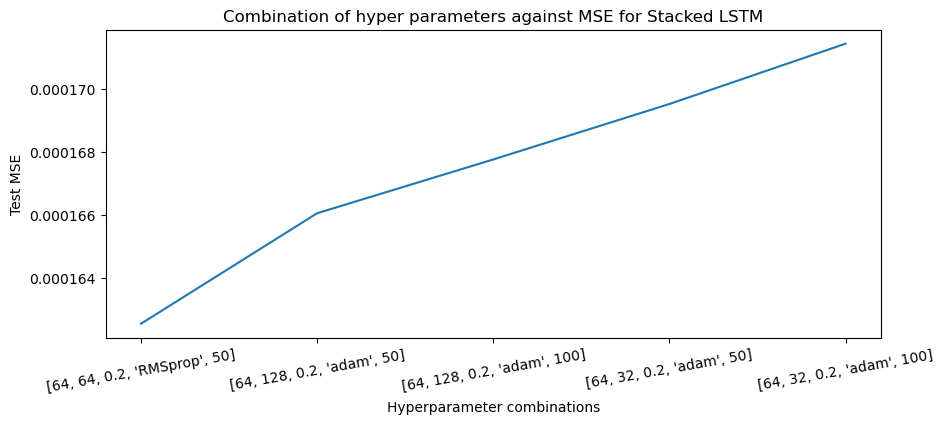

In [100]:
fig = plt.figure(figsize=(10,4))
#giving 5 numbers for easy plotting of hyperparameters
x=[1,2,3,4,5]
#plotting numbers against MSE of first 5 rows
plt.plot(x,mse_stacked)
#changing xticks to combinations of hyperparameters and rotating 
plt.xticks(x,params_stacked,rotation=10)
plt.xlabel("Hyperparameter combinations")
plt.ylabel("Test MSE")
plt.title("Combination of hyper parameters against MSE for Stacked LSTM")
plt.show()

In [61]:
#best combinations for stacked LSTM 
print(f'Best Combination: \n stacked_layer = {hist2.iloc[1, 0]}\n Bi directional_layer = {hist2.iloc[1, 1]}\n CNN_layer = {hist2.iloc[1, 2]}\n single_layer = {hist2.iloc[1, 3]}\n n_neurons = {hist2.iloc[1, 4]}\n n_batch_size = {hist2.iloc[1, 5]}\n dropout = {hist2.iloc[1, 6]}  \n optimizer ={hist2.iloc[1,7]} \n epochs ={hist2.iloc[1,8]}')
print('**************************')
#results befor tuning hyperparameters
print(f'Results Before Tunning:\n Test Set RMSE: {numpy.round(results_stacked, 6)}\n')
#results after tuning
print(f'Results After Tunning:\n Test Set RMSE: {numpy.round(hist2.iloc[1, -1], 6)}\n')
#improvement percentage
print(f'{numpy.round((results_stacked - hist2.iloc[1, -1])*100/numpy.round(results_stacked, 6))}% Improvement')

Best Combination: 
 stacked_layer = True
 Bi directional_layer = False
 CNN_layer = False
 single_layer = False
 n_neurons = 64
 n_batch_size = 128
 dropout = 0.2  
 optimizer =adam 
 epochs =50
**************************
Results Before Tunning:
 Test Set RMSE: 0.000311

Results After Tunning:
 Test Set RMSE: 0.000166

46.0% Improvement


In [62]:
#storing best hyperparameter combination
config2=list(hist2.iloc[1, :-2])

In [63]:
#building model with best combination
stacked_lstm_model,stacked_lstm_history = lstm_model(trainX,trainY,testX,testY,config2)


Epoch 00001: val_loss improved from inf to 0.09385, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09385 to 0.06556, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06556 to 0.03266, saving model to weight.h5

Epoch 00004: val_loss improved from 0.03266 to 0.00982, saving model to weight.h5

Epoch 00005: val_loss did not improve from 0.00982

Epoch 00006: val_loss improved from 0.00982 to 0.00881, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00881 to 0.00826, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00826 to 0.00699, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00699 to 0.00632, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00632 to 0.00398, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00398 to 0.00240, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00240 to 0.00115, saving model to weight.h5

Epoch 00013: val_loss improved from 0.

In [101]:
#model summary
stacked_lstm_model.summary()

Model: "sequential_220"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_547 (LSTM)             (None, 1, 64)             16896     
                                                                 
 dropout_547 (Dropout)       (None, 1, 64)             0         
                                                                 
 lstm_548 (LSTM)             (None, 1, 64)             33024     
                                                                 
 dropout_548 (Dropout)       (None, 1, 64)             0         
                                                                 
 lstm_549 (LSTM)             (None, 1, 64)             33024     
                                                                 
 dropout_549 (Dropout)       (None, 1, 64)             0         
                                                                 
 lstm_550 (LSTM)             (None, 64)             

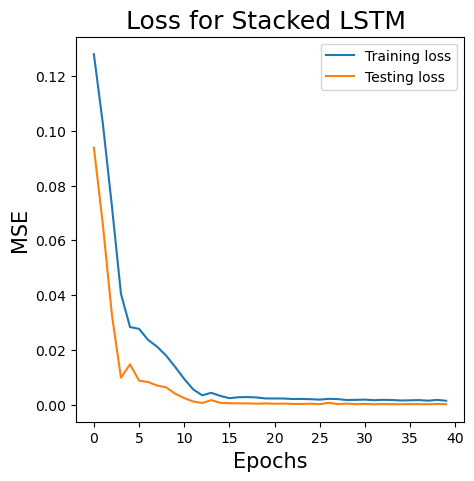

In [439]:
#plot for loss function for stacked lSTM
fig = plt.figure(figsize=(5,5))

#Training Loss
plt.plot(stacked_lstm_history.epoch, stacked_lstm_history.history['loss'], label="Training loss")
#validation loss
plt.plot(stacked_lstm_history.epoch, stacked_lstm_history.history['val_loss'], label="Testing loss")

#title for plot
plt.title("Loss for Stacked LSTM ", fontsize=18)

#labels and grid of plot
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
#plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [65]:
#predicting for train data using stacked lstm
trainPredictions_stacked=predict(stacked_lstm_model,trainX)
#predicting for test data using stacked lstm
testPredictions_stacked= predict(stacked_lstm_model,testX)

In [66]:
# invert train predictions(de-normalizing data)
trainPredict_stacked = inverse_transform(dataset,trainPredictions_stacked)
#denormanizing train data
trainY = inverse_transform(dataset,[trainY])
#denormalizing test data predictions
testPredict_stacked = inverse_transform(dataset,testPredictions_stacked)
#denormanizing test data
testY = inverse_transform(dataset,[testY])

In [67]:
# calculate root mean squared error for both Train and Test sets using Stacked LSTM
trainScore_stacked = rmse(trainY,trainPredict_stacked)
print('Train Score : %.2f RMSE for Stacked LSTM' % (trainScore_stacked))
testScore_stacked = rmse(testY,testPredict_stacked)
print('Test Score: %.2f RMSE for Stacked LSTM' % (testScore_stacked))

Train Score : 2.41 RMSE for Stacked LSTM
Test Score: 1.87 RMSE for Stacked LSTM


In [70]:
import datetime as dt
# number of future days predictions
time_pred=100
#predicting future stock price for 100 days using stacked lstm model
futurePreds_stacked = future_preds(dates,dataset,stacked_lstm_model,testX,time_pred)

In [71]:
time=1
#converting the train predictions and dates as index to data frame for Stacked LSTM
PREDICTION_TRAIN_STACKED = pd.DataFrame(trainPredict_stacked, columns=['Open']).set_index(
                                        pd.Series(dates[time:len(trainPredict_stacked)+time]))
#converting the test predictions and dates as index to data frame for stacked LSTM
PREDICTION_TEST_STACKED = pd.DataFrame(testPredict_stacked, columns=['Open']).set_index(
                                        pd.Series(dates[len(trainPredict_stacked)+(time*2)+1:len(dataset)-1:]))


In [72]:
#training forecasting error i.e., 1.96*SE using stacked LSTM
train_band_size= train_confidence(trainPredict_stacked,df)
#testing forecasting error i.e., 1.96*SE using stacked LSTM
test_band_size = test_confidence(trainPredict_stacked, testPredict_stacked,df)

In [73]:
#plt.plot(figsize=(10,10))
fig = plt.figure(figsize=(8,5))
#plotting actual data against date
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
#plotting train predictions 
plt.plot(PREDICTION_TRAIN_STACKED.index,PREDICTION_TRAIN_STACKED['Open'],
                             color='orange',label="Predictions of training data")

#plotting test predictions
plt.plot(PREDICTION_TEST_STACKED.index,PREDICTION_TEST_STACKED['Open'],
                                 color='red',label="Predictions of testing data")

#plotting future predictions
plt.plot(futurePreds_stacked.index,futurePreds_stacked['Open'],
                         color='green',label="Predictions of future stock price")

#to get vertical line where future predictions start 
plt.axvline(x = min(futurePreds_stacked.index), color='blue', 
                            linewidth=2, linestyle='--',label="Future Period")
#plotting 95% PI for train data
plt.fill_between(PREDICTION_TRAIN_STACKED.index, (PREDICTION_TRAIN_STACKED['Open']-train_band_size),
                             (PREDICTION_TRAIN_STACKED['Open']+train_band_size), color='blue', alpha=.4)
#95% PI for test data
plt.fill_between(PREDICTION_TEST_STACKED.index, (PREDICTION_TEST_STACKED['Open']-test_band_size),
                         (PREDICTION_TEST_STACKED['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#plotting legends
plt.legend(shadow=True)
#title and labels
plt.title('Predcitions and Acutal Stock Prices using Stacked LSTM layer', 
                          family='Arial', fontsize=12)

plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Open Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

### Bidirectional LSTM Analysis

In [110]:
#getting trainX and trainY datasets in normalized scale 
trainX,trainY = train_data(train)
#getting testX and testY datasets in normalized scale
testX,testY = test_data(test)
#reshaping trainX and testX for model
trainX,testX = shape_data(trainX,testX)

In [ ]:
trainX.shape

In [75]:
#initial hyperparameters for bidirectional LSTM
#list[stacked_lstm, bidirectional_lstm, CNN LSTm, Single LSTM, neurons, batch size, dropout, optimizer, epochs]
config_main = [False, True, False,False, 64, 32, 0.2,'adam',50] 
# ------------------bidirectional LSTM-----------------------

bidirectional_lstm_model,bidirectional_lstm_history = lstm_model(trainX,trainY,testX,testY,config_main)


Epoch 00001: val_loss improved from inf to 0.06466, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06466 to 0.02517, saving model to weight.h5

Epoch 00003: val_loss improved from 0.02517 to 0.00756, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00756 to 0.00537, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00537 to 0.00482, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00482 to 0.00423, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00423 to 0.00362, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00362 to 0.00295, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00295 to 0.00231, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00231 to 0.00178, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00178 to 0.00127, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00127 to 0.00091, saving model to weight.h5

Epoch 0

In [76]:

fig = plt.figure(figsize=(5,5))

#figure of LOSS for Bidirectional LSTM using initial hyperparameters
#training data loss
plt.plot(bidirectional_lstm_history.epoch, 
                 bidirectional_lstm_history.history['loss'], label="loss")
#validation data loss
plt.plot(bidirectional_lstm_history.epoch, 
                bidirectional_lstm_history.history['val_loss'], label="val_loss")
#title and labels
plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [78]:
#results of bidirectional LSTM for initial hyperparameters
bidirection_results = bidirectional_lstm_model.evaluate(testX, testY)
#print the results by rounding it to 6 digits
print("test loss, test acc:", numpy.round(bidirection_results, 6))

10/10 [==============================] - 0s 2ms/step - loss: 2.0391e-04
test loss, test acc: 0.000204


In [79]:
#hyperparameter tuning for bidirectional LSTM
#list[stacked_lstm, bidirectional_lstm, CNN LSTm, Single LSTM, neurons, 
        #       batch size, dropout, optimizer, epochs]
config = [[False], [True], [False],[False], [16, 32, 64], 
                  [32, 64, 128], [0.2],['adam','adamax','SGD','RMSprop'],[20,50,100]]  

#building model for each combination and storing results in list
hist = LSTM_HyperParameter_Tuning(config, trainX, trainY, testX, testY) 

[(False, True, False, False, 16, 32, 0.2, 'adam', 20), (False, True, False, False, 16, 32, 0.2, 'adam', 50), (False, True, False, False, 16, 32, 0.2, 'adam', 100), (False, True, False, False, 16, 32, 0.2, 'adamax', 20), (False, True, False, False, 16, 32, 0.2, 'adamax', 50), (False, True, False, False, 16, 32, 0.2, 'adamax', 100), (False, True, False, False, 16, 32, 0.2, 'SGD', 20), (False, True, False, False, 16, 32, 0.2, 'SGD', 50), (False, True, False, False, 16, 32, 0.2, 'SGD', 100), (False, True, False, False, 16, 32, 0.2, 'RMSprop', 20), (False, True, False, False, 16, 32, 0.2, 'RMSprop', 50), (False, True, False, False, 16, 32, 0.2, 'RMSprop', 100), (False, True, False, False, 16, 64, 0.2, 'adam', 20), (False, True, False, False, 16, 64, 0.2, 'adam', 50), (False, True, False, False, 16, 64, 0.2, 'adam', 100), (False, True, False, False, 16, 64, 0.2, 'adamax', 20), (False, True, False, False, 16, 64, 0.2, 'adamax', 50), (False, True, False, False, 16, 64, 0.2, 'adamax', 100), (Fa


Epoch 00001: val_loss improved from inf to 0.08572, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08572 to 0.05633, saving model to weight.h5

Epoch 00003: val_loss improved from 0.05633 to 0.03224, saving model to weight.h5

Epoch 00004: val_loss improved from 0.03224 to 0.01619, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01619 to 0.00825, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00825 to 0.00604, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00604 to 0.00557, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00557 to 0.00523, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00523 to 0.00490, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00490 to 0.00450, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00450 to 0.00415, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00415 to 0.00373, saving model to weight.h5

Epoch 0


Epoch 00010: val_loss improved from 0.01138 to 0.00943, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00943 to 0.00827, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00827 to 0.00754, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00754 to 0.00714, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00714 to 0.00686, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00686 to 0.00667, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00667 to 0.00650, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00650 to 0.00634, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00634 to 0.00617, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00617 to 0.00601, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00601 to 0.00583, saving model to weight.h5
3-th combination = (False, True, False, False, 16, 32, 0.2, 'adamax', 20) 
 train accur


Epoch 00030: val_loss improved from 0.00148 to 0.00133, saving model to weight.h5

Epoch 00031: val_loss improved from 0.00133 to 0.00119, saving model to weight.h5

Epoch 00032: val_loss improved from 0.00119 to 0.00107, saving model to weight.h5

Epoch 00033: val_loss improved from 0.00107 to 0.00095, saving model to weight.h5

Epoch 00034: val_loss improved from 0.00095 to 0.00087, saving model to weight.h5

Epoch 00035: val_loss improved from 0.00087 to 0.00077, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00077 to 0.00074, saving model to weight.h5

Epoch 00037: val_loss improved from 0.00074 to 0.00070, saving model to weight.h5

Epoch 00038: val_loss improved from 0.00070 to 0.00063, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00063 to 0.00054, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00054 to 0.00048, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00048 to 0.00043, saving model to weight.h5

Epo


Epoch 00046: val_loss improved from 0.00898 to 0.00895, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00895 to 0.00892, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00892 to 0.00888, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00888 to 0.00885, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00885 to 0.00882, saving model to weight.h5
7-th combination = (False, True, False, False, 16, 32, 0.2, 'SGD', 50) 
 train accuracy: 0.024213405326008797 and test accuracy: 0.008822919800877571
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
9th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.04469, saving model to we


Epoch 00090: val_loss improved from 0.00870 to 0.00867, saving model to weight.h5

Epoch 00091: val_loss improved from 0.00867 to 0.00864, saving model to weight.h5

Epoch 00092: val_loss improved from 0.00864 to 0.00861, saving model to weight.h5

Epoch 00093: val_loss improved from 0.00861 to 0.00858, saving model to weight.h5

Epoch 00094: val_loss improved from 0.00858 to 0.00855, saving model to weight.h5

Epoch 00095: val_loss improved from 0.00855 to 0.00852, saving model to weight.h5

Epoch 00096: val_loss improved from 0.00852 to 0.00848, saving model to weight.h5

Epoch 00097: val_loss improved from 0.00848 to 0.00845, saving model to weight.h5

Epoch 00098: val_loss improved from 0.00845 to 0.00842, saving model to weight.h5

Epoch 00099: val_loss improved from 0.00842 to 0.00839, saving model to weight.h5

Epoch 00100: val_loss improved from 0.00839 to 0.00836, saving model to weight.h5
8-th combination = (False, True, False, False, 16, 32, 0.2, 'SGD', 100) 
 train accurac


Epoch 00001: val_loss improved from inf to 0.08426, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08426 to 0.06627, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06627 to 0.05021, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05021 to 0.03627, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03627 to 0.02488, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02488 to 0.01641, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01641 to 0.01071, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01071 to 0.00738, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00738 to 0.00587, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00587 to 0.00524, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00524 to 0.00497, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00497 to 0.00481, saving model to weight.h5

Epoch 0


Epoch 00019: val_loss improved from 0.00938 to 0.00873, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00873 to 0.00834, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00834 to 0.00808, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00808 to 0.00789, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00789 to 0.00775, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00775 to 0.00762, saving model to weight.h5

Epoch 00025: val_loss improved from 0.00762 to 0.00750, saving model to weight.h5

Epoch 00026: val_loss improved from 0.00750 to 0.00739, saving model to weight.h5

Epoch 00027: val_loss improved from 0.00739 to 0.00727, saving model to weight.h5

Epoch 00028: val_loss improved from 0.00727 to 0.00714, saving model to weight.h5

Epoch 00029: val_loss improved from 0.00714 to 0.00702, saving model to weight.h5

Epoch 00030: val_loss improved from 0.00702 to 0.00689, saving model to weight.h5

Epo

15-th combination = (False, True, False, False, 16, 64, 0.2, 'adamax', 20) 
 train accuracy: 0.01448056660592556 and test accuracy: 0.00544562516734004
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
17th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.08428, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08428 to 0.06831, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06831 to 0.05466, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05466 to 0.04306, saving model to weight.h5

Epoch 00005: val_loss improved from 0.04306 to 0.03337, saving model to weight.h5

Epoch 00006: val_loss improved from 0.03337 to 0.02539, saving model to


Epoch 00040: val_loss improved from 0.00341 to 0.00329, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00329 to 0.00317, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00317 to 0.00305, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00305 to 0.00293, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00293 to 0.00281, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00281 to 0.00270, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00270 to 0.00258, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00258 to 0.00247, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00247 to 0.00236, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00236 to 0.00226, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00226 to 0.00215, saving model to weight.h5

Epoch 00051: val_loss improved from 0.00215 to 0.00204, saving model to weight.h5

Epo


Epoch 00021: val_loss improved from 0.01084 to 0.01081, saving model to weight.h5

Epoch 00022: val_loss improved from 0.01081 to 0.01078, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01078 to 0.01075, saving model to weight.h5

Epoch 00024: val_loss improved from 0.01075 to 0.01072, saving model to weight.h5

Epoch 00025: val_loss improved from 0.01072 to 0.01069, saving model to weight.h5

Epoch 00026: val_loss improved from 0.01069 to 0.01067, saving model to weight.h5

Epoch 00027: val_loss improved from 0.01067 to 0.01064, saving model to weight.h5

Epoch 00028: val_loss improved from 0.01064 to 0.01061, saving model to weight.h5

Epoch 00029: val_loss improved from 0.01061 to 0.01058, saving model to weight.h5

Epoch 00030: val_loss improved from 0.01058 to 0.01055, saving model to weight.h5

Epoch 00031: val_loss improved from 0.01055 to 0.01052, saving model to weight.h5

Epoch 00032: val_loss improved from 0.01052 to 0.01048, saving model to weight.h5

Epo


Epoch 00064: val_loss improved from 0.01005 to 0.01004, saving model to weight.h5

Epoch 00065: val_loss improved from 0.01004 to 0.01002, saving model to weight.h5

Epoch 00066: val_loss improved from 0.01002 to 0.01001, saving model to weight.h5

Epoch 00067: val_loss improved from 0.01001 to 0.01000, saving model to weight.h5

Epoch 00068: val_loss improved from 0.01000 to 0.00999, saving model to weight.h5

Epoch 00069: val_loss improved from 0.00999 to 0.00998, saving model to weight.h5

Epoch 00070: val_loss improved from 0.00998 to 0.00997, saving model to weight.h5

Epoch 00071: val_loss improved from 0.00997 to 0.00996, saving model to weight.h5

Epoch 00072: val_loss improved from 0.00996 to 0.00995, saving model to weight.h5

Epoch 00073: val_loss improved from 0.00995 to 0.00994, saving model to weight.h5

Epoch 00074: val_loss improved from 0.00994 to 0.00993, saving model to weight.h5

Epoch 00075: val_loss improved from 0.00993 to 0.00991, saving model to weight.h5

Epo


Epoch 00033: val_loss improved from 0.00066 to 0.00065, saving model to weight.h5

Epoch 00034: val_loss improved from 0.00065 to 0.00049, saving model to weight.h5

Epoch 00035: val_loss did not improve from 0.00049

Epoch 00036: val_loss did not improve from 0.00049

Epoch 00037: val_loss improved from 0.00049 to 0.00040, saving model to weight.h5

Epoch 00038: val_loss did not improve from 0.00040

Epoch 00039: val_loss did not improve from 0.00040

Epoch 00040: val_loss did not improve from 0.00040

Epoch 00041: val_loss did not improve from 0.00040

Epoch 00042: val_loss improved from 0.00040 to 0.00035, saving model to weight.h5

Epoch 00043: val_loss did not improve from 0.00035

Epoch 00044: val_loss did not improve from 0.00035

Epoch 00045: val_loss did not improve from 0.00035

Epoch 00046: val_loss did not improve from 0.00035

Epoch 00047: val_loss did not improve from 0.00035
Epoch 00047: early stopping
22-th combination = (False, True, False, False, 16, 64, 0.2, 'RMSpro


Epoch 00017: val_loss improved from 0.00534 to 0.00493, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00493 to 0.00468, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00468 to 0.00454, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00454 to 0.00445, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00445 to 0.00437, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00437 to 0.00430, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00430 to 0.00421, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00421 to 0.00412, saving model to weight.h5

Epoch 00025: val_loss improved from 0.00412 to 0.00402, saving model to weight.h5

Epoch 00026: val_loss improved from 0.00402 to 0.00393, saving model to weight.h5

Epoch 00027: val_loss improved from 0.00393 to 0.00383, saving model to weight.h5

Epoch 00028: val_loss improved from 0.00383 to 0.00374, saving model to weight.h5

Epo


Epoch 00061: val_loss improved from 0.00126 to 0.00120, saving model to weight.h5

Epoch 00062: val_loss improved from 0.00120 to 0.00115, saving model to weight.h5

Epoch 00063: val_loss improved from 0.00115 to 0.00108, saving model to weight.h5

Epoch 00064: val_loss improved from 0.00108 to 0.00102, saving model to weight.h5

Epoch 00065: val_loss improved from 0.00102 to 0.00098, saving model to weight.h5

Epoch 00066: val_loss improved from 0.00098 to 0.00093, saving model to weight.h5

Epoch 00067: val_loss improved from 0.00093 to 0.00088, saving model to weight.h5

Epoch 00068: val_loss improved from 0.00088 to 0.00083, saving model to weight.h5

Epoch 00069: val_loss improved from 0.00083 to 0.00080, saving model to weight.h5

Epoch 00070: val_loss improved from 0.00080 to 0.00076, saving model to weight.h5

Epoch 00071: val_loss improved from 0.00076 to 0.00073, saving model to weight.h5

Epoch 00072: val_loss improved from 0.00073 to 0.00071, saving model to weight.h5

Epo


Epoch 00033: val_loss improved from 0.00493 to 0.00486, saving model to weight.h5

Epoch 00034: val_loss improved from 0.00486 to 0.00480, saving model to weight.h5

Epoch 00035: val_loss improved from 0.00480 to 0.00474, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00474 to 0.00467, saving model to weight.h5

Epoch 00037: val_loss improved from 0.00467 to 0.00461, saving model to weight.h5

Epoch 00038: val_loss improved from 0.00461 to 0.00454, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00454 to 0.00448, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00448 to 0.00441, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00441 to 0.00435, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00435 to 0.00428, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00428 to 0.00421, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00421 to 0.00415, saving model to weight.h5

Epo


Epoch 00077: val_loss improved from 0.00241 to 0.00236, saving model to weight.h5

Epoch 00078: val_loss improved from 0.00236 to 0.00230, saving model to weight.h5

Epoch 00079: val_loss improved from 0.00230 to 0.00225, saving model to weight.h5

Epoch 00080: val_loss improved from 0.00225 to 0.00220, saving model to weight.h5

Epoch 00081: val_loss improved from 0.00220 to 0.00215, saving model to weight.h5

Epoch 00082: val_loss improved from 0.00215 to 0.00211, saving model to weight.h5

Epoch 00083: val_loss improved from 0.00211 to 0.00206, saving model to weight.h5

Epoch 00084: val_loss improved from 0.00206 to 0.00201, saving model to weight.h5

Epoch 00085: val_loss improved from 0.00201 to 0.00196, saving model to weight.h5

Epoch 00086: val_loss improved from 0.00196 to 0.00191, saving model to weight.h5

Epoch 00087: val_loss improved from 0.00191 to 0.00186, saving model to weight.h5

Epoch 00088: val_loss improved from 0.00186 to 0.00181, saving model to weight.h5

Epo


Epoch 00047: val_loss improved from 0.01136 to 0.01133, saving model to weight.h5

Epoch 00048: val_loss improved from 0.01133 to 0.01130, saving model to weight.h5

Epoch 00049: val_loss improved from 0.01130 to 0.01127, saving model to weight.h5

Epoch 00050: val_loss improved from 0.01127 to 0.01124, saving model to weight.h5
31-th combination = (False, True, False, False, 16, 128, 0.2, 'SGD', 50) 
 train accuracy: 0.03141256421804428 and test accuracy: 0.011239239014685154
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
33th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.09134, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09134 to 0.06879, saving model to 


Epoch 00089: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00090: val_loss did not improve from 0.01140

Epoch 00091: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00092: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00093: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00094: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00095: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00096: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00097: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00098: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00098: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.

Epoch 00099: val_loss improved from 0.01140 to 0.01140, saving model to weight.h5

Epoch 00100: val_loss improved from 


Epoch 00005: val_loss improved from 0.07501 to 0.06737, saving model to weight.h5

Epoch 00006: val_loss improved from 0.06737 to 0.06049, saving model to weight.h5

Epoch 00007: val_loss improved from 0.06049 to 0.05376, saving model to weight.h5

Epoch 00008: val_loss improved from 0.05376 to 0.04743, saving model to weight.h5

Epoch 00009: val_loss improved from 0.04743 to 0.04161, saving model to weight.h5

Epoch 00010: val_loss improved from 0.04161 to 0.03614, saving model to weight.h5

Epoch 00011: val_loss improved from 0.03614 to 0.03114, saving model to weight.h5

Epoch 00012: val_loss improved from 0.03114 to 0.02658, saving model to weight.h5

Epoch 00013: val_loss improved from 0.02658 to 0.02235, saving model to weight.h5

Epoch 00014: val_loss improved from 0.02235 to 0.01888, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01888 to 0.01575, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01575 to 0.01309, saving model to weight.h5

Epo


Epoch 00003: val_loss improved from 0.01838 to 0.00575, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00575 to 0.00437, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00437 to 0.00398, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00398 to 0.00343, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00343 to 0.00298, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00298 to 0.00247, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00247 to 0.00204, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00204 to 0.00157, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00157 to 0.00121, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00121 to 0.00091, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00091 to 0.00067, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00067 to 0.00049, saving model to weight.h5

Epo


Epoch 00004: val_loss improved from 0.02610 to 0.01426, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01426 to 0.00810, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00810 to 0.00607, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00607 to 0.00550, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00550 to 0.00524, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00524 to 0.00501, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00501 to 0.00476, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00476 to 0.00452, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00452 to 0.00427, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00427 to 0.00396, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00396 to 0.00371, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00371 to 0.00345, saving model to weight.h5

Epo


Epoch 00001: val_loss improved from inf to 0.04370, saving model to weight.h5

Epoch 00002: val_loss improved from 0.04370 to 0.02109, saving model to weight.h5

Epoch 00003: val_loss improved from 0.02109 to 0.01471, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01471 to 0.01302, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01302 to 0.01241, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01241 to 0.01218, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01218 to 0.01200, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01200 to 0.01187, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01187 to 0.01176, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01176 to 0.01166, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01166 to 0.01155, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01155 to 0.01146, saving model to weight.h5

Epoch 0


Epoch 00018: val_loss improved from 0.01086 to 0.01079, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01079 to 0.01071, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01071 to 0.01064, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01064 to 0.01058, saving model to weight.h5

Epoch 00022: val_loss improved from 0.01058 to 0.01053, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01053 to 0.01049, saving model to weight.h5

Epoch 00024: val_loss improved from 0.01049 to 0.01045, saving model to weight.h5

Epoch 00025: val_loss improved from 0.01045 to 0.01041, saving model to weight.h5

Epoch 00026: val_loss improved from 0.01041 to 0.01038, saving model to weight.h5

Epoch 00027: val_loss improved from 0.01038 to 0.01033, saving model to weight.h5

Epoch 00028: val_loss improved from 0.01033 to 0.01030, saving model to weight.h5

Epoch 00029: val_loss improved from 0.01030 to 0.01026, saving model to weight.h5

Epo


Epoch 00011: val_loss improved from 0.00140 to 0.00081, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00081 to 0.00048, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00048 to 0.00044, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00044

Epoch 00015: val_loss improved from 0.00044 to 0.00033, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00033

Epoch 00017: val_loss improved from 0.00033 to 0.00031, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00031 to 0.00021, saving model to weight.h5

Epoch 00019: val_loss did not improve from 0.00021

Epoch 00020: val_loss did not improve from 0.00021
45-th combination = (False, True, False, False, 32, 32, 0.2, 'RMSprop', 20) 
 train accuracy: 0.0006025573238730431 and test accuracy: 0.0003927993820980191
--------------------------------------------------------------------
--------------------------------------------------------------------


Epoch 00011: val_loss improved from 0.00396 to 0.00370, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00370 to 0.00342, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00342 to 0.00316, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00316 to 0.00292, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00292 to 0.00268, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00268 to 0.00241, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00241 to 0.00218, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00218 to 0.00194, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00194 to 0.00172, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00172 to 0.00150, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00150 to 0.00130, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00130 to 0.00113, saving model to weight.h5

Epo


Epoch 00010: val_loss improved from 0.00911 to 0.00718, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00718 to 0.00611, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00611 to 0.00558, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00558 to 0.00531, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00531 to 0.00515, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00515 to 0.00503, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00503 to 0.00491, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00491 to 0.00479, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00479 to 0.00467, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00467 to 0.00455, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00455 to 0.00442, saving model to weight.h5
51-th combination = (False, True, False, False, 32, 64, 0.2, 'adamax', 20) 
 train accu


Epoch 00028: val_loss improved from 0.00346 to 0.00330, saving model to weight.h5

Epoch 00029: val_loss improved from 0.00330 to 0.00315, saving model to weight.h5

Epoch 00030: val_loss improved from 0.00315 to 0.00300, saving model to weight.h5

Epoch 00031: val_loss improved from 0.00300 to 0.00287, saving model to weight.h5

Epoch 00032: val_loss improved from 0.00287 to 0.00270, saving model to weight.h5

Epoch 00033: val_loss improved from 0.00270 to 0.00256, saving model to weight.h5

Epoch 00034: val_loss improved from 0.00256 to 0.00242, saving model to weight.h5

Epoch 00035: val_loss improved from 0.00242 to 0.00228, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00228 to 0.00214, saving model to weight.h5

Epoch 00037: val_loss improved from 0.00214 to 0.00201, saving model to weight.h5

Epoch 00038: val_loss improved from 0.00201 to 0.00188, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00188 to 0.00175, saving model to weight.h5

Epo


Epoch 00009: val_loss improved from 0.01229 to 0.01194, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01194 to 0.01173, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01173 to 0.01158, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01158 to 0.01149, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01149 to 0.01141, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01141 to 0.01135, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01135 to 0.01128, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01128 to 0.01123, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01123 to 0.01117, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01117 to 0.01112, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01112 to 0.01107, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01107 to 0.01102, saving model to weight.h5

Epo


Epoch 00052: val_loss improved from 0.01117 to 0.01114, saving model to weight.h5

Epoch 00053: val_loss improved from 0.01114 to 0.01112, saving model to weight.h5

Epoch 00054: val_loss improved from 0.01112 to 0.01110, saving model to weight.h5

Epoch 00055: val_loss improved from 0.01110 to 0.01107, saving model to weight.h5

Epoch 00056: val_loss improved from 0.01107 to 0.01105, saving model to weight.h5

Epoch 00057: val_loss improved from 0.01105 to 0.01103, saving model to weight.h5

Epoch 00058: val_loss improved from 0.01103 to 0.01101, saving model to weight.h5

Epoch 00059: val_loss improved from 0.01101 to 0.01099, saving model to weight.h5

Epoch 00060: val_loss improved from 0.01099 to 0.01098, saving model to weight.h5

Epoch 00061: val_loss improved from 0.01098 to 0.01096, saving model to weight.h5

Epoch 00062: val_loss improved from 0.01096 to 0.01094, saving model to weight.h5

Epoch 00063: val_loss improved from 0.01094 to 0.01092, saving model to weight.h5

Epo


Epoch 00019: val_loss improved from 0.00097 to 0.00071, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00071 to 0.00052, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00052 to 0.00036, saving model to weight.h5

Epoch 00022: val_loss did not improve from 0.00036

Epoch 00023: val_loss improved from 0.00036 to 0.00027, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00027 to 0.00023, saving model to weight.h5

Epoch 00025: val_loss did not improve from 0.00023

Epoch 00026: val_loss did not improve from 0.00023

Epoch 00027: val_loss improved from 0.00023 to 0.00021, saving model to weight.h5

Epoch 00028: val_loss did not improve from 0.00021

Epoch 00029: val_loss did not improve from 0.00021

Epoch 00030: val_loss did not improve from 0.00021

Epoch 00031: val_loss did not improve from 0.00021

Epoch 00032: val_loss did not improve from 0.00021
Epoch 00032: early stopping
58-th combination = (False, True, False, False, 32, 64, 0.


Epoch 00009: val_loss improved from 0.02576 to 0.01961, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01961 to 0.01478, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01478 to 0.01112, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01112 to 0.00852, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00852 to 0.00683, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00683 to 0.00583, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00583 to 0.00529, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00529 to 0.00503, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00503 to 0.00490, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00490 to 0.00482, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00482 to 0.00474, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00474 to 0.00463, saving model to weight.h5

Epo


Epoch 00055: val_loss improved from 0.00068 to 0.00063, saving model to weight.h5

Epoch 00056: val_loss improved from 0.00063 to 0.00060, saving model to weight.h5

Epoch 00057: val_loss improved from 0.00060 to 0.00054, saving model to weight.h5

Epoch 00058: val_loss improved from 0.00054 to 0.00051, saving model to weight.h5

Epoch 00059: val_loss improved from 0.00051 to 0.00047, saving model to weight.h5

Epoch 00060: val_loss improved from 0.00047 to 0.00045, saving model to weight.h5

Epoch 00061: val_loss improved from 0.00045 to 0.00044, saving model to weight.h5

Epoch 00062: val_loss improved from 0.00044 to 0.00043, saving model to weight.h5

Epoch 00063: val_loss improved from 0.00043 to 0.00041, saving model to weight.h5

Epoch 00064: val_loss improved from 0.00041 to 0.00039, saving model to weight.h5

Epoch 00065: val_loss improved from 0.00039 to 0.00038, saving model to weight.h5

Epoch 00066: val_loss improved from 0.00038 to 0.00036, saving model to weight.h5

Epo


Epoch 00042: val_loss improved from 0.00410 to 0.00402, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00402 to 0.00394, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00394 to 0.00387, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00387 to 0.00379, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00379 to 0.00372, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00372 to 0.00364, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00364 to 0.00357, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00357 to 0.00350, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00350 to 0.00343, saving model to weight.h5
64-th combination = (False, True, False, False, 32, 128, 0.2, 'adamax', 50) 
 train accuracy: 0.008772372268140316 and test accuracy: 0.0034317215904593468
--------------------------------------------------------------------
----------------------------


Epoch 00085: val_loss improved from 0.00124 to 0.00120, saving model to weight.h5

Epoch 00086: val_loss improved from 0.00120 to 0.00115, saving model to weight.h5

Epoch 00087: val_loss improved from 0.00115 to 0.00110, saving model to weight.h5

Epoch 00088: val_loss improved from 0.00110 to 0.00105, saving model to weight.h5

Epoch 00089: val_loss improved from 0.00105 to 0.00101, saving model to weight.h5

Epoch 00090: val_loss improved from 0.00101 to 0.00096, saving model to weight.h5

Epoch 00091: val_loss improved from 0.00096 to 0.00093, saving model to weight.h5

Epoch 00092: val_loss improved from 0.00093 to 0.00089, saving model to weight.h5

Epoch 00093: val_loss improved from 0.00089 to 0.00085, saving model to weight.h5

Epoch 00094: val_loss improved from 0.00085 to 0.00081, saving model to weight.h5

Epoch 00095: val_loss improved from 0.00081 to 0.00078, saving model to weight.h5

Epoch 00096: val_loss improved from 0.00078 to 0.00076, saving model to weight.h5

Epo


Epoch 00001: val_loss improved from inf to 0.08648, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08648 to 0.06436, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06436 to 0.04901, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04901 to 0.03803, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03803 to 0.03035, saving model to weight.h5

Epoch 00006: val_loss improved from 0.03035 to 0.02495, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02495 to 0.02102, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02102 to 0.01831, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01831 to 0.01648, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01648 to 0.01507, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01507 to 0.01404, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01404 to 0.01331, saving model to weight.h5

Epoch 0

68-th combination = (False, True, False, False, 32, 128, 0.2, 'SGD', 100) 
 train accuracy: 0.026740774512290955 and test accuracy: 0.00959873478859663
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
70th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.09508, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09508 to 0.07888, saving model to weight.h5

Epoch 00003: val_loss improved from 0.07888 to 0.06582, saving model to weight.h5

Epoch 00004: val_loss improved from 0.06582 to 0.05472, saving model to weight.h5

Epoch 00005: val_loss improved from 0.05472 to 0.04453, saving model to weight.h5

Epoch 00006: val_loss improved from 0.04453 to 0.03599, saving model to


Epoch 00019: val_loss improved from 0.00516 to 0.00485, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00485 to 0.00454, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00454 to 0.00418, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00418 to 0.00383, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00383 to 0.00348, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00348 to 0.00317, saving model to weight.h5

Epoch 00025: val_loss improved from 0.00317 to 0.00283, saving model to weight.h5

Epoch 00026: val_loss improved from 0.00283 to 0.00252, saving model to weight.h5

Epoch 00027: val_loss improved from 0.00252 to 0.00223, saving model to weight.h5

Epoch 00028: val_loss improved from 0.00223 to 0.00192, saving model to weight.h5

Epoch 00029: val_loss improved from 0.00192 to 0.00170, saving model to weight.h5

Epoch 00030: val_loss improved from 0.00170 to 0.00144, saving model to weight.h5

Epo


Epoch 00009: val_loss improved from 0.00367 to 0.00316, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00316 to 0.00262, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00262 to 0.00213, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00213 to 0.00170, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00170 to 0.00130, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00130 to 0.00099, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00099 to 0.00076, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00076 to 0.00060, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00060 to 0.00046, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00046 to 0.00045, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00045 to 0.00030, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00030 to 0.00029, saving model to weight.h5

Epo


Epoch 00001: val_loss improved from inf to 0.07597, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07597 to 0.04629, saving model to weight.h5

Epoch 00003: val_loss improved from 0.04629 to 0.02473, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02473 to 0.01187, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01187 to 0.00695, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00695 to 0.00574, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00574 to 0.00546, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00546 to 0.00522, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00522 to 0.00492, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00492 to 0.00461, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00461 to 0.00434, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00434 to 0.00404, saving model to weight.h5

Epoch 0


Epoch 00025: val_loss improved from 0.01075 to 0.01070, saving model to weight.h5

Epoch 00026: val_loss improved from 0.01070 to 0.01066, saving model to weight.h5

Epoch 00027: val_loss improved from 0.01066 to 0.01061, saving model to weight.h5

Epoch 00028: val_loss improved from 0.01061 to 0.01057, saving model to weight.h5

Epoch 00029: val_loss improved from 0.01057 to 0.01052, saving model to weight.h5

Epoch 00030: val_loss improved from 0.01052 to 0.01048, saving model to weight.h5

Epoch 00031: val_loss improved from 0.01048 to 0.01043, saving model to weight.h5

Epoch 00032: val_loss improved from 0.01043 to 0.01039, saving model to weight.h5

Epoch 00033: val_loss improved from 0.01039 to 0.01036, saving model to weight.h5

Epoch 00034: val_loss improved from 0.01036 to 0.01032, saving model to weight.h5

Epoch 00035: val_loss improved from 0.01032 to 0.01029, saving model to weight.h5

Epoch 00036: val_loss improved from 0.01029 to 0.01026, saving model to weight.h5

Epo


Epoch 00069: val_loss improved from 0.00881 to 0.00877, saving model to weight.h5

Epoch 00070: val_loss improved from 0.00877 to 0.00875, saving model to weight.h5

Epoch 00071: val_loss improved from 0.00875 to 0.00871, saving model to weight.h5

Epoch 00072: val_loss improved from 0.00871 to 0.00867, saving model to weight.h5

Epoch 00073: val_loss improved from 0.00867 to 0.00864, saving model to weight.h5

Epoch 00074: val_loss improved from 0.00864 to 0.00861, saving model to weight.h5

Epoch 00075: val_loss improved from 0.00861 to 0.00857, saving model to weight.h5

Epoch 00076: val_loss improved from 0.00857 to 0.00854, saving model to weight.h5

Epoch 00077: val_loss improved from 0.00854 to 0.00851, saving model to weight.h5

Epoch 00078: val_loss improved from 0.00851 to 0.00847, saving model to weight.h5

Epoch 00079: val_loss improved from 0.00847 to 0.00844, saving model to weight.h5

Epoch 00080: val_loss improved from 0.00844 to 0.00840, saving model to weight.h5

Epo


Epoch 00011: val_loss did not improve from 0.00018

Epoch 00012: val_loss improved from 0.00018 to 0.00017, saving model to weight.h5

Epoch 00013: val_loss did not improve from 0.00017

Epoch 00014: val_loss did not improve from 0.00017

Epoch 00015: val_loss did not improve from 0.00017

Epoch 00016: val_loss did not improve from 0.00017

Epoch 00017: val_loss did not improve from 0.00017
Epoch 00017: early stopping
83-th combination = (False, True, False, False, 64, 32, 0.2, 'RMSprop', 100) 
 train accuracy: 0.00038322166074067354 and test accuracy: 0.00022062158677726984
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
85th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.09456,


Epoch 00013: val_loss improved from 0.00401 to 0.00370, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00370 to 0.00338, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00338 to 0.00307, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00307 to 0.00277, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00277 to 0.00241, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00241 to 0.00211, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00211 to 0.00181, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00181 to 0.00154, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00154 to 0.00131, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00131 to 0.00106, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00106 to 0.00088, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00088 to 0.00073, saving model to weight.h5

Epo


Epoch 00038: val_loss improved from 0.00125 to 0.00114, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00114 to 0.00105, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00105 to 0.00096, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00096 to 0.00088, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00088 to 0.00081, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00081 to 0.00074, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00074 to 0.00067, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00067 to 0.00061, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00061 to 0.00056, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00056 to 0.00051, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00051 to 0.00047, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00047 to 0.00044, saving model to weight.h5

Epo


Epoch 00007: val_loss improved from 0.01570 to 0.01448, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01448 to 0.01382, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01382 to 0.01345, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01345 to 0.01323, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01323 to 0.01310, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01310 to 0.01301, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01301 to 0.01294, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01294 to 0.01288, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01288 to 0.01283, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01283 to 0.01278, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01278 to 0.01273, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01273 to 0.01267, saving model to weight.h5

Epo


Epoch 00025: val_loss improved from 0.01146 to 0.01142, saving model to weight.h5

Epoch 00026: val_loss improved from 0.01142 to 0.01139, saving model to weight.h5

Epoch 00027: val_loss improved from 0.01139 to 0.01135, saving model to weight.h5

Epoch 00028: val_loss improved from 0.01135 to 0.01132, saving model to weight.h5

Epoch 00029: val_loss improved from 0.01132 to 0.01129, saving model to weight.h5

Epoch 00030: val_loss improved from 0.01129 to 0.01126, saving model to weight.h5

Epoch 00031: val_loss improved from 0.01126 to 0.01123, saving model to weight.h5

Epoch 00032: val_loss improved from 0.01123 to 0.01120, saving model to weight.h5

Epoch 00033: val_loss improved from 0.01120 to 0.01117, saving model to weight.h5

Epoch 00034: val_loss improved from 0.01117 to 0.01115, saving model to weight.h5

Epoch 00035: val_loss improved from 0.01115 to 0.01112, saving model to weight.h5

Epoch 00036: val_loss improved from 0.01112 to 0.01109, saving model to weight.h5

Epo


Epoch 00019: val_loss did not improve from 0.00023

Epoch 00020: val_loss did not improve from 0.00023
93-th combination = (False, True, False, False, 64, 64, 0.2, 'RMSprop', 20) 
 train accuracy: 0.000495050277095288 and test accuracy: 0.00036653075949288905
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
95th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.05695, saving model to weight.h5

Epoch 00002: val_loss improved from 0.05695 to 0.03211, saving model to weight.h5

Epoch 00003: val_loss improved from 0.03211 to 0.01600, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01600 to 0.00739, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00739 t


Epoch 00004: val_loss improved from 0.07581 to 0.06314, saving model to weight.h5

Epoch 00005: val_loss improved from 0.06314 to 0.05148, saving model to weight.h5

Epoch 00006: val_loss improved from 0.05148 to 0.04095, saving model to weight.h5

Epoch 00007: val_loss improved from 0.04095 to 0.03158, saving model to weight.h5

Epoch 00008: val_loss improved from 0.03158 to 0.02343, saving model to weight.h5

Epoch 00009: val_loss improved from 0.02343 to 0.01674, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01674 to 0.01173, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01173 to 0.00835, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00835 to 0.00644, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00644 to 0.00553, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00553 to 0.00521, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00521 to 0.00512, saving model to weight.h5

Epo


Epoch 00047: val_loss improved from 0.00078 to 0.00071, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00071 to 0.00065, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00065 to 0.00060, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00060 to 0.00054, saving model to weight.h5

Epoch 00051: val_loss improved from 0.00054 to 0.00050, saving model to weight.h5

Epoch 00052: val_loss improved from 0.00050 to 0.00047, saving model to weight.h5

Epoch 00053: val_loss improved from 0.00047 to 0.00043, saving model to weight.h5

Epoch 00054: val_loss improved from 0.00043 to 0.00040, saving model to weight.h5

Epoch 00055: val_loss improved from 0.00040 to 0.00037, saving model to weight.h5

Epoch 00056: val_loss improved from 0.00037 to 0.00036, saving model to weight.h5

Epoch 00057: val_loss improved from 0.00036 to 0.00035, saving model to weight.h5

Epoch 00058: val_loss did not improve from 0.00035

Epoch 00059: val_loss improved fro


Epoch 00045: val_loss improved from 0.00371 to 0.00360, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00360 to 0.00351, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00351 to 0.00342, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00342 to 0.00333, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00333 to 0.00324, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00324 to 0.00314, saving model to weight.h5
100-th combination = (False, True, False, False, 64, 128, 0.2, 'adamax', 50) 
 train accuracy: 0.007922247052192688 and test accuracy: 0.0031382283195853233
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
102th combination: 

------------------------------------------------


Epoch 00090: val_loss improved from 0.00045 to 0.00043, saving model to weight.h5

Epoch 00091: val_loss improved from 0.00043 to 0.00041, saving model to weight.h5

Epoch 00092: val_loss improved from 0.00041 to 0.00040, saving model to weight.h5

Epoch 00093: val_loss improved from 0.00040 to 0.00038, saving model to weight.h5

Epoch 00094: val_loss improved from 0.00038 to 0.00036, saving model to weight.h5

Epoch 00095: val_loss improved from 0.00036 to 0.00035, saving model to weight.h5

Epoch 00096: val_loss improved from 0.00035 to 0.00034, saving model to weight.h5

Epoch 00097: val_loss improved from 0.00034 to 0.00033, saving model to weight.h5

Epoch 00098: val_loss improved from 0.00033 to 0.00033, saving model to weight.h5

Epoch 00099: val_loss improved from 0.00033 to 0.00031, saving model to weight.h5

Epoch 00100: val_loss improved from 0.00031 to 0.00030, saving model to weight.h5
101-th combination = (False, True, False, False, 64, 128, 0.2, 'adamax', 100) 
 train a


Epoch 00001: val_loss improved from inf to 0.09069, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09069 to 0.06787, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06787 to 0.05169, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05169 to 0.04032, saving model to weight.h5

Epoch 00005: val_loss improved from 0.04032 to 0.03235, saving model to weight.h5

Epoch 00006: val_loss improved from 0.03235 to 0.02660, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02660 to 0.02250, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02250 to 0.01943, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01943 to 0.01731, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01731 to 0.01580, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01580 to 0.01472, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01472 to 0.01399, saving model to weight.h5

Epoch 0


Epoch 00100: val_loss improved from 0.01071 to 0.01070, saving model to weight.h5
104-th combination = (False, True, False, False, 64, 128, 0.2, 'SGD', 100) 
 train accuracy: 0.029642567038536072 and test accuracy: 0.010704969055950642
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
106th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.08642, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08642 to 0.06948, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06948 to 0.05586, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05586 to 0.04404, saving model to weight.h5

Epoch 00005: val_loss improved from 0.04404 to 0.03401, saving model


Epoch 00016: val_loss improved from 0.00471 to 0.00432, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00432 to 0.00388, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00388 to 0.00354, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00354 to 0.00303, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00303 to 0.00261, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00261 to 0.00223, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00223 to 0.00185, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00185 to 0.00156, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00156 to 0.00129, saving model to weight.h5

Epoch 00025: val_loss improved from 0.00129 to 0.00103, saving model to weight.h5

Epoch 00026: val_loss improved from 0.00103 to 0.00082, saving model to weight.h5

Epoch 00027: val_loss improved from 0.00082 to 0.00059, saving model to weight.h5

Epo

In [80]:
#converting above hyperparameter tuning results list to data frame
hist3 = pd.DataFrame(hist)
#arranging them based on TEST RMSE in arranging order
hist3 = hist3.sort_values(by=[10], ascending=True)
hist3

0     1      2      3   4    5    6        7    8         9         10
107  False  True  False  False  64  128  0.2  RMSprop  100  0.000399  0.000183
94   False  True  False  False  64   64  0.2  RMSprop   50  0.000345  0.000186
82   False  True  False  False  64   32  0.2  RMSprop   50  0.000442  0.000204
70   False  True  False  False  32  128  0.2  RMSprop   50  0.000453  0.000209
73   False  True  False  False  64   32  0.2     adam   50  0.000418  0.000211
..     ...   ...    ...    ...  ..  ...  ...      ...  ...       ...       ...
32   False  True  False  False  16  128  0.2      SGD  100  0.031410  0.011398
67   False  True  False  False  32  128  0.2      SGD   50  0.031659  0.011578
66   False  True  False  False  32  128  0.2      SGD   20  0.033440  0.012229
90   False  True  False  False  64   64  0.2      SGD   20  0.034357  0.012565
102  False  True  False  False  64  128  0.2      SGD   20  0.034422  0.012637

[108 rows x 11 columns]

In [102]:
# getting neurons, batch size, drop out , optimizer and epochs for first five rows of hyperparameter combinations for bidirectional LSTM
params_bidirection= [[hist3.iloc[0,4],hist3.iloc[0,5],hist3.iloc[0,6],hist3.iloc[0,7],hist3.iloc[0,8]],
         [hist3.iloc[1,4],hist3.iloc[1,5],hist3.iloc[1,6],hist3.iloc[1,7],hist3.iloc[1,8]],
         [hist3.iloc[2,4],hist3.iloc[2,5],hist3.iloc[2,6],hist3.iloc[2,7],hist3.iloc[2,8]],
         [hist3.iloc[3,4],hist3.iloc[3,5],hist3.iloc[3,6],hist3.iloc[3,7],hist3.iloc[3,8]],
         [hist3.iloc[4,4],hist3.iloc[4,5],hist3.iloc[4,6],hist3.iloc[4,7],hist3.iloc[4,8]]]

#MSE on test set for first 5 rows of best hyperparametrs combinations for bidirectional LSTM
mse_bidirection=[hist3.iloc[0,10],hist3.iloc[1,10],hist3.iloc[2,10],hist3.iloc[3,10],hist3.iloc[4,10]]

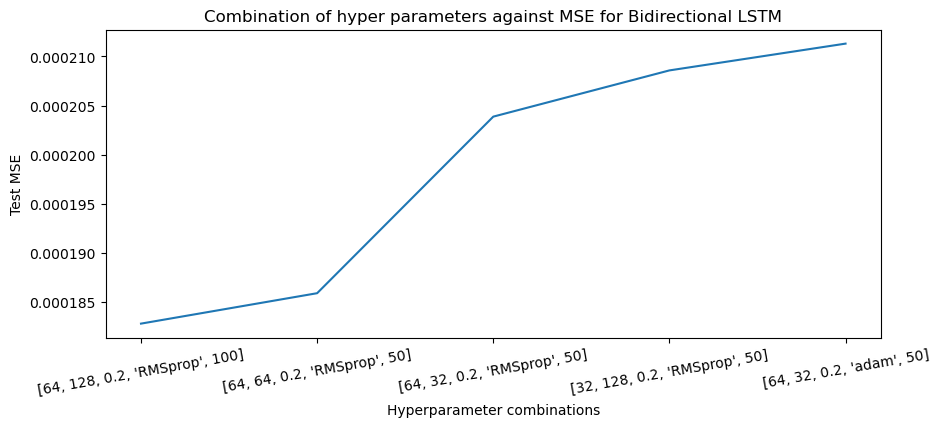

In [103]:
fig = plt.figure(figsize=(10,4))
#giving 5 numbers for easy plotting of hyperparameters
x=[1,2,3,4,5]
#plotting numbers against MSE of first 5 rows of bidirectional LSTM
plt.plot(x,mse_bidirection)
#changing xticks to combinations of hyperparameters and rotating 
plt.xticks(x,params_bidirection,rotation=10)
#labels and title of plot
plt.xlabel("Hyperparameter combinations")
plt.ylabel("Test MSE")
plt.title("Combination of hyper parameters against MSE for Bidirectional LSTM")
plt.show()

In [105]:
#printing best combination of the bidirectional LSTM
print(f'Best Combination: \n stacked_layer = {hist3.iloc[1, 0]}\n Bi directional_layer = {hist3.iloc[1, 1]}\n CNN_layer = {hist3.iloc[1, 2]}\n single_layer = {hist3.iloc[1, 3]}\n n_neurons = {hist3.iloc[1, 4]}\n n_batch_size = {hist3.iloc[1, 5]}\n dropout = {hist3.iloc[1, 6]}  \n optimizer ={hist3.iloc[1,7]} \n epochs ={hist3.iloc[1,8]}')
print('**************************')
#results before tuning hyperparameters
print(f'Results Before Tuning for bidirectional LSTM:\n Test Set RMSE: {numpy.round(bidirection_results, 6)}\n')
#results after tuning hyperparameters
print(f'Results After Tuning for bidirectional LSTM:\n Test Set RMSE: {numpy.round(hist3.iloc[1, -1], 6)}\n')
#Improvent of results before and after tuning
print(f'{numpy.round((bidirection_results - hist3.iloc[1, -1])*100/numpy.round(bidirection_results, 6))}% Improvement')

Best Combination: 
 stacked_layer = False
 Bi directional_layer = True
 CNN_layer = False
 single_layer = False
 n_neurons = 64
 n_batch_size = 64
 dropout = 0.2  
 optimizer =RMSprop 
 epochs =50
**************************
Results Before Tuning for bidirectional LSTM:
 Test Set RMSE: 0.000204

Results After Tuning for bidirectional LSTM:
 Test Set RMSE: 0.000186

9.0% Improvement


In [111]:
#best hyperparameter combination for bidirectional LSTM
config3 = list(hist3.iloc[1,:-2])
#building Bidirectional LSTM model with best combination
bidirectional_lstm_model,bidirectional_lstm_history = lstm_model(trainX,trainY,testX,testY,config3)


Epoch 00001: val_loss improved from inf to 0.08404, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08404 to 0.06157, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06157 to 0.04309, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04309 to 0.02766, saving model to weight.h5

Epoch 00005: val_loss improved from 0.02766 to 0.01638, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01638 to 0.00923, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00923 to 0.00654, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00654 to 0.00582, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00582 to 0.00525, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00525 to 0.00459, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00459 to 0.00395, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00395 to 0.00327, saving model to weight.h5

Epoch 0

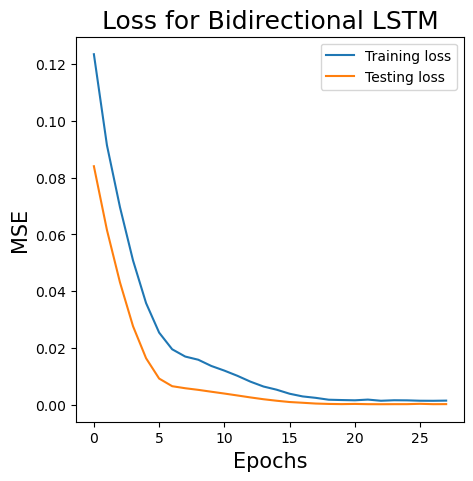

In [441]:
fig = plt.figure(figsize=(5,5))
#plottig loss for bidirectional LSTM
#training LOSS
plt.plot(bidirectional_lstm_history.epoch, bidirectional_lstm_history.history['loss'], label="Training loss")
#vaidation LOSS
plt.plot(bidirectional_lstm_history.epoch, bidirectional_lstm_history.history['val_loss'], label="Testing loss")
#title and labels
plt.title("Loss for Bidirectional LSTM", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
#plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [113]:
#predicting for training data using bidirectional LSTM
trainPredictions_bidirectional= predict(bidirectional_lstm_model,trainX)
#predicting for testing data using bidirectional LSTM
testPredictions_bidirectional = predict(bidirectional_lstm_model,testX)

In [114]:
# invert train predictions of bidirectional LSTM(de-normalizing data)
trainPredict_bidirectional = inverse_transform(dataset,trainPredictions_bidirectional)
#denormalize train data
trainY = inverse_transform(dataset,[trainY])
#denormalize test predictions of bidirectional LSTM
testPredict_bidirectional = inverse_transform(dataset,testPredictions_bidirectional)
#denormalize test data
testY = inverse_transform(dataset,[testY])

In [115]:
# calculate root mean squared error for train and test data using bidirectional LSTM predictions
trainScore_bidirectional = rmse(trainY,trainPredict_bidirectional)
print('Train Score : %.2f RMSE for Bidirectional LSTM' % (trainScore_bidirectional))
testScore_bidirectional = rmse(testY,testPredict_bidirectional)
print('Test Score: %.2f RMSE for Bidirectional LSTM' % (testScore_bidirectional))

Train Score : 2.76 RMSE for Bidirectional LSTM
Test Score: 2.01 RMSE for Bidirectional LSTM


In [116]:
#number of future days to be predicted
time_Preds=100
#future predictions for 100 days using bidirectional LSTM model
futurePreds_bidirectional = future_preds(dates,dataset,bidirectional_lstm_model,testX,time_Preds)

In [117]:
time=1
#converting the train predictions and dates as index to data frame for bidirectional LSTM
PREDICTION_TRAIN_BIDIRECTION = pd.DataFrame(trainPredict_bidirectional, columns=['Open']).set_index(pd.Series(dates[time:len(trainPredict_bidirectional)+time]))
#converting the test predictions and dates as index to data frame for bidirectional LSTM
PREDICTION_TEST_BIDIRECTION = pd.DataFrame(testPredict_bidirectional, columns=['Open']).set_index(pd.Series(dates[len(trainPredict_bidirectional)+(time*2)+1:len(dataset)-1:]))


In [118]:
#to get forecasting error for train data prediction of bidirectional LSTM 
train_band_size= train_confidence(trainPredict_bidirectional,df)
#to get forecasting error for test data prediction of bidirectional LSTM 
test_band_size = test_confidence(trainPredict_bidirectional, testPredict_bidirectional,df)

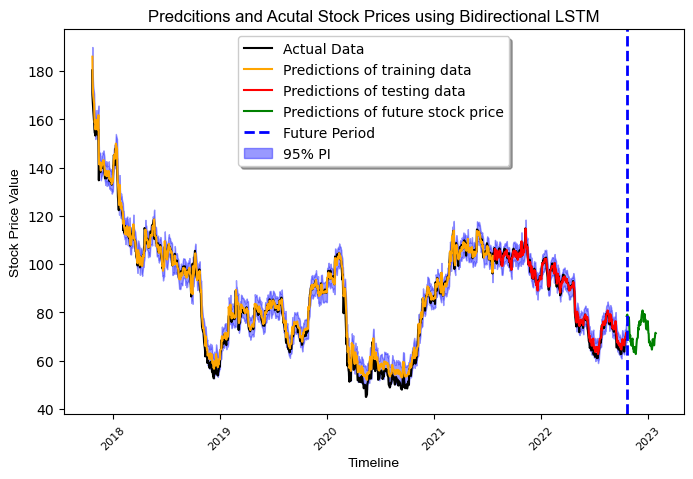

In [452]:
fig=plt.figure(figsize=(8,5))

#plotting actual data against date
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
#plotting train predictions 
plt.plot(PREDICTION_TRAIN_BIDIRECTION.index,PREDICTION_TRAIN_BIDIRECTION['Open'],color='orange',label="Predictions of training data")
#plotting test predictions
plt.plot(PREDICTION_TEST_BIDIRECTION.index,PREDICTION_TEST_BIDIRECTION['Open'],color='red',label="Predictions of testing data")
#plotting future predictions
plt.plot(futurePreds_bidirectional.index,futurePreds_bidirectional['Open'],color='green',label="Predictions of future stock price")
#to get vertical line where future predictions start 
plt.axvline(x = min(futurePreds_bidirectional.index), color='blue', linewidth=2, linestyle='--',label="Future Period")
#plotting 95% PI for train data
plt.fill_between(PREDICTION_TRAIN_BIDIRECTION.index, (PREDICTION_TRAIN_BIDIRECTION['Open']-train_band_size), (PREDICTION_TRAIN_BIDIRECTION['Open']+train_band_size), color='blue', alpha=.4)
#95% PI for test data
plt.fill_between(PREDICTION_TEST_BIDIRECTION.index, (PREDICTION_TEST_BIDIRECTION['Open']-test_band_size), (PREDICTION_TEST_BIDIRECTION['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#legends
plt.legend(shadow=True)
#title and labels
plt.title('Predcitions and Acutal Stock Prices using Bidirectional LSTM', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

### CNN LSTM Analysis

In [120]:
#getting trainX and trainY data in normalized scale
trainX,trainY = train_data(train)
#getting testX and testY data in normalized scale
testX,testY = test_data(test)
#reshaping trainX and testX
trainX,testX = shape_data(trainX,testX)

In [121]:
#initial hyperparameters for CNN LSTM
#list[stacked_lstm, bidirectional_lstm, CNN LSTm, Single LSTM, neurons, batch size, dropout, optimizer, epochs]

config_cnn = [False, False, True,False, 64, 32, 0.2,'adam',50] 
# ------------------CNN LSTM-----------------------

cnn_lstm_model,cnn_lstm_history = lstm_model(trainX,trainY,testX,testY,config_cnn)


Epoch 00001: val_loss improved from inf to 0.00275, saving model to weight.h5

Epoch 00002: val_loss improved from 0.00275 to 0.00150, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00150 to 0.00064, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00064 to 0.00031, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00031 to 0.00030, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00030 to 0.00028, saving model to weight.h5

Epoch 00007: val_loss did not improve from 0.00028

Epoch 00008: val_loss improved from 0.00028 to 0.00024, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00024 to 0.00020, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00020 to 0.00018, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00018 to 0.00017, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.00017

Epoch 00013: val_loss did not improve from 0.00017

Epoch 00014: val_

In [122]:
fig = plt.figure(figsize=(5,5))

#plotting loss using CNN LSTM model
#training loss
plt.plot(cnn_lstm_history.epoch, cnn_lstm_history.history['loss'], label="loss")
#validaton loss
plt.plot(cnn_lstm_history.epoch, cnn_lstm_history.history['val_loss'], label="val_loss")
#title and labels
plt.title("Loss using CNN LSTM", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [124]:
#results of CNN LSTM for initial hyperparameters
cnn_results = cnn_lstm_model.evaluate(testX, testY)
#rounding the results to 6 digits and priniting
print("test loss, test acc:", numpy.round(cnn_results, 6))

10/10 [==============================] - 0s 2ms/step - loss: 2.1995e-04
test loss, test acc: 0.00022


In [125]:
#tuning hyperparameters for CNN LSTM
#list[stacked_lstm, bidirectional_lstm, CNN LSTM, Single LSTM, neurons, batch size, dropout, optimizer, epochs]

config = [[False], [False], [True],[False], [16, 32, 64], 
              [32, 64, 128], [0.2],['adam','adamax','SGD','RMSprop'],[20,50,100]]  


#building model and storing results of each hyperparameter combinations in list for CNN LSTM
hist = LSTM_HyperParameter_Tuning(config, trainX, trainY, testX, testY) 

[(False, False, True, False, 16, 32, 0.2, 'adam', 20), (False, False, True, False, 16, 32, 0.2, 'adam', 50), (False, False, True, False, 16, 32, 0.2, 'adam', 100), (False, False, True, False, 16, 32, 0.2, 'adamax', 20), (False, False, True, False, 16, 32, 0.2, 'adamax', 50), (False, False, True, False, 16, 32, 0.2, 'adamax', 100), (False, False, True, False, 16, 32, 0.2, 'SGD', 20), (False, False, True, False, 16, 32, 0.2, 'SGD', 50), (False, False, True, False, 16, 32, 0.2, 'SGD', 100), (False, False, True, False, 16, 32, 0.2, 'RMSprop', 20), (False, False, True, False, 16, 32, 0.2, 'RMSprop', 50), (False, False, True, False, 16, 32, 0.2, 'RMSprop', 100), (False, False, True, False, 16, 64, 0.2, 'adam', 20), (False, False, True, False, 16, 64, 0.2, 'adam', 50), (False, False, True, False, 16, 64, 0.2, 'adam', 100), (False, False, True, False, 16, 64, 0.2, 'adamax', 20), (False, False, True, False, 16, 64, 0.2, 'adamax', 50), (False, False, True, False, 16, 64, 0.2, 'adamax', 100), (Fa


Epoch 00003: val_loss improved from 0.00393 to 0.00297, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00297 to 0.00210, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00210 to 0.00128, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00128 to 0.00077, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00077 to 0.00063, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00063 to 0.00050, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00050 to 0.00037, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00037 to 0.00034, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.00034

Epoch 00012: val_loss improved from 0.00034 to 0.00026, saving model to weight.h5

Epoch 00013: val_loss did not improve from 0.00026

Epoch 00014: val_loss did not improve from 0.00026

Epoch 00015: val_loss did not improve from 0.00026

Epoch 00016: val_loss improved from 0.00026 


Epoch 00021: val_loss did not improve from 0.00033

Epoch 00022: val_loss did not improve from 0.00033

Epoch 00023: val_loss improved from 0.00033 to 0.00024, saving model to weight.h5

Epoch 00024: val_loss did not improve from 0.00024

Epoch 00025: val_loss did not improve from 0.00024

Epoch 00026: val_loss did not improve from 0.00024

Epoch 00027: val_loss did not improve from 0.00024

Epoch 00028: val_loss did not improve from 0.00024
Epoch 00028: early stopping
4-th combination = (False, False, True, False, 16, 32, 0.2, 'adamax', 50) 
 train accuracy: 0.0006222529918886721 and test accuracy: 0.0004360608581919223
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
6th combination: 

--------------------------------------------------------------------

Epoch


Epoch 00035: val_loss improved from 0.00693 to 0.00686, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00686 to 0.00678, saving model to weight.h5

Epoch 00037: val_loss improved from 0.00678 to 0.00671, saving model to weight.h5

Epoch 00038: val_loss improved from 0.00671 to 0.00663, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00663 to 0.00655, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00655 to 0.00648, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00648 to 0.00640, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00640 to 0.00632, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00632 to 0.00625, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00625 to 0.00617, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00617 to 0.00610, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00610 to 0.00602, saving model to weight.h5

Epo


Epoch 00079: val_loss improved from 0.00446 to 0.00439, saving model to weight.h5

Epoch 00080: val_loss improved from 0.00439 to 0.00432, saving model to weight.h5

Epoch 00081: val_loss improved from 0.00432 to 0.00425, saving model to weight.h5

Epoch 00082: val_loss improved from 0.00425 to 0.00417, saving model to weight.h5

Epoch 00083: val_loss improved from 0.00417 to 0.00410, saving model to weight.h5

Epoch 00084: val_loss improved from 0.00410 to 0.00403, saving model to weight.h5

Epoch 00085: val_loss improved from 0.00403 to 0.00396, saving model to weight.h5

Epoch 00086: val_loss improved from 0.00396 to 0.00389, saving model to weight.h5

Epoch 00087: val_loss improved from 0.00389 to 0.00382, saving model to weight.h5

Epoch 00088: val_loss improved from 0.00382 to 0.00376, saving model to weight.h5

Epoch 00089: val_loss improved from 0.00376 to 0.00369, saving model to weight.h5

Epoch 00090: val_loss improved from 0.00369 to 0.00362, saving model to weight.h5

Epo


Epoch 00001: val_loss improved from inf to 0.06364, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06364 to 0.02569, saving model to weight.h5

Epoch 00003: val_loss improved from 0.02569 to 0.00520, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00520 to 0.00351, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00351 to 0.00284, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00284 to 0.00208, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00208 to 0.00168, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00168 to 0.00132, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00132 to 0.00098, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00098 to 0.00073, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00073 to 0.00056, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00056 to 0.00055, saving model to weight.h5

Epoch 0


Epoch 00013: val_loss improved from 0.00206 to 0.00182, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00182 to 0.00160, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00160 to 0.00141, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00141 to 0.00125, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00125 to 0.00109, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00109 to 0.00095, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00095 to 0.00082, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00082 to 0.00079, saving model to weight.h5
15-th combination = (False, False, True, False, 16, 64, 0.2, 'adamax', 20) 
 train accuracy: 0.001837352872826159 and test accuracy: 0.0007944031967781484
--------------------------------------------------------------------
--------------------------------------------------------------------
-------------------------------------------

17-th combination = (False, False, True, False, 16, 64, 0.2, 'adamax', 100) 
 train accuracy: 0.0005983602604828775 and test accuracy: 0.00030361651442945004
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
19th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.06239, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06239 to 0.03665, saving model to weight.h5

Epoch 00003: val_loss improved from 0.03665 to 0.02384, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02384 to 0.01738, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01738 to 0.01427, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01427 to 0.01270, saving mo


Epoch 00013: val_loss improved from 0.01208 to 0.01201, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01201 to 0.01194, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01194 to 0.01187, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01187 to 0.01180, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01180 to 0.01173, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01173 to 0.01165, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01165 to 0.01158, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01158 to 0.01151, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01151 to 0.01143, saving model to weight.h5

Epoch 00022: val_loss improved from 0.01143 to 0.01136, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01136 to 0.01129, saving model to weight.h5

Epoch 00024: val_loss improved from 0.01129 to 0.01121, saving model to weight.h5

Epo


Epoch 00007: val_loss improved from 0.00079 to 0.00057, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00057 to 0.00039, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00039 to 0.00019, saving model to weight.h5

Epoch 00010: val_loss did not improve from 0.00019

Epoch 00011: val_loss did not improve from 0.00019

Epoch 00012: val_loss did not improve from 0.00019

Epoch 00013: val_loss did not improve from 0.00019

Epoch 00014: val_loss did not improve from 0.00019
Epoch 00014: early stopping
21-th combination = (False, False, True, False, 16, 64, 0.2, 'RMSprop', 20) 
 train accuracy: 0.0007250782800838351 and test accuracy: 0.0005954219377599657
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
23th combination: 

----------


Epoch 00020: val_loss improved from 0.00058 to 0.00049, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00049 to 0.00044, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00044 to 0.00040, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00040 to 0.00039, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00039 to 0.00036, saving model to weight.h5

Epoch 00025: val_loss improved from 0.00036 to 0.00032, saving model to weight.h5

Epoch 00026: val_loss improved from 0.00032 to 0.00029, saving model to weight.h5

Epoch 00027: val_loss did not improve from 0.00029

Epoch 00028: val_loss did not improve from 0.00029

Epoch 00029: val_loss did not improve from 0.00029

Epoch 00030: val_loss improved from 0.00029 to 0.00024, saving model to weight.h5

Epoch 00031: val_loss did not improve from 0.00024

Epoch 00032: val_loss did not improve from 0.00024

Epoch 00033: val_loss did not improve from 0.00024

Epoch 00034: val_loss d


Epoch 00013: val_loss improved from 0.00408 to 0.00392, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00392 to 0.00371, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00371 to 0.00350, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00350 to 0.00333, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00333 to 0.00318, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00318 to 0.00303, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00303 to 0.00289, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00289 to 0.00276, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00276 to 0.00263, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00263 to 0.00248, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00248 to 0.00235, saving model to weight.h5

Epoch 00024: val_loss improved from 0.00235 to 0.00222, saving model to weight.h5

Epo


Epoch 00060: val_loss did not improve from 0.00037

Epoch 00061: val_loss did not improve from 0.00037

Epoch 00062: val_loss did not improve from 0.00037

Epoch 00063: val_loss did not improve from 0.00037
Epoch 00063: early stopping
29-th combination = (False, False, True, False, 16, 128, 0.2, 'adamax', 100) 
 train accuracy: 0.0007625163998454809 and test accuracy: 0.0003968800592701882
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
31th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.09160, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09160 to 0.06707, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06707 to 0.05044, saving model to weight


Epoch 00012: val_loss improved from 0.01247 to 0.01191, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01191 to 0.01146, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01146 to 0.01117, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01117 to 0.01099, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01099 to 0.01080, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01080 to 0.01071, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01071 to 0.01062, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01062 to 0.01055, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01055 to 0.01051, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01051 to 0.01047, saving model to weight.h5

Epoch 00022: val_loss improved from 0.01047 to 0.01043, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01043 to 0.01041, saving model to weight.h5

Epo


Epoch 00005: val_loss improved from 0.01442 to 0.00614, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00614 to 0.00366, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00366 to 0.00301, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00301 to 0.00260, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00260 to 0.00198, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00198 to 0.00145, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00145 to 0.00102, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00102 to 0.00062, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00062 to 0.00045, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00045

Epoch 00015: val_loss improved from 0.00045 to 0.00031, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00031

Epoch 00017: val_loss improved from 0.00031 to 0.00029, saving mo


Epoch 00011: val_loss did not improve from 0.00017

Epoch 00012: val_loss did not improve from 0.00017

Epoch 00013: val_loss did not improve from 0.00017

Epoch 00014: val_loss did not improve from 0.00017
Epoch 00014: early stopping
37-th combination = (False, False, True, False, 32, 32, 0.2, 'adam', 50) 
 train accuracy: 0.0004425209481269121 and test accuracy: 0.00030127970967441797
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
39th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.00611, saving model to weight.h5

Epoch 00002: val_loss improved from 0.00611 to 0.00219, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00219 to 0.00121, saving model to weight.h5


Epoch 00025: val_loss did not improve from 0.00025

Epoch 00026: val_loss did not improve from 0.00025

Epoch 00027: val_loss did not improve from 0.00025
Epoch 00027: early stopping
41-th combination = (False, False, True, False, 32, 32, 0.2, 'adamax', 100) 
 train accuracy: 0.0005134470411576331 and test accuracy: 0.00028328082407824695
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
43th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.03632, saving model to weight.h5

Epoch 00002: val_loss improved from 0.03632 to 0.01760, saving model to weight.h5

Epoch 00003: val_loss improved from 0.01760 to 0.01264, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01264 to 


Epoch 00009: val_loss improved from 0.00875 to 0.00866, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00866 to 0.00859, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00859 to 0.00850, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00850 to 0.00842, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00842 to 0.00834, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00834 to 0.00828, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00828 to 0.00819, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00819 to 0.00811, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00811 to 0.00804, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00804 to 0.00796, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00796 to 0.00788, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00788 to 0.00781, saving model to weight.h5

Epo


Epoch 00003: val_loss improved from 0.00103 to 0.00050, saving model to weight.h5

Epoch 00004: val_loss did not improve from 0.00050

Epoch 00005: val_loss did not improve from 0.00050

Epoch 00006: val_loss did not improve from 0.00050

Epoch 00007: val_loss improved from 0.00050 to 0.00021, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00021 to 0.00018, saving model to weight.h5

Epoch 00009: val_loss did not improve from 0.00018

Epoch 00010: val_loss did not improve from 0.00018

Epoch 00011: val_loss did not improve from 0.00018

Epoch 00012: val_loss did not improve from 0.00018

Epoch 00013: val_loss did not improve from 0.00018
Epoch 00013: early stopping
45-th combination = (False, False, True, False, 32, 32, 0.2, 'RMSprop', 20) 
 train accuracy: 0.0012966974172741175 and test accuracy: 0.0009449452045373619
--------------------------------------------------------------------
--------------------------------------------------------------------
------------


Epoch 00001: val_loss improved from inf to 0.05482, saving model to weight.h5

Epoch 00002: val_loss improved from 0.05482 to 0.01088, saving model to weight.h5

Epoch 00003: val_loss improved from 0.01088 to 0.00413, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00413 to 0.00271, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00271 to 0.00178, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00178 to 0.00129, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00129 to 0.00095, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00095 to 0.00063, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00063 to 0.00047, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00047 to 0.00036, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.00036

Epoch 00012: val_loss improved from 0.00036 to 0.00027, saving model to weight.h5

Epoch 00013: val_loss did not improve 


Epoch 00010: val_loss improved from 0.00173 to 0.00151, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00151 to 0.00132, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00132 to 0.00113, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00113 to 0.00097, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00097 to 0.00085, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00085 to 0.00073, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00073 to 0.00063, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00063 to 0.00055, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00055 to 0.00048, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00048 to 0.00046, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00046 to 0.00045, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00045 to 0.00036, saving model to weight.h5

Epo


Epoch 00043: val_loss improved from 0.01087 to 0.01084, saving model to weight.h5

Epoch 00044: val_loss improved from 0.01084 to 0.01080, saving model to weight.h5

Epoch 00045: val_loss improved from 0.01080 to 0.01076, saving model to weight.h5

Epoch 00046: val_loss improved from 0.01076 to 0.01073, saving model to weight.h5

Epoch 00047: val_loss improved from 0.01073 to 0.01069, saving model to weight.h5

Epoch 00048: val_loss improved from 0.01069 to 0.01066, saving model to weight.h5

Epoch 00049: val_loss improved from 0.01066 to 0.01062, saving model to weight.h5

Epoch 00050: val_loss improved from 0.01062 to 0.01058, saving model to weight.h5
55-th combination = (False, False, True, False, 32, 64, 0.2, 'SGD', 50) 
 train accuracy: 0.02906510978937149 and test accuracy: 0.010582211427390575
--------------------------------------------------------------------
--------------------------------------------------------------------
------------------------------------------------


Epoch 00087: val_loss improved from 0.00799 to 0.00796, saving model to weight.h5

Epoch 00088: val_loss improved from 0.00796 to 0.00792, saving model to weight.h5

Epoch 00089: val_loss improved from 0.00792 to 0.00788, saving model to weight.h5

Epoch 00090: val_loss improved from 0.00788 to 0.00785, saving model to weight.h5

Epoch 00091: val_loss improved from 0.00785 to 0.00781, saving model to weight.h5

Epoch 00092: val_loss improved from 0.00781 to 0.00778, saving model to weight.h5

Epoch 00093: val_loss improved from 0.00778 to 0.00775, saving model to weight.h5

Epoch 00094: val_loss improved from 0.00775 to 0.00771, saving model to weight.h5

Epoch 00095: val_loss improved from 0.00771 to 0.00768, saving model to weight.h5

Epoch 00096: val_loss improved from 0.00768 to 0.00764, saving model to weight.h5

Epoch 00097: val_loss improved from 0.00764 to 0.00760, saving model to weight.h5

Epoch 00098: val_loss improved from 0.00760 to 0.00757, saving model to weight.h5

Epo


Epoch 00013: val_loss improved from 0.00106 to 0.00086, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00086 to 0.00072, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00072 to 0.00059, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00059 to 0.00051, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00051 to 0.00044, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00044 to 0.00036, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00036 to 0.00032, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00032 to 0.00031, saving model to weight.h5
60-th combination = (False, False, True, False, 32, 128, 0.2, 'adam', 20) 
 train accuracy: 0.0006731986068189144 and test accuracy: 0.0003094385319855064
--------------------------------------------------------------------
--------------------------------------------------------------------
-------------------------------------------


Epoch 00001: val_loss improved from inf to 0.07793, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07793 to 0.05008, saving model to weight.h5

Epoch 00003: val_loss improved from 0.05008 to 0.02822, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02822 to 0.01293, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01293 to 0.00494, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00494 to 0.00291, saving model to weight.h5

Epoch 00007: val_loss did not improve from 0.00291

Epoch 00008: val_loss did not improve from 0.00291

Epoch 00009: val_loss improved from 0.00291 to 0.00279, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00279 to 0.00238, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00238 to 0.00215, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00215 to 0.00200, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00200 to 0.00187, saving model 


Epoch 00049: val_loss did not improve from 0.00032

Epoch 00050: val_loss did not improve from 0.00032

Epoch 00051: val_loss did not improve from 0.00032

Epoch 00052: val_loss did not improve from 0.00032
Epoch 00052: early stopping
65-th combination = (False, False, True, False, 32, 128, 0.2, 'adamax', 100) 
 train accuracy: 0.0006788207101635635 and test accuracy: 0.0003190509451087564
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
67th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.07728, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07728 to 0.05645, saving model to weight.h5

Epoch 00003: val_loss improved from 0.05645 to 0.04216, saving model to weight


Epoch 00010: val_loss improved from 0.01330 to 0.01231, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01231 to 0.01166, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01166 to 0.01119, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01119 to 0.01082, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01082 to 0.01060, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01060 to 0.01043, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01043 to 0.01027, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01027 to 0.01019, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01019 to 0.01014, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01014 to 0.01009, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01009 to 0.01005, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01005 to 0.01000, saving model to weight.h5

Epo


Epoch 00004: val_loss improved from 0.00355 to 0.00206, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00206 to 0.00167, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00167 to 0.00130, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00130 to 0.00081, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00081 to 0.00046, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00046 to 0.00031, saving model to weight.h5

Epoch 00010: val_loss did not improve from 0.00031

Epoch 00011: val_loss improved from 0.00031 to 0.00022, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00022 to 0.00018, saving model to weight.h5

Epoch 00013: val_loss did not improve from 0.00018

Epoch 00014: val_loss did not improve from 0.00018

Epoch 00015: val_loss did not improve from 0.00018

Epoch 00016: val_loss did not improve from 0.00018

Epoch 00017: val_loss did not improve from 0.00018
Epoch 00017: early stopp


Epoch 00007: val_loss improved from 0.00030 to 0.00018, saving model to weight.h5

Epoch 00008: val_loss did not improve from 0.00018

Epoch 00009: val_loss did not improve from 0.00018

Epoch 00010: val_loss did not improve from 0.00018

Epoch 00011: val_loss did not improve from 0.00018

Epoch 00012: val_loss did not improve from 0.00018
Epoch 00012: early stopping
73-th combination = (False, False, True, False, 64, 32, 0.2, 'adam', 50) 
 train accuracy: 0.00040406943298876286 and test accuracy: 0.00018082634778693318
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
75th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.00313, saving model to weight.h5

Epoch 00002: val_loss improv


Epoch 00012: val_loss did not improve from 0.00024

Epoch 00013: val_loss improved from 0.00024 to 0.00023, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00023

Epoch 00015: val_loss improved from 0.00023 to 0.00023, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00023

Epoch 00017: val_loss improved from 0.00023 to 0.00022, saving model to weight.h5

Epoch 00018: val_loss did not improve from 0.00022

Epoch 00019: val_loss improved from 0.00022 to 0.00020, saving model to weight.h5

Epoch 00020: val_loss did not improve from 0.00020

Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00021: val_loss did not improve from 0.00020

Epoch 00022: val_loss did not improve from 0.00020

Epoch 00023: val_loss did not improve from 0.00020

Epoch 00024: val_loss improved from 0.00020 to 0.00020, saving model to weight.h5

Epoch 00025: val_loss did not improve from 0.00020

Epoch 00026: val_loss did not impro


Epoch 00001: val_loss improved from inf to 0.03875, saving model to weight.h5

Epoch 00002: val_loss improved from 0.03875 to 0.01865, saving model to weight.h5

Epoch 00003: val_loss improved from 0.01865 to 0.01349, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01349 to 0.01225, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01225 to 0.01184, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01184 to 0.01163, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01163 to 0.01153, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01153 to 0.01144, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01144 to 0.01135, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01135 to 0.01127, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01127 to 0.01120, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01120 to 0.01112, saving model to weight.h5

Epoch 0

80-th combination = (False, False, True, False, 64, 32, 0.2, 'SGD', 100) 
 train accuracy: 0.012056096456944942 and test accuracy: 0.004421660210937262
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
82th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.00242, saving model to weight.h5

Epoch 00002: val_loss improved from 0.00242 to 0.00088, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00088 to 0.00020, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00020 to 0.00019, saving model to weight.h5

Epoch 00005: val_loss did not improve from 0.00019

Epoch 00006: val_loss did not improve from 0.00019

Epoch 00007: val_loss did not improve from 0.00019


Epoch 00001: val_loss improved from inf to 0.03789, saving model to weight.h5

Epoch 00002: val_loss improved from 0.03789 to 0.00249, saving model to weight.h5

Epoch 00003: val_loss did not improve from 0.00249

Epoch 00004: val_loss improved from 0.00249 to 0.00156, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00156 to 0.00108, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00108 to 0.00066, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00066 to 0.00046, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00046 to 0.00031, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00031 to 0.00026, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00026 to 0.00026, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00026 to 0.00022, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.00022

Epoch 00013: val_loss did not improve from 0.00022

Epoch 00014: val_


Epoch 00019: val_loss improved from 0.00045 to 0.00039, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00039 to 0.00035, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00035 to 0.00031, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00031 to 0.00029, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00029 to 0.00028, saving model to weight.h5

Epoch 00024: val_loss did not improve from 0.00028

Epoch 00025: val_loss improved from 0.00028 to 0.00024, saving model to weight.h5

Epoch 00026: val_loss did not improve from 0.00024

Epoch 00027: val_loss did not improve from 0.00024

Epoch 00028: val_loss did not improve from 0.00024

Epoch 00029: val_loss improved from 0.00024 to 0.00024, saving model to weight.h5

Epoch 00030: val_loss did not improve from 0.00024

Epoch 00031: val_loss did not improve from 0.00024

Epoch 00032: val_loss did not improve from 0.00024

Epoch 00033: val_loss improved from 0.00024 to 0.00023


Epoch 00041: val_loss improved from 0.00952 to 0.00948, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00948 to 0.00944, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00944 to 0.00940, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00940 to 0.00936, saving model to weight.h5

Epoch 00045: val_loss improved from 0.00936 to 0.00932, saving model to weight.h5

Epoch 00046: val_loss improved from 0.00932 to 0.00928, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00928 to 0.00924, saving model to weight.h5

Epoch 00048: val_loss improved from 0.00924 to 0.00920, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00920 to 0.00917, saving model to weight.h5

Epoch 00050: val_loss improved from 0.00917 to 0.00913, saving model to weight.h5
91-th combination = (False, False, True, False, 64, 64, 0.2, 'SGD', 50) 
 train accuracy: 0.02507946826517582 and test accuracy: 0.009126785211265087
--------------------


Epoch 00085: val_loss improved from 0.00828 to 0.00824, saving model to weight.h5

Epoch 00086: val_loss improved from 0.00824 to 0.00821, saving model to weight.h5

Epoch 00087: val_loss improved from 0.00821 to 0.00817, saving model to weight.h5

Epoch 00088: val_loss improved from 0.00817 to 0.00813, saving model to weight.h5

Epoch 00089: val_loss improved from 0.00813 to 0.00810, saving model to weight.h5

Epoch 00090: val_loss improved from 0.00810 to 0.00806, saving model to weight.h5

Epoch 00091: val_loss improved from 0.00806 to 0.00802, saving model to weight.h5

Epoch 00092: val_loss improved from 0.00802 to 0.00799, saving model to weight.h5

Epoch 00093: val_loss improved from 0.00799 to 0.00795, saving model to weight.h5

Epoch 00094: val_loss improved from 0.00795 to 0.00791, saving model to weight.h5

Epoch 00095: val_loss improved from 0.00791 to 0.00787, saving model to weight.h5

Epoch 00096: val_loss improved from 0.00787 to 0.00784, saving model to weight.h5

Epo

96-th combination = (False, False, True, False, 64, 128, 0.2, 'adam', 20) 
 train accuracy: 0.0006013578386045992 and test accuracy: 0.00027544228942133486
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
98th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.06850, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06850 to 0.03317, saving model to weight.h5

Epoch 00003: val_loss improved from 0.03317 to 0.00852, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00852 to 0.00285, saving model to weight.h5

Epoch 00005: val_loss did not improve from 0.00285

Epoch 00006: val_loss did not improve from 0.00285

Epoch 00007: val_loss improved from 0.00285 to


Epoch 00003: val_loss improved from 0.04616 to 0.02256, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02256 to 0.00802, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00802 to 0.00322, saving model to weight.h5

Epoch 00006: val_loss did not improve from 0.00322

Epoch 00007: val_loss did not improve from 0.00322

Epoch 00008: val_loss improved from 0.00322 to 0.00312, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00312 to 0.00246, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00246 to 0.00218, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00218 to 0.00200, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00200 to 0.00184, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00184 to 0.00170, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00170 to 0.00158, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00158 to 0.00141, saving mo


Epoch 00003: val_loss improved from 0.06780 to 0.05026, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05026 to 0.03867, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03867 to 0.03057, saving model to weight.h5

Epoch 00006: val_loss improved from 0.03057 to 0.02507, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02507 to 0.02119, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02119 to 0.01841, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01841 to 0.01655, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01655 to 0.01527, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01527 to 0.01438, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01438 to 0.01382, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01382 to 0.01335, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01335 to 0.01306, saving model to weight.h5

Epo


Epoch 00022: val_loss improved from 0.01191 to 0.01187, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01187 to 0.01184, saving model to weight.h5

Epoch 00024: val_loss improved from 0.01184 to 0.01182, saving model to weight.h5

Epoch 00025: val_loss improved from 0.01182 to 0.01179, saving model to weight.h5

Epoch 00026: val_loss improved from 0.01179 to 0.01176, saving model to weight.h5

Epoch 00027: val_loss improved from 0.01176 to 0.01175, saving model to weight.h5

Epoch 00028: val_loss improved from 0.01175 to 0.01173, saving model to weight.h5

Epoch 00029: val_loss improved from 0.01173 to 0.01171, saving model to weight.h5

Epoch 00030: val_loss improved from 0.01171 to 0.01169, saving model to weight.h5

Epoch 00031: val_loss improved from 0.01169 to 0.01168, saving model to weight.h5

Epoch 00032: val_loss improved from 0.01168 to 0.01167, saving model to weight.h5

Epoch 00033: val_loss improved from 0.01167 to 0.01165, saving model to weight.h5

Epo

105-th combination = (False, False, True, False, 64, 128, 0.2, 'RMSprop', 20) 
 train accuracy: 0.00038881032378412783 and test accuracy: 0.00021714597824029624
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
107th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.04720, saving model to weight.h5

Epoch 00002: val_loss improved from 0.04720 to 0.01313, saving model to weight.h5

Epoch 00003: val_loss improved from 0.01313 to 0.00275, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00275 to 0.00226, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00226 to 0.00172, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00172 to 0.00116, savin

In [126]:
#converting list of hyperparameter tuning results of CNN LSTM to data frame
hist4 = pd.DataFrame(hist)
#sorting them based on TEST MSE in ascending order 
hist4 = hist4.sort_values(by=[10], ascending=True)
hist4

0      1     2      3   4    5    6        7    8         9         10
72   False  False  True  False  64   32  0.2     adam   20  0.000331  0.000166
74   False  False  True  False  64   32  0.2     adam  100  0.000336  0.000175
84   False  False  True  False  64   64  0.2     adam   20  0.000417  0.000178
73   False  False  True  False  64   32  0.2     adam   50  0.000404  0.000181
23   False  False  True  False  16   64  0.2  RMSprop  100  0.000442  0.000190
..     ...    ...   ...    ...  ..  ...  ...      ...  ...       ...       ...
104  False  False  True  False  64  128  0.2      SGD  100  0.029072  0.010610
18   False  False  True  False  16   64  0.2      SGD   20  0.029255  0.010665
31   False  False  True  False  16  128  0.2      SGD   50  0.031213  0.011326
30   False  False  True  False  16  128  0.2      SGD   20  0.033708  0.012305
102  False  False  True  False  64  128  0.2      SGD   20  0.033787  0.012311

[108 rows x 11 columns]

In [128]:
# getting neurons, batch size, drop out , optimizer and epochs for first five rows of hyperparameter combinations for CNN LSTM
params_cnn= [[hist4.iloc[0,4],hist4.iloc[0,5],hist4.iloc[0,6],hist4.iloc[0,7],hist4.iloc[0,8]],
         [hist4.iloc[1,4],hist4.iloc[1,5],hist4.iloc[1,6],hist4.iloc[1,7],hist4.iloc[1,8]],
         [hist4.iloc[2,4],hist4.iloc[2,5],hist4.iloc[2,6],hist4.iloc[2,7],hist4.iloc[2,8]],
         [hist4.iloc[3,4],hist4.iloc[3,5],hist4.iloc[3,6],hist4.iloc[3,7],hist4.iloc[3,8]],
         [hist4.iloc[4,4],hist4.iloc[4,5],hist4.iloc[4,6],hist4.iloc[4,7],hist4.iloc[4,8]]]

#MSE on test set for first 5 rows of best hyperparametrs combinations for CNN LSTM
mse_cnn=[hist4.iloc[0,10],hist4.iloc[1,10],hist4.iloc[2,10],hist4.iloc[3,10],hist4.iloc[4,10]]

In [129]:
fig = plt.figure(figsize=(10,4))
#giving 5 numbers for easy plotting of hyperparameters
x=[1,2,3,4,5]
#plotting numbers against MSE of first 5 rows for CNN LSTM
plt.plot(x,mse_cnn)
#changing xticks to combinations of hyperparameters of CNN LSTM and rotating 
plt.xticks(x,params_cnn,rotation=10)
#labels and title
plt.xlabel("Hyperparameter combinations")
plt.ylabel("Test MSE")
plt.title("Combination of hyper parameters against MSE for CNN LSTM")
plt.show()

In [155]:
#priniting the best combination of hyperparameters for CNN LSTM
print(f'Best Combination: \n stacked_layer = {hist4.iloc[2, 0]}\n Bi directional_layer = {hist4.iloc[2, 1]}\n CNN_layer = {hist4.iloc[2, 2]}\n single_layer = {hist4.iloc[2, 3]}\n n_neurons = {hist4.iloc[2, 4]}\n n_batch_size = {hist4.iloc[2, 5]}\n dropout = {hist4.iloc[2, 6]}  \n optimizer ={hist4.iloc[2,7]} \n epochs ={hist4.iloc[2,8]}')
print('**************************')
#results with intial hyperparameters for CNN LSTM
print(f'Results Before Tuning:\n Test Set RMSE: {numpy.round(cnn_results, 6)}\n')
#results with best hyperparameter combinations
print(f'Results After Tuning:\n Test Set RMSE: {numpy.round(hist4.iloc[2, -1], 6)}\n')
#improvement percentage
print(f'{numpy.round((cnn_results - hist4.iloc[2, -1])*100/numpy.round(cnn_results, 6))}% Improvement')

Best Combination: 
 stacked_layer = False
 Bi directional_layer = False
 CNN_layer = True
 single_layer = False
 n_neurons = 64
 n_batch_size = 64
 dropout = 0.2  
 optimizer =adam 
 epochs =20
**************************
Results Before Tuning:
 Test Set RMSE: 0.00022

Results After Tuning:
 Test Set RMSE: 0.000178

19.0% Improvement


In [133]:
#storing the best combinations of hyperparameters for CNN LSTM
config4 = list(hist4.iloc[2,:-2])
#building CNN LSTM model with best combination
cnn_lstm_model,cnn_lstm_history = lstm_model(trainX,trainY,testX,testY,config4)


Epoch 00001: val_loss improved from inf to 0.05157, saving model to weight.h5

Epoch 00002: val_loss improved from 0.05157 to 0.00581, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00581 to 0.00553, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00553 to 0.00200, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00200 to 0.00148, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00148 to 0.00111, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00111 to 0.00070, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00070 to 0.00046, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00046 to 0.00033, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00033 to 0.00028, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00028 to 0.00027, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00027 to 0.00023, saving model to weight.h5

Epoch 0

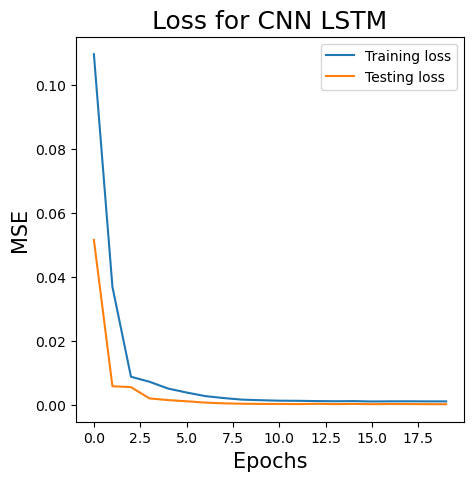

In [437]:
fig = plt.figure(figsize=(5,5))
#plotting loss using CNN LSTM model with best hyperparameter combination
#training loss
plt.plot(cnn_lstm_history.epoch, 
                 cnn_lstm_history.history['loss'], label="Training loss")

#validation loss
plt.plot(cnn_lstm_history.epoch, 
             cnn_lstm_history.history['val_loss'], label="Testing loss")

#title and label
plt.title("Loss for CNN LSTM", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
#plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [135]:
#predicting for train data using CNN LSTM
trainPredictions_cnn= predict(cnn_lstm_model,trainX)
#predicting for test data using CNN LSTM
testPredictions_cnn = predict(cnn_lstm_model,testX)

In [136]:
# invert train predictions(de-normalizing data) of CNN LSTM
trainPredict_cnn = inverse_transform(dataset,trainPredictions_cnn)
#denormalizing train data
trainY = inverse_transform(dataset,[trainY])
#denormalizing test predictions of CNN LSTM
testPredict_cnn = inverse_transform(dataset,testPredictions_cnn)
#denormalizing test data
testY = inverse_transform(dataset,[testY])

In [137]:
# calculate root mean squared error for train and test for CNN LSTM
trainScore_cnn = rmse(trainY,trainPredict_cnn)
print('Train Score : %.2f RMSE for CNN LSTM' % (trainScore_cnn))
testScore_cnn = rmse(testY,testPredict_cnn)
print('Test Score: %.2f RMSE for CNN LSTM' % (testScore_cnn))

Train Score : 2.86 RMSE for CNN LSTM
Test Score: 1.85 RMSE for CNN LSTM


In [138]:
#number of days in future
time_preds=100
#future predictions of 100 days using CNN LSTM model
futurePreds_cnn = future_preds(dates,dataset,cnn_lstm_model,testX,time_preds)

In [139]:
time=1
#converting the train predictions and dates as index to data frame of CNN LSTM
PREDICTION_TRAIN_CNN = pd.DataFrame(trainPredict_cnn, columns=['Open']).set_index(pd.Series(dates[time:len(trainPredict_cnn)+time]))
#converting the test predictions and dates as index to data frame of CNN LSTM
PREDICTION_TEST_CNN = pd.DataFrame(testPredict_cnn, columns=['Open']).set_index(pd.Series(dates[len(trainPredict_cnn)+(time*2)+1:len(dataset)-1:]))


In [140]:
#forecasting error for train predictions for CNN LSTM
train_band_size= train_confidence(trainPredict_cnn,df)
#forecasting error for test predictions for CNN LSTM
test_band_size = test_confidence(trainPredict_cnn, testPredict_cnn,df)

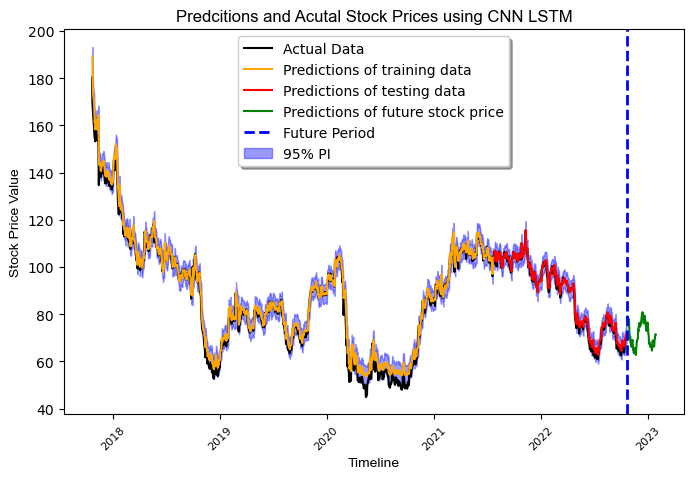

In [451]:

fig = plt.figure(figsize=(8,5))
#plotting actual data
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
#plotting train prediction of CNN LSTM
plt.plot(PREDICTION_TRAIN_CNN.index,PREDICTION_TRAIN_CNN['Open'],color='orange',label="Predictions of training data")
#plotting test prediction of CNN LSTM
plt.plot(PREDICTION_TEST_CNN.index,PREDICTION_TEST_CNN['Open'],color='red',label="Predictions of testing data")
#plotting future prediction of CNN LSTM
plt.plot(futurePreds_cnn.index,futurePreds_cnn['Open'],color='green',label="Predictions of future stock price")
#vertical line when future period starts
plt.axvline(x = min(futurePreds_cnn.index), color='blue', linewidth=2, linestyle='--',label="Future Period")
#95% Prediction interval for train predictions of CNN LSTM
plt.fill_between(PREDICTION_TRAIN_CNN.index, (PREDICTION_TRAIN_CNN['Open']-train_band_size), (PREDICTION_TRAIN_CNN['Open']+train_band_size), color='blue', alpha=.4)
#95% prediction interval for test predictions of CNN LSTM
plt.fill_between(PREDICTION_TEST_CNN.index, (PREDICTION_TEST_CNN['Open']-test_band_size), (PREDICTION_TEST_CNN['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#legends
plt.legend(shadow=True)
#tite and labels
plt.title('Predcitions and Acutal Stock Prices using CNN LSTM', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

### Multivariate LSTM Analysis

In [189]:
#train data function for multivariate model
def multi_train_data(train,df_for_training):
    #creating trainX and trainY data for model training
    time_stemp = 1
    dataX = []
    dataY = []
    for i in range(len(train)-time_stemp-1):
        #givng data of all features present in dataset
        a = train[i:(i+time_stemp), 0:df_for_training.shape[1]]
        dataX.append(a)
        dataY.append(train[i + time_stemp, 0])
    #making trainX and trainY as numpy array for model training
    trainX = numpy.array(dataX)
    trainY = numpy.array(dataY)
    return trainX,trainY
    

In [190]:
#test data function for multivariate model
def multi_test_data(test,df_for_training):
    #Creating testX and testY for model testing
    time_stemp = 1
    dataX = []
    dataY = []
    #appending 1 day data for model test prediction
    for i in range(len(test)-time_stemp-1):
        a = test[i:(i+time_stemp), 0:df_for_training.shape[1]]
        dataX.append(a)
        dataY.append(test[i + time_stemp, 0])
    #making testX and testY as numpy array for model testing
    testX = numpy.array(dataX)
    testY = numpy.array(dataY)
    return testX,testY

In [191]:
#listing 1,2,3,4,5,6 columns of data sets 
cols= list(data)[1:6]
#converting those data in cols to float datatype
data_multi = data[cols].astype(float)
#scaling (normalizing ) data using Min-max scaler
scaled_multi= data_transform(data_multi)
#getting train and test datasets
train_multi,test_multi = split_data(scaled_multi)
#retreving trainX and trainY datasets for multivariate analysis
train_X,train_Y = multi_train_data(train_multi,scaled_multi)
#retreving testX and testY datasets for multivariate analysis
test_X,test_Y = multi_test_data(test_multi,scaled_multi)


train size: 944, test size: 315 


In [194]:
#initial hyperparameters for Multivariate LSTM with stacked layers
#list[stacked_lstm, bidirectional_lstm, CNN LSTM, Single LSTM, neurons, batch size, dropout, optimizer, epochs]

config_multi = [True, False, False,False, 64, 32, 0.2,'adam',50] 
# ------------------Multivariate LSTM-----------------------

multi_lstm_model,multi_lstm_history = lstm_model(train_X,train_Y,test_X,test_Y,config_multi)


Epoch 00001: val_loss improved from inf to 0.01014, saving model to weight.h5

Epoch 00002: val_loss improved from 0.01014 to 0.00436, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00436 to 0.00104, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00104 to 0.00071, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00071 to 0.00056, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00056 to 0.00034, saving model to weight.h5

Epoch 00007: val_loss did not improve from 0.00034

Epoch 00008: val_loss improved from 0.00034 to 0.00018, saving model to weight.h5

Epoch 00009: val_loss did not improve from 0.00018

Epoch 00010: val_loss did not improve from 0.00018

Epoch 00011: val_loss did not improve from 0.00018

Epoch 00012: val_loss improved from 0.00018 to 0.00016, saving model to weight.h5

Epoch 00013: val_loss did not improve from 0.00016

Epoch 00014: val_loss improved from 0.00016 to 0.00014, saving model to weight.

In [195]:
#results of multivariate model with initial hyperparameters
multi_results=multi_lstm_model.evaluate(test_X,test_Y)
#priniting results by rounding it to 6 digits
print("test loss,test acc :", numpy.round(multi_results,6))

10/10 [==============================] - 0s 7ms/step - loss: 1.2885e-04
test loss,test acc : 0.000129


In [196]:
#tuning hyperparameters for multivariate LSTM using stacked layers
#list[stacked_lstm, bidirectional_lstm, CNN LSTM, Single LSTM, neurons, batch size, dropout, optimizer, epochs]

config = [[True], [False], [False],[False], [16, 32, 64], 
             [32, 64, 128], [0.2],['adam','adamax','SGD','RMSprop'],[20,50,100]]  

#building the mulivariate model for each hyperparameter combinations and storing the results in a list
hist = LSTM_HyperParameter_Tuning(config, train_X, train_Y, test_X, test_Y) 

[(True, False, False, False, 16, 32, 0.2, 'adam', 20), (True, False, False, False, 16, 32, 0.2, 'adam', 50), (True, False, False, False, 16, 32, 0.2, 'adam', 100), (True, False, False, False, 16, 32, 0.2, 'adamax', 20), (True, False, False, False, 16, 32, 0.2, 'adamax', 50), (True, False, False, False, 16, 32, 0.2, 'adamax', 100), (True, False, False, False, 16, 32, 0.2, 'SGD', 20), (True, False, False, False, 16, 32, 0.2, 'SGD', 50), (True, False, False, False, 16, 32, 0.2, 'SGD', 100), (True, False, False, False, 16, 32, 0.2, 'RMSprop', 20), (True, False, False, False, 16, 32, 0.2, 'RMSprop', 50), (True, False, False, False, 16, 32, 0.2, 'RMSprop', 100), (True, False, False, False, 16, 64, 0.2, 'adam', 20), (True, False, False, False, 16, 64, 0.2, 'adam', 50), (True, False, False, False, 16, 64, 0.2, 'adam', 100), (True, False, False, False, 16, 64, 0.2, 'adamax', 20), (True, False, False, False, 16, 64, 0.2, 'adamax', 50), (True, False, False, False, 16, 64, 0.2, 'adamax', 100), (Tr


Epoch 00004: val_loss improved from 0.00769 to 0.00446, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00446 to 0.00231, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00231 to 0.00165, saving model to weight.h5

Epoch 00007: val_loss did not improve from 0.00165

Epoch 00008: val_loss improved from 0.00165 to 0.00106, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00106 to 0.00077, saving model to weight.h5

Epoch 00010: val_loss did not improve from 0.00077

Epoch 00011: val_loss improved from 0.00077 to 0.00059, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.00059

Epoch 00013: val_loss improved from 0.00059 to 0.00031, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00031

Epoch 00015: val_loss did not improve from 0.00031

Epoch 00016: val_loss improved from 0.00031 to 0.00027, saving model to weight.h5

Epoch 00017: val_loss did not improve from 0.00027

Epoch 00018: val_loss d


Epoch 00023: val_loss did not improve from 0.00058
Epoch 00023: early stopping
4-th combination = (True, False, False, False, 16, 32, 0.2, 'adamax', 50) 
 train accuracy: 0.0018553786212578416 and test accuracy: 0.000869737530592829
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
6th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.07745, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07745 to 0.04540, saving model to weight.h5

Epoch 00003: val_loss improved from 0.04540 to 0.02232, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02232 to 0.01123, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01123 to 0.00910, saving model to w


Epoch 00017: val_loss did not improve from 0.01208

Epoch 00018: val_loss did not improve from 0.01208
Epoch 00018: early stopping
8-th combination = (True, False, False, False, 16, 32, 0.2, 'SGD', 100) 
 train accuracy: 0.033185772597789764 and test accuracy: 0.012080525048077106
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
10th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.04725, saving model to weight.h5

Epoch 00002: val_loss improved from 0.04725 to 0.00964, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00964 to 0.00563, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00563 to 0.00283, saving model to weight.h5

Epoch 00005: val_loss i


Epoch 00001: val_loss improved from inf to 0.09106, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09106 to 0.06373, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06373 to 0.03551, saving model to weight.h5

Epoch 00004: val_loss improved from 0.03551 to 0.01217, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01217 to 0.00915, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00915 to 0.00648, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00648 to 0.00503, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00503 to 0.00363, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00363 to 0.00237, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00237 to 0.00169, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00169 to 0.00121, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00121 to 0.00108, saving model to weight.h5

Epoch 0

14-th combination = (True, False, False, False, 16, 64, 0.2, 'adam', 100) 
 train accuracy: 0.0006460256990976632 and test accuracy: 0.0001738171122269705
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
16th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.09417, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09417 to 0.07335, saving model to weight.h5

Epoch 00003: val_loss improved from 0.07335 to 0.05436, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05436 to 0.03754, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03754 to 0.02378, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02378 to 0.01410, saving model


Epoch 00031: val_loss improved from 0.00097 to 0.00083, saving model to weight.h5

Epoch 00032: val_loss did not improve from 0.00083

Epoch 00033: val_loss improved from 0.00083 to 0.00064, saving model to weight.h5

Epoch 00034: val_loss did not improve from 0.00064

Epoch 00035: val_loss improved from 0.00064 to 0.00053, saving model to weight.h5

Epoch 00036: val_loss did not improve from 0.00053

Epoch 00037: val_loss did not improve from 0.00053

Epoch 00038: val_loss did not improve from 0.00053

Epoch 00039: val_loss did not improve from 0.00053

Epoch 00040: val_loss did not improve from 0.00053
Epoch 00040: early stopping
17-th combination = (True, False, False, False, 16, 64, 0.2, 'adamax', 100) 
 train accuracy: 0.0015940602170303464 and test accuracy: 0.000732436659745872
--------------------------------------------------------------------
--------------------------------------------------------------------
-----------------------------------------------------------------


Epoch 00009: val_loss improved from 0.01256 to 0.01234, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01234 to 0.01222, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01222 to 0.01215, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01215 to 0.01212, saving model to weight.h5

Epoch 00013: val_loss improved from 0.01212 to 0.01209, saving model to weight.h5

Epoch 00014: val_loss improved from 0.01209 to 0.01209, saving model to weight.h5

Epoch 00015: val_loss improved from 0.01209 to 0.01209, saving model to weight.h5

Epoch 00016: val_loss improved from 0.01209 to 0.01208, saving model to weight.h5

Epoch 00017: val_loss improved from 0.01208 to 0.01207, saving model to weight.h5

Epoch 00018: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00019: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00020: val_loss did not improve from 0.01207

Epoch 00021: val_loss did not impr


Epoch 00021: val_loss improved from 0.00062 to 0.00051, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00051 to 0.00044, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00044 to 0.00033, saving model to weight.h5

Epoch 00024: val_loss did not improve from 0.00033

Epoch 00025: val_loss did not improve from 0.00033

Epoch 00026: val_loss improved from 0.00033 to 0.00030, saving model to weight.h5

Epoch 00027: val_loss did not improve from 0.00030

Epoch 00028: val_loss improved from 0.00030 to 0.00027, saving model to weight.h5

Epoch 00029: val_loss did not improve from 0.00027

Epoch 00030: val_loss did not improve from 0.00027

Epoch 00031: val_loss did not improve from 0.00027

Epoch 00032: val_loss did not improve from 0.00027

Epoch 00033: val_loss improved from 0.00027 to 0.00025, saving model to weight.h5

Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00034: val_loss improved from 0.00025 to 0.00024, 

25-th combination = (True, False, False, False, 16, 128, 0.2, 'adam', 50) 
 train accuracy: 0.0006454940303228796 and test accuracy: 0.00018649318371899426
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
27th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.10396, saving model to weight.h5

Epoch 00002: val_loss improved from 0.10396 to 0.09024, saving model to weight.h5

Epoch 00003: val_loss improved from 0.09024 to 0.07638, saving model to weight.h5

Epoch 00004: val_loss improved from 0.07638 to 0.06211, saving model to weight.h5

Epoch 00005: val_loss improved from 0.06211 to 0.04766, saving model to weight.h5

Epoch 00006: val_loss improved from 0.04766 to 0.03333, saving mode


Epoch 00018: val_loss improved from 0.00923 to 0.00895, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00895 to 0.00862, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00862 to 0.00827, saving model to weight.h5
27-th combination = (True, False, False, False, 16, 128, 0.2, 'adamax', 20) 
 train accuracy: 0.022560007870197296 and test accuracy: 0.00826655700802803
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
29th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.10662, saving model to weight.h5

Epoch 00002: val_loss improved from 0.10662 to 0.09648, saving model to weight.h5

Epoch 00003: val_loss improved from 0.09648 to 0.08658, saving model 


Epoch 00037: val_loss improved from 0.00267 to 0.00235, saving model to weight.h5

Epoch 00038: val_loss improved from 0.00235 to 0.00216, saving model to weight.h5

Epoch 00039: val_loss improved from 0.00216 to 0.00207, saving model to weight.h5

Epoch 00040: val_loss improved from 0.00207 to 0.00184, saving model to weight.h5

Epoch 00041: val_loss improved from 0.00184 to 0.00161, saving model to weight.h5

Epoch 00042: val_loss improved from 0.00161 to 0.00143, saving model to weight.h5

Epoch 00043: val_loss improved from 0.00143 to 0.00126, saving model to weight.h5

Epoch 00044: val_loss improved from 0.00126 to 0.00119, saving model to weight.h5

Epoch 00045: val_loss did not improve from 0.00119

Epoch 00046: val_loss did not improve from 0.00119

Epoch 00047: val_loss did not improve from 0.00119

Epoch 00048: val_loss improved from 0.00119 to 0.00109, saving model to weight.h5

Epoch 00049: val_loss improved from 0.00109 to 0.00109, saving model to weight.h5

Epoch 00050: 


Epoch 00001: val_loss improved from inf to 0.08595, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08595 to 0.06355, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06355 to 0.04791, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04791 to 0.03687, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03687 to 0.02941, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02941 to 0.02426, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02426 to 0.02054, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02054 to 0.01800, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01800 to 0.01625, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01625 to 0.01503, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01503 to 0.01419, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01419 to 0.01354, saving model to weight.h5

Epoch 0


Epoch 00001: val_loss improved from inf to 0.09275, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09275 to 0.07553, saving model to weight.h5

Epoch 00003: val_loss improved from 0.07553 to 0.05910, saving model to weight.h5

Epoch 00004: val_loss improved from 0.05910 to 0.04294, saving model to weight.h5

Epoch 00005: val_loss improved from 0.04294 to 0.02860, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02860 to 0.01679, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01679 to 0.01006, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01006 to 0.00777, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00777 to 0.00682, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00682 to 0.00590, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00590 to 0.00506, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00506 to 0.00391, saving model to weight.h5

Epoch 0


Epoch 00016: val_loss did not improve from 0.00017

Epoch 00017: val_loss did not improve from 0.00017

Epoch 00018: val_loss improved from 0.00017 to 0.00014, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00014 to 0.00013, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00013 to 0.00013, saving model to weight.h5

Epoch 00021: val_loss did not improve from 0.00013

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00022: val_loss did not improve from 0.00013

Epoch 00023: val_loss improved from 0.00013 to 0.00013, saving model to weight.h5

Epoch 00024: val_loss did not improve from 0.00013

Epoch 00025: val_loss did not improve from 0.00013

Epoch 00026: val_loss did not improve from 0.00013

Epoch 00027: val_loss did not improve from 0.00013

Epoch 00028: val_loss did not improve from 0.00013
Epoch 00028: early stopping
38-th combination = (True, False, False, False, 32, 32, 0.2, 'adam', 100) 
 train accuracy:


Epoch 00020: val_loss improved from 0.00055 to 0.00051, saving model to weight.h5

Epoch 00021: val_loss improved from 0.00051 to 0.00040, saving model to weight.h5

Epoch 00022: val_loss did not improve from 0.00040

Epoch 00023: val_loss did not improve from 0.00040

Epoch 00024: val_loss improved from 0.00040 to 0.00027, saving model to weight.h5

Epoch 00025: val_loss improved from 0.00027 to 0.00025, saving model to weight.h5

Epoch 00026: val_loss did not improve from 0.00025

Epoch 00027: val_loss did not improve from 0.00025

Epoch 00028: val_loss did not improve from 0.00025

Epoch 00029: val_loss did not improve from 0.00025

Epoch 00030: val_loss improved from 0.00025 to 0.00023, saving model to weight.h5

Epoch 00031: val_loss did not improve from 0.00023

Epoch 00032: val_loss improved from 0.00023 to 0.00021, saving model to weight.h5

Epoch 00033: val_loss improved from 0.00021 to 0.00019, saving model to weight.h5

Epoch 00034: val_loss did not improve from 0.00019

Ep


Epoch 00006: val_loss improved from 0.00058 to 0.00047, saving model to weight.h5

Epoch 00007: val_loss did not improve from 0.00047

Epoch 00008: val_loss improved from 0.00047 to 0.00043, saving model to weight.h5

Epoch 00009: val_loss did not improve from 0.00043

Epoch 00010: val_loss improved from 0.00043 to 0.00038, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00038 to 0.00026, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.00026

Epoch 00013: val_loss did not improve from 0.00026

Epoch 00014: val_loss did not improve from 0.00026

Epoch 00015: val_loss improved from 0.00026 to 0.00016, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00016

Epoch 00017: val_loss did not improve from 0.00016

Epoch 00018: val_loss did not improve from 0.00016

Epoch 00019: val_loss did not improve from 0.00016

Epoch 00020: val_loss did not improve from 0.00016
Epoch 00020: early stopping
45-th combination = (True, False, Fal


Epoch 00003: val_loss improved from 0.04791 to 0.00903, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00903 to 0.00857, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00857 to 0.00478, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00478 to 0.00320, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00320 to 0.00173, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00173 to 0.00113, saving model to weight.h5

Epoch 00009: val_loss did not improve from 0.00113

Epoch 00010: val_loss improved from 0.00113 to 0.00061, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.00061

Epoch 00012: val_loss did not improve from 0.00061

Epoch 00013: val_loss did not improve from 0.00061

Epoch 00014: val_loss improved from 0.00061 to 0.00038, saving model to weight.h5

Epoch 00015: val_loss did not improve from 0.00038

Epoch 00016: val_loss improved from 0.00038 to 0.00030, saving model to wei


Epoch 00001: val_loss improved from inf to 0.09435, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09435 to 0.07178, saving model to weight.h5

Epoch 00003: val_loss improved from 0.07178 to 0.04884, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04884 to 0.02724, saving model to weight.h5

Epoch 00005: val_loss improved from 0.02724 to 0.01213, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01213 to 0.00873, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00873 to 0.00838, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00838 to 0.00694, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00694 to 0.00607, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00607 to 0.00521, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00521 to 0.00414, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00414 to 0.00333, saving model to weight.h5

Epoch 0


Epoch 00001: val_loss improved from inf to 0.06579, saving model to weight.h5

Epoch 00002: val_loss improved from 0.06579 to 0.03935, saving model to weight.h5

Epoch 00003: val_loss improved from 0.03935 to 0.02597, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02597 to 0.01918, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01918 to 0.01568, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01568 to 0.01392, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01392 to 0.01306, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01306 to 0.01263, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01263 to 0.01238, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01238 to 0.01223, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01223 to 0.01217, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01217 to 0.01213, saving model to weight.h5

Epoch 0


Epoch 00007: val_loss improved from 0.00125 to 0.00088, saving model to weight.h5

Epoch 00008: val_loss did not improve from 0.00088

Epoch 00009: val_loss improved from 0.00088 to 0.00052, saving model to weight.h5

Epoch 00010: val_loss did not improve from 0.00052

Epoch 00011: val_loss did not improve from 0.00052

Epoch 00012: val_loss did not improve from 0.00052

Epoch 00013: val_loss did not improve from 0.00052

Epoch 00014: val_loss did not improve from 0.00052
Epoch 00014: early stopping
58-th combination = (True, False, False, False, 32, 64, 0.2, 'RMSprop', 50) 
 train accuracy: 0.0012318100780248642 and test accuracy: 0.0006490446394309402
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
60th combination: 

-----------------------------------------


Epoch 00027: val_loss improved from 0.00035 to 0.00028, saving model to weight.h5

Epoch 00028: val_loss improved from 0.00028 to 0.00028, saving model to weight.h5

Epoch 00029: val_loss improved from 0.00028 to 0.00022, saving model to weight.h5

Epoch 00030: val_loss improved from 0.00022 to 0.00019, saving model to weight.h5

Epoch 00031: val_loss improved from 0.00019 to 0.00018, saving model to weight.h5

Epoch 00032: val_loss improved from 0.00018 to 0.00018, saving model to weight.h5

Epoch 00033: val_loss did not improve from 0.00018

Epoch 00034: val_loss did not improve from 0.00018

Epoch 00035: val_loss improved from 0.00018 to 0.00018, saving model to weight.h5

Epoch 00036: val_loss improved from 0.00018 to 0.00016, saving model to weight.h5

Epoch 00037: val_loss improved from 0.00016 to 0.00015, saving model to weight.h5

Epoch 00038: val_loss did not improve from 0.00015

Epoch 00039: val_loss improved from 0.00015 to 0.00015, saving model to weight.h5

Epoch 00040: 


Epoch 00019: val_loss improved from 0.00459 to 0.00400, saving model to weight.h5

Epoch 00020: val_loss improved from 0.00400 to 0.00339, saving model to weight.h5
63-th combination = (True, False, False, False, 32, 128, 0.2, 'adamax', 20) 
 train accuracy: 0.008544807322323322 and test accuracy: 0.003390942933037877
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
65th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.10244, saving model to weight.h5

Epoch 00002: val_loss improved from 0.10244 to 0.08808, saving model to weight.h5

Epoch 00003: val_loss improved from 0.08808 to 0.07382, saving model to weight.h5

Epoch 00004: val_loss improved from 0.07382 to 0.05974, saving model


Epoch 00001: val_loss improved from inf to 0.08603, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08603 to 0.06386, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06386 to 0.04815, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04815 to 0.03711, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03711 to 0.02977, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02977 to 0.02456, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02456 to 0.02094, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02094 to 0.01838, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01838 to 0.01657, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01657 to 0.01527, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01527 to 0.01431, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01431 to 0.01359, saving model to weight.h5

Epoch 0


Epoch 00019: val_loss improved from 0.01232 to 0.01224, saving model to weight.h5

Epoch 00020: val_loss improved from 0.01224 to 0.01220, saving model to weight.h5

Epoch 00021: val_loss improved from 0.01220 to 0.01216, saving model to weight.h5

Epoch 00022: val_loss improved from 0.01216 to 0.01214, saving model to weight.h5

Epoch 00023: val_loss improved from 0.01214 to 0.01213, saving model to weight.h5

Epoch 00024: val_loss improved from 0.01213 to 0.01211, saving model to weight.h5

Epoch 00025: val_loss did not improve from 0.01211

Epoch 00026: val_loss improved from 0.01211 to 0.01211, saving model to weight.h5

Epoch 00027: val_loss improved from 0.01211 to 0.01210, saving model to weight.h5

Epoch 00028: val_loss did not improve from 0.01210

Epoch 00029: val_loss improved from 0.01210 to 0.01210, saving model to weight.h5

Epoch 00030: val_loss improved from 0.01210 to 0.01210, saving model to weight.h5

Epoch 00031: val_loss improved from 0.01210 to 0.01210, saving mo


Epoch 00011: val_loss improved from 0.00019 to 0.00018, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00018 to 0.00014, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00014 to 0.00013, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00013

Epoch 00015: val_loss did not improve from 0.00013

Epoch 00016: val_loss did not improve from 0.00013

Epoch 00017: val_loss did not improve from 0.00013

Epoch 00018: val_loss did not improve from 0.00013

Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 00018: early stopping
72-th combination = (True, False, False, False, 64, 32, 0.2, 'adam', 20) 
 train accuracy: 0.000270924560027197 and test accuracy: 0.0001914174936246127
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
----------------------


Epoch 00015: val_loss improved from 0.00038 to 0.00034, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00034 to 0.00030, saving model to weight.h5

Epoch 00017: val_loss did not improve from 0.00030

Epoch 00018: val_loss did not improve from 0.00030

Epoch 00019: val_loss improved from 0.00030 to 0.00027, saving model to weight.h5

Epoch 00020: val_loss did not improve from 0.00027

Epoch 00021: val_loss improved from 0.00027 to 0.00023, saving model to weight.h5

Epoch 00022: val_loss improved from 0.00023 to 0.00021, saving model to weight.h5

Epoch 00023: val_loss improved from 0.00021 to 0.00020, saving model to weight.h5

Epoch 00024: val_loss did not improve from 0.00020

Epoch 00025: val_loss improved from 0.00020 to 0.00019, saving model to weight.h5

Epoch 00026: val_loss did not improve from 0.00019

Epoch 00027: val_loss did not improve from 0.00019

Epoch 00028: val_loss improved from 0.00019 to 0.00018, saving model to weight.h5

Epoch 00029: val_loss d


Epoch 00001: val_loss improved from inf to 0.03920, saving model to weight.h5

Epoch 00002: val_loss improved from 0.03920 to 0.01944, saving model to weight.h5

Epoch 00003: val_loss improved from 0.01944 to 0.01400, saving model to weight.h5

Epoch 00004: val_loss improved from 0.01400 to 0.01262, saving model to weight.h5

Epoch 00005: val_loss improved from 0.01262 to 0.01226, saving model to weight.h5

Epoch 00006: val_loss improved from 0.01226 to 0.01211, saving model to weight.h5

Epoch 00007: val_loss improved from 0.01211 to 0.01208, saving model to weight.h5

Epoch 00008: val_loss improved from 0.01208 to 0.01207, saving model to weight.h5

Epoch 00009: val_loss did not improve from 0.01207

Epoch 00010: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00011: val_loss did not improve from 0.01207

Epoch 00012: val_loss did not improve from 0.01207

Epoch 00013: val_loss improved from 0.01207 to 0.01207, saving model to weight.h5

Epoch 00014: val_


Epoch 00001: val_loss improved from inf to 0.07347, saving model to weight.h5

Epoch 00002: val_loss improved from 0.07347 to 0.01164, saving model to weight.h5

Epoch 00003: val_loss improved from 0.01164 to 0.00740, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00740 to 0.00455, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00455 to 0.00265, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00265 to 0.00090, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00090 to 0.00075, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00075 to 0.00034, saving model to weight.h5

Epoch 00009: val_loss did not improve from 0.00034

Epoch 00010: val_loss did not improve from 0.00034

Epoch 00011: val_loss did not improve from 0.00034

Epoch 00012: val_loss improved from 0.00034 to 0.00021, saving model to weight.h5

Epoch 00013: val_loss did not improve from 0.00021

Epoch 00014: val_loss did not improve from 0.000


Epoch 00012: val_loss did not improve from 0.00070

Epoch 00013: val_loss improved from 0.00070 to 0.00048, saving model to weight.h5

Epoch 00014: val_loss did not improve from 0.00048

Epoch 00015: val_loss improved from 0.00048 to 0.00047, saving model to weight.h5

Epoch 00016: val_loss did not improve from 0.00047

Epoch 00017: val_loss improved from 0.00047 to 0.00040, saving model to weight.h5

Epoch 00018: val_loss did not improve from 0.00040

Epoch 00019: val_loss did not improve from 0.00040

Epoch 00020: val_loss improved from 0.00040 to 0.00039, saving model to weight.h5
87-th combination = (True, False, False, False, 64, 64, 0.2, 'adamax', 20) 
 train accuracy: 0.0009044057223945856 and test accuracy: 0.00038754005800001323
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------


Epoch 00042: val_loss improved from 0.00019 to 0.00018, saving model to weight.h5

Epoch 00043: val_loss did not improve from 0.00018

Epoch 00044: val_loss did not improve from 0.00018

Epoch 00045: val_loss did not improve from 0.00018

Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00046: val_loss improved from 0.00018 to 0.00017, saving model to weight.h5

Epoch 00047: val_loss improved from 0.00017 to 0.00017, saving model to weight.h5

Epoch 00048: val_loss did not improve from 0.00017

Epoch 00049: val_loss did not improve from 0.00017

Epoch 00050: val_loss did not improve from 0.00017

Epoch 00051: val_loss did not improve from 0.00017

Epoch 00052: val_loss did not improve from 0.00017
Epoch 00052: early stopping
89-th combination = (True, False, False, False, 64, 64, 0.2, 'adamax', 100) 
 train accuracy: 0.00038710786611773074 and test accuracy: 0.00017713643319439143
-------------------------------------------------------------------


Epoch 00001: val_loss improved from inf to 0.01110, saving model to weight.h5

Epoch 00002: val_loss improved from 0.01110 to 0.00288, saving model to weight.h5

Epoch 00003: val_loss improved from 0.00288 to 0.00096, saving model to weight.h5

Epoch 00004: val_loss improved from 0.00096 to 0.00072, saving model to weight.h5

Epoch 00005: val_loss improved from 0.00072 to 0.00069, saving model to weight.h5

Epoch 00006: val_loss improved from 0.00069 to 0.00043, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00043 to 0.00036, saving model to weight.h5

Epoch 00008: val_loss did not improve from 0.00036

Epoch 00009: val_loss did not improve from 0.00036

Epoch 00010: val_loss did not improve from 0.00036

Epoch 00011: val_loss did not improve from 0.00036

Epoch 00012: val_loss improved from 0.00036 to 0.00024, saving model to weight.h5

Epoch 00013: val_loss did not improve from 0.00024

Epoch 00014: val_loss did not improve from 0.00024

Epoch 00015: val_loss did n


Epoch 00001: val_loss improved from inf to 0.09602, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09602 to 0.06907, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06907 to 0.03466, saving model to weight.h5

Epoch 00004: val_loss improved from 0.03466 to 0.00712, saving model to weight.h5

Epoch 00005: val_loss did not improve from 0.00712

Epoch 00006: val_loss improved from 0.00712 to 0.00587, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00587 to 0.00477, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00477 to 0.00408, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00408 to 0.00237, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00237 to 0.00141, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00141 to 0.00082, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.00082

Epoch 00013: val_loss improved from 0.00082 to 0.00054, saving model 


Epoch 00009: val_loss improved from 0.00730 to 0.00604, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00604 to 0.00535, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00535 to 0.00486, saving model to weight.h5

Epoch 00012: val_loss improved from 0.00486 to 0.00398, saving model to weight.h5

Epoch 00013: val_loss improved from 0.00398 to 0.00311, saving model to weight.h5

Epoch 00014: val_loss improved from 0.00311 to 0.00251, saving model to weight.h5

Epoch 00015: val_loss improved from 0.00251 to 0.00189, saving model to weight.h5

Epoch 00016: val_loss improved from 0.00189 to 0.00147, saving model to weight.h5

Epoch 00017: val_loss improved from 0.00147 to 0.00118, saving model to weight.h5

Epoch 00018: val_loss improved from 0.00118 to 0.00094, saving model to weight.h5

Epoch 00019: val_loss improved from 0.00094 to 0.00079, saving model to weight.h5

Epoch 00020: val_loss did not improve from 0.00079
99-th combination = (True, False, F


Epoch 00037: val_loss improved from 0.00040 to 0.00039, saving model to weight.h5

Epoch 00038: val_loss did not improve from 0.00039

Epoch 00039: val_loss did not improve from 0.00039

Epoch 00040: val_loss did not improve from 0.00039

Epoch 00041: val_loss improved from 0.00039 to 0.00034, saving model to weight.h5

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00042: val_loss improved from 0.00034 to 0.00033, saving model to weight.h5

Epoch 00043: val_loss did not improve from 0.00033

Epoch 00044: val_loss did not improve from 0.00033

Epoch 00045: val_loss did not improve from 0.00033

Epoch 00046: val_loss improved from 0.00033 to 0.00032, saving model to weight.h5

Epoch 00047: val_loss did not improve from 0.00032

Epoch 00048: val_loss improved from 0.00032 to 0.00031, saving model to weight.h5

Epoch 00049: val_loss did not improve from 0.00031

Epoch 00050: val_loss improved from 0.00031 to 0.00030, saving model to weight.h5

Epoc


Epoch 00001: val_loss improved from inf to 0.08555, saving model to weight.h5

Epoch 00002: val_loss improved from 0.08555 to 0.06337, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06337 to 0.04800, saving model to weight.h5

Epoch 00004: val_loss improved from 0.04800 to 0.03703, saving model to weight.h5

Epoch 00005: val_loss improved from 0.03703 to 0.02938, saving model to weight.h5

Epoch 00006: val_loss improved from 0.02938 to 0.02433, saving model to weight.h5

Epoch 00007: val_loss improved from 0.02433 to 0.02061, saving model to weight.h5

Epoch 00008: val_loss improved from 0.02061 to 0.01805, saving model to weight.h5

Epoch 00009: val_loss improved from 0.01805 to 0.01631, saving model to weight.h5

Epoch 00010: val_loss improved from 0.01631 to 0.01498, saving model to weight.h5

Epoch 00011: val_loss improved from 0.01498 to 0.01407, saving model to weight.h5

Epoch 00012: val_loss improved from 0.01407 to 0.01351, saving model to weight.h5

Epoch 0


Epoch 00016: val_loss did not improve from 0.00035

Epoch 00017: val_loss improved from 0.00035 to 0.00030, saving model to weight.h5

Epoch 00018: val_loss did not improve from 0.00030

Epoch 00019: val_loss did not improve from 0.00030

Epoch 00020: val_loss did not improve from 0.00030

Epoch 00021: val_loss did not improve from 0.00030

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00022: val_loss improved from 0.00030 to 0.00029, saving model to weight.h5

Epoch 00023: val_loss did not improve from 0.00029

Epoch 00024: val_loss improved from 0.00029 to 0.00025, saving model to weight.h5

Epoch 00025: val_loss did not improve from 0.00025

Epoch 00026: val_loss did not improve from 0.00025

Epoch 00027: val_loss did not improve from 0.00025

Epoch 00028: val_loss did not improve from 0.00025

Epoch 00029: val_loss did not improve from 0.00025
Epoch 00029: early stopping
107-th combination = (True, False, False, False, 64, 128, 0.2, 'RMSpro

In [198]:
#converting the multivariate models results list to data frame
hist5 = pd.DataFrame(hist)
#sorting them based on Test MSE in ascending order
hist5=hist5.sort_values(by=[10],ascending=True)
hist5

0      1      2      3   4    5    6       7    8         9         10
74   True  False  False  False  64   32  0.2    adam  100  0.000313  0.000131
50   True  False  False  False  32   64  0.2    adam  100  0.000349  0.000132
98   True  False  False  False  64  128  0.2    adam  100  0.000344  0.000132
86   True  False  False  False  64   64  0.2    adam  100  0.000250  0.000137
76   True  False  False  False  64   32  0.2  adamax   50  0.000255  0.000140
..    ...    ...    ...    ...  ..  ...  ...     ...  ...       ...       ...
42   True  False  False  False  32   32  0.2     SGD   20  0.033226  0.012091
68   True  False  False  False  32  128  0.2     SGD  100  0.033233  0.012097
30   True  False  False  False  16  128  0.2     SGD   20  0.033237  0.012165
102  True  False  False  False  64  128  0.2     SGD   20  0.033241  0.012193
66   True  False  False  False  32  128  0.2     SGD   20  0.033253  0.012219

[108 rows x 11 columns]

In [199]:
# getting neurons, batch size, drop out , optimizer and epochs for first five rows of hyperparameter combinations for multivariate lSTM
params_multi= [[hist5.iloc[0,4],hist5.iloc[0,5],hist5.iloc[0,6],hist5.iloc[0,7],hist5.iloc[0,8]],
         [hist5.iloc[1,4],hist5.iloc[1,5],hist5.iloc[1,6],hist5.iloc[1,7],hist5.iloc[1,8]],
         [hist5.iloc[2,4],hist5.iloc[2,5],hist5.iloc[2,6],hist5.iloc[2,7],hist5.iloc[2,8]],
         [hist5.iloc[3,4],hist5.iloc[3,5],hist5.iloc[3,6],hist5.iloc[3,7],hist5.iloc[3,8]],
         [hist5.iloc[4,4],hist5.iloc[4,5],hist5.iloc[4,6],hist5.iloc[4,7],hist5.iloc[4,8]]]

#MSE on test set for first 5 rows of best hyperparametrs combinations for multivariate LSTM
mse_multi=[hist5.iloc[0,10],hist5.iloc[1,10],hist5.iloc[2,10],hist5.iloc[3,10],hist5.iloc[4,10]]

In [200]:
fig = plt.figure(figsize=(10,4))
#giving 5 numbers for easy plotting of hyperparameters
x=[1,2,3,4,5]
#plotting numbers against MSE of first 5 rows for multivariate LSTM 
plt.plot(x,mse_multi)
#changing xticks to combinations of hyperparameters and rotating 
plt.xticks(x,params_multi,rotation=10)
plt.xlabel("Hyperparameter combinations")
plt.ylabel("Test MSE")
plt.title("Combination of hyper parameters against MSE for Multivariate LSTM")
plt.show()

In [201]:
#best hyperparameter combination of multivariate LSTM 
print(f'Best Combination: \n stacked_layer = {hist5.iloc[2, 0]}\n Bi directional_layer = {hist5.iloc[2, 1]}\n CNN_layer = {hist5.iloc[2, 2]}\n single_layer = {hist5.iloc[2, 3]}\n n_neurons = {hist5.iloc[2, 4]}\n n_batch_size = {hist5.iloc[2, 5]}\n dropout = {hist5.iloc[2, 6]}  \n optimizer ={hist5.iloc[2,7]} \n epochs ={hist5.iloc[2,8]}')
print('**************************')
#results of multivariate LSTM for initial hyperparameters
print(f'Results Before Tuning:\n Test Set RMSE: {numpy.round(multi_results, 6)}\n')
#results of multivariate LSTM for best hyperparameters
print(f'Results After Tuning:\n Test Set RMSE: {numpy.round(hist5.iloc[2, -1], 6)}\n')
#Improvement % of results befor and after tuning hyperparameters
print(f'{numpy.round((multi_results - hist5.iloc[2, -1])*100/numpy.round(multi_results, 6))}% Improvement')

Best Combination: 
 stacked_layer = True
 Bi directional_layer = False
 CNN_layer = False
 single_layer = False
 n_neurons = 64
 n_batch_size = 128
 dropout = 0.2  
 optimizer =adam 
 epochs =100
**************************
Results Before Tuning:
 Test Set RMSE: 0.000129

Results After Tuning:
 Test Set RMSE: 0.000132

-3.0% Improvement


In [202]:
#storing best hyperparameter combination
config5=list(hist5.iloc[2,:-2])
#building multivariate LSTM model with best combinations
multi_lstm_model,multi_lstm_history = lstm_model(train_X,train_Y,test_X,test_Y,config5)


Epoch 00001: val_loss improved from inf to 0.09416, saving model to weight.h5

Epoch 00002: val_loss improved from 0.09416 to 0.06531, saving model to weight.h5

Epoch 00003: val_loss improved from 0.06531 to 0.02945, saving model to weight.h5

Epoch 00004: val_loss improved from 0.02945 to 0.00714, saving model to weight.h5

Epoch 00005: val_loss did not improve from 0.00714

Epoch 00006: val_loss improved from 0.00714 to 0.00582, saving model to weight.h5

Epoch 00007: val_loss improved from 0.00582 to 0.00455, saving model to weight.h5

Epoch 00008: val_loss improved from 0.00455 to 0.00401, saving model to weight.h5

Epoch 00009: val_loss improved from 0.00401 to 0.00212, saving model to weight.h5

Epoch 00010: val_loss improved from 0.00212 to 0.00123, saving model to weight.h5

Epoch 00011: val_loss improved from 0.00123 to 0.00068, saving model to weight.h5

Epoch 00012: val_loss did not improve from 0.00068

Epoch 00013: val_loss improved from 0.00068 to 0.00038, saving model 

In [442]:
fig = plt.figure(figsize=(5,5))
#plotting loss for multivariate LSTM
#training loss
plt.plot(multi_lstm_history.epoch,
             multi_lstm_history.history['loss'], label="Training loss")
#validation loss
plt.plot(multi_lstm_history.epoch, 
             multi_lstm_history.history['val_loss'], label="Testing loss")
#title and labels
plt.title("Loss for Multivariate LSTM", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
#plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [204]:
#train data predictions for multivariate LSTM
trainPredictions_multi= predict(multi_lstm_model,train_X)
#test data predictions for multivariate LSTM
testPredictions_multi = predict(multi_lstm_model,test_X)

In [205]:
# repeat train predictions(de-normalizing data) of multivariate LSTM model  
prediction_copies_train = numpy.repeat(trainPredictions_multi, data_multi.shape[1], axis=-1)
# invert train predictions(de-normalizing data) of multivariate LSTM model
trainPredict_multi = inverse_transform(data_multi,prediction_copies_train)
#denormalizing train data
train_Y=inverse_transform(dataset,[train_Y])
# repeat test predictions(de-normalizing data) of multivariate LSTM model
prediction_copies_test = numpy.repeat(testPredictions_multi, data_multi.shape[1], axis=-1)
# invert test predictions(de-normalizing data) of multivariate LSTM model
testPredict_multi = inverse_transform(data_multi,prediction_copies_test)
#denormalizing test data
test_Y=inverse_transform(dataset,[test_Y])

In [210]:
# calculate train and test root mean squared error for Multivariate LSTM 
trainScore_multi = rmse(train_Y,trainPredict_multi)
print('Train Score : %.2f RMSE for Multivariate LSTM' % (trainScore_multi))
testScore_multi = rmse(test_Y,testPredict_multi)
print('Test Score: %.2f RMSE for Multivariate LSTM' % (testScore_multi))

Train Score : 2.18 RMSE for Multivariate LSTM
Test Score: 1.56 RMSE for Multivariate LSTM


In [211]:
#number of future days predictions
time_preds=100
#future predictions of 100 days using multivariate LSTM
futurePreds_multi = future_preds(dates,dataset,multi_lstm_model,test_X,time_preds)

In [220]:
time=1
#converting the train predictions and dates as index to data frame of multivariate LSTM
PREDICTION_TRAIN_MULTI = pd.DataFrame(trainPredict_multi[:,0], columns=['Open']).set_index(
                                        pd.Series(dates[time:len(trainPredict_multi)+time]))
#converting the test predictions and dates as index to data frame of multivariate LSTM
PREDICTION_TEST_MULTI = pd.DataFrame(testPredict_multi[:,0], columns=['Open']).set_index(
                                    pd.Series(dates[len(trainPredict_multi)+(time*2)+1:len(dataset)-1:]))


In [221]:
#train forecasting error for multivariate LSTM 
train_band_size= train_confidence(trainPredict_multi[:,0],df)
#test forecasting error for multivariate LSTM
test_band_size = test_confidence(trainPredict_multi[:,0],testPredict_multi[:,0],df)

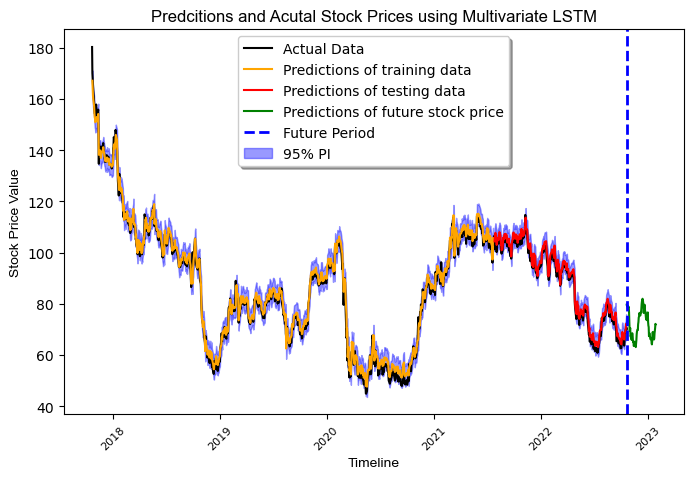

In [224]:
fig = plt.figure(figsize=(8,5))
#plotting actual data
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
#plotting train data predictions of multivariate LSTM
plt.plot(PREDICTION_TRAIN_MULTI.index,PREDICTION_TRAIN_MULTI['Open'],
                         color='orange',label="Predictions of training data")

#plotting test data predictions of multivariate LSTM
plt.plot(PREDICTION_TEST_MULTI.index,PREDICTION_TEST_MULTI['Open'],
                         color='red',label="Predictions of testing data")

#plotting future predictions of multivariate LSTM
plt.plot(futurePreds_multi.index,futurePreds_multi['Open'],
                     color='green',label="Predictions of future stock price")

#vertical line where future period starts 
plt.axvline(x = min(futurePreds_multi.index), color='blue',
                linewidth=2, linestyle='--',label="Future Period")

#95% prediction interval for train predictions
plt.fill_between(PREDICTION_TRAIN_MULTI.index, (PREDICTION_TRAIN_MULTI['Open']-train_band_size),
                         (PREDICTION_TRAIN_MULTI['Open']+train_band_size), color='blue', alpha=.4)
#95% prediction interval for test predictions
plt.fill_between(PREDICTION_TEST_MULTI.index, (PREDICTION_TEST_MULTI['Open']-test_band_size),
                     (PREDICTION_TEST_MULTI['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#legends
plt.legend(shadow=True)
#title and labels
plt.title('Predcitions and Acutal Stock Prices using Multivariate LSTM', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

### Future prediction of all models

In [424]:
# concating future predictions of all models
future=pd.concat([futurePreds, futurePreds_stacked,
                      futurePreds_bidirectional,futurePreds_cnn,futurePreds_multi],axis=1)
future

Open       Open       Open       Open       Open
2022-10-21  78.136894  78.049835  78.434647  78.491081  79.709145
2022-10-22  78.385887  78.303528  78.673508  78.732986  79.683083
2022-10-23  78.769150  78.694000  79.041344  79.105621  79.051895
2022-10-24  78.022011  77.932777  78.324471  78.379509  79.256821
2022-10-25  76.578224  76.461456  76.941376  76.980125  78.077766
...               ...        ...        ...        ...        ...
2023-01-24  68.242874  67.965195  69.013161  69.000038  68.494400
2023-01-25  68.638435  68.368233  69.387222  69.374840  69.475616
2023-01-26  69.968391  69.723595  70.646477  70.637909  70.623360
2023-01-27  70.866203  70.638702  71.497940  71.493057  72.183662
2023-01-28  70.714905  70.484482  71.354370  71.348801  71.974731

[100 rows x 5 columns]

### MAE for all Models

In [325]:
#mean absolute error(MAE) function
def mae(data,preds):
    return numpy.mean(numpy.abs(data-preds))

In [344]:
# train and test MAE for single layer LSTM
train_mae_single=mae(trainY,trainPredict[:,0])
test_mae_single=mae(testY,testPredict[:,0])

In [345]:
# train and test MAE for stacked layer LSTM
train_mae_stacked=mae(trainY,trainPredict_stacked[:,0])
test_mae_stacked=mae(testY,testPredict_stacked[:,0])

In [346]:
# train and test MAE for bidirectional LSTM
train_mae_bidirection=mae(trainY,trainPredict_bidirectional[:,0])
test_mae_bidirection=mae(testY,testPredict_bidirectional[:,0])

In [347]:
# train and test MAE for CNN LSTM
train_mae_cnn=mae(trainY,trainPredict_cnn[:,0])
test_mae_cnn=mae(testY,testPredict_cnn[:,0])

In [348]:
# train and test MAE for Multivariate LSTM
train_mae_multi=mae(trainY,trainPredict_multi[:,0])
test_mae_multi=mae(testY,testPredict_multi[:,0])

### R-squared values for all models

In [418]:
#importing R-squared library
from sklearn.metrics import r2_score
#R-squared value function
def R2(data,preds):
    return numpy.round(r2_score(data,preds),6)

# train and test R-squared for single layer LSTM
train_r2_single=R2(trainY[0,:],trainPredict[:,0])
test_r2_single=R2(testY[0,:],testPredict[:,0])

# train and test R-squared for stacked layer LSTM
train_r2_stacked=R2(trainY[0,:],trainPredict_stacked[:,0])
test_r2_stacked=R2(testY[0,:],testPredict_stacked[:,0])

# train and test R-squared for bidirectional LSTM
train_r2_bidirection=R2(trainY[0,:],trainPredict_bidirectional[:,0])
test_r2_bidirection=R2(testY[0,:],testPredict_bidirectional[:,0])

# train and test R-squared for CNN LSTM
train_r2_cnn=R2(trainY[0,:],trainPredict_cnn[:,0])
test_r2_cnn=R2(testY[0,:],testPredict_cnn[:,0])

# train and test R-squared for Multivariate LSTM
train_r2_multi=R2(trainY[0,:],trainPredict_multi[:,0])
test_r2_multi=R2(testY[0,:],testPredict_multi[:,0])

###  Evaluation Measures of all models

In [450]:
Improvement= numpy.round((
            bidirection_results - hist3.iloc[1, -1])*100/numpy.round(bidirection_results, 6))
print(Improvement, '%')

9.0 %


In [421]:
#storing RMSE, MAE and R2 values of train and test for all models
eval_measures={'Model':['Single Layer','Stacked LSTM','Bidirectional LSTM','CNN LSTM','Multivariate LSTM'],
               'Train RMSE':[trainScore,trainScore_stacked,trainScore_bidirectional,trainScore_cnn,trainScore_multi],
                'Test RMSE':[testScore,testScore_stacked,testScore_bidirectional,testScore_cnn,testScore_multi],
               'Train MAE':[train_mae_single,train_mae_stacked,train_mae_bidirection,train_mae_cnn,train_mae_multi],
               'Test MAE':[test_mae_single,test_mae_stacked,test_mae_bidirection,test_mae_cnn,test_mae_multi],
                'Train R2':[train_r2_single,train_r2_stacked,train_r2_bidirection,train_r2_cnn,train_r2_multi],
              'Test R2':[test_r2_single,test_r2_stacked,test_r2_bidirection,test_r2_cnn,test_r2_multi]}


In [446]:
#converting them to data frame
eval_measures=pd.DataFrame(eval_measures)
eval_measures

Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R2  \
0        Single Layer    2.471786   1.911679   1.745843  1.495346  0.989896   
1        Stacked LSTM    2.408156   1.870703   1.690938  1.459386  0.990409   
2  Bidirectional LSTM    2.763955   2.014696   2.011442  1.587917  0.987366   
3            CNN LSTM    2.859503   1.852426   1.997127  1.436413  0.986477   
4   Multivariate LSTM    2.184506   1.562098   1.548867  1.178798  0.992108   

    Test R2  
0  0.983384  
1  0.984089  
2  0.981545  
3  0.984398  
4  0.988905

In [405]:
fig=plt.subplots(1, 2, figsize = (20, 7))

#ax6=plt.subplot(3,2,6).set_visible(False)
ax1=plt.subplot(1,2,1)
#plotting actual data against date
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
#plotting train predictions 
plt.plot(PREDICTION_TRAIN.index,PREDICTION_TRAIN['Open'],color='orange',label="Predictions of training data")
#plotting test predictions
plt.plot(PREDICTION_TEST.index,PREDICTION_TEST['Open'],color='red',label="Predictions of testing data")
#plotting future predictions
plt.plot(futurePreds.index,futurePreds['Open'],color='green',label="Predictions of future stock price")
#to get vertical line where future predictions start 
plt.axvline(x = min(futurePreds.index), color='blue', linewidth=2, linestyle='--',label="Future Period")
#plotting 95% PI for train data
plt.fill_between(PREDICTION_TRAIN.index, (PREDICTION_TRAIN['Open']-train_band_size), (PREDICTION_TRAIN['Open']+train_band_size), color='blue', alpha=.4)
#95% PI for test data
plt.fill_between(PREDICTION_TEST.index, (PREDICTION_TEST['Open']-test_band_size), (PREDICTION_TEST['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#plotting legends
plt.legend(shadow=True)
#title
plt.title('Predcitions and Acutal Stock Prices using Single LSTM layer', family='Arial', fontsize=20)
plt.xlabel('Timeline', family='Arial', fontsize=17)
plt.ylabel('Stock Price Value', family='Arial', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

ax2=plt.subplot(1,2,2)
#plotting actual data against date
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
#plotting train predictions 
plt.plot(PREDICTION_TRAIN_STACKED.index,PREDICTION_TRAIN_STACKED['Open'],color='orange',label="Predictions of training data")
#plotting test predictions
plt.plot(PREDICTION_TEST_STACKED.index,PREDICTION_TEST_STACKED['Open'],color='red',label="Predictions of testing data")
#plotting future predictions
plt.plot(futurePreds_stacked.index,futurePreds_stacked['Open'],color='green',label="Predictions of future stock price")
#to get vertical line where future predictions start 
plt.axvline(x = min(futurePreds_stacked.index), color='blue', linewidth=2, linestyle='--',label="Future Period")
#plotting 95% PI for train data
plt.fill_between(PREDICTION_TRAIN_STACKED.index, (PREDICTION_TRAIN_STACKED['Open']-train_band_size), (PREDICTION_TRAIN_STACKED['Open']+train_band_size), color='blue', alpha=.4)
#95% PI for test data
plt.fill_between(PREDICTION_TEST_STACKED.index, (PREDICTION_TEST_STACKED['Open']-test_band_size), (PREDICTION_TEST_STACKED['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#plotting legends
plt.legend(shadow=True)
#title
plt.title('Predcitions and Acutal Stock Prices using Stacked LSTM layer', family='Arial', fontsize=20)
plt.xlabel('Timeline', family='Arial', fontsize=17)
plt.ylabel('Stock Price Value', family='Arial', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)

plt.show()


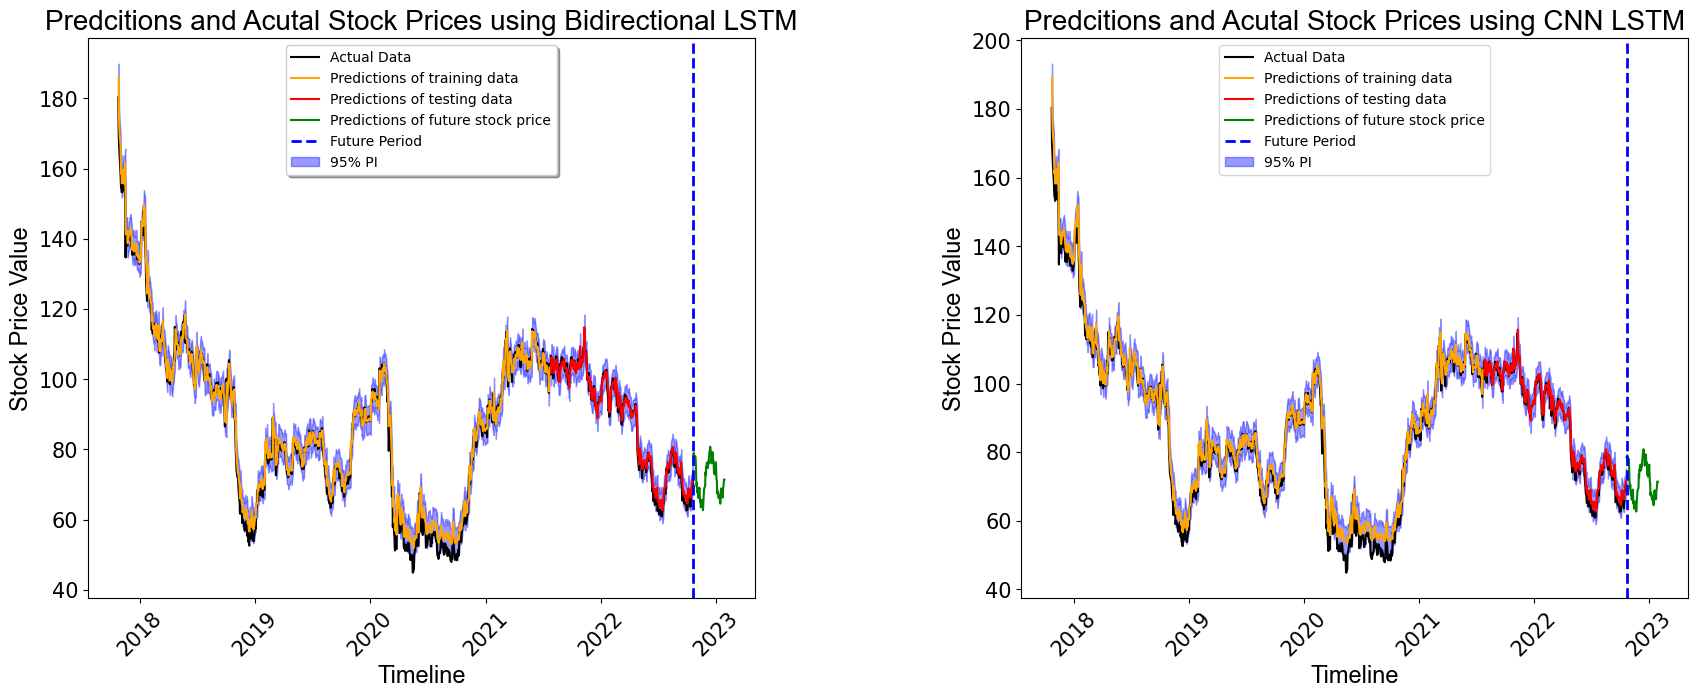

In [406]:
fig=plt.subplots(1, 2, figsize = (20, 7))
ax3=plt.subplot(1,2,1)
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
plt.plot(PREDICTION_TRAIN_BIDIRECTION.index,PREDICTION_TRAIN_BIDIRECTION['Open'],color='orange',label="Predictions of training data")
plt.plot(PREDICTION_TEST_BIDIRECTION.index,PREDICTION_TEST_BIDIRECTION['Open'],color='red',label="Predictions of testing data")
plt.plot(futurePreds_bidirectional.index,futurePreds_bidirectional['Open'],color='green',label="Predictions of future stock price")
plt.axvline(x = min(futurePreds_bidirectional.index), color='blue', linewidth=2, linestyle='--',label="Future Period")
plt.fill_between(PREDICTION_TRAIN_BIDIRECTION.index, (PREDICTION_TRAIN_BIDIRECTION['Open']-train_band_size), (PREDICTION_TRAIN_BIDIRECTION['Open']+train_band_size), color='blue', alpha=.4)
plt.fill_between(PREDICTION_TEST_BIDIRECTION.index, (PREDICTION_TEST_BIDIRECTION['Open']-test_band_size), (PREDICTION_TEST_BIDIRECTION['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#plt.set_title("Predictions w/ 95% Confidence")
plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices using Bidirectional LSTM', family='Arial', fontsize=20)
plt.xlabel('Timeline', family='Arial', fontsize=17)
plt.ylabel('Stock Price Value', family='Arial', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)



ax4=plt.subplot(1,2,2)
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
plt.plot(PREDICTION_TRAIN_CNN.index,PREDICTION_TRAIN_CNN['Open'],color='orange',label="Predictions of training data")
plt.plot(PREDICTION_TEST_CNN.index,PREDICTION_TEST_CNN['Open'],color='red',label="Predictions of testing data")
plt.plot(futurePreds_cnn.index,futurePreds_cnn['Open'],color='green',label="Predictions of future stock price")
plt.axvline(x = min(futurePreds_cnn.index), color='blue', linewidth=2, linestyle='--',label="Future Period")
plt.fill_between(PREDICTION_TRAIN_CNN.index, (PREDICTION_TRAIN_CNN['Open']-train_band_size), (PREDICTION_TRAIN_CNN['Open']+train_band_size), color='blue', alpha=.4)
plt.fill_between(PREDICTION_TEST_CNN.index, (PREDICTION_TEST_CNN['Open']-test_band_size), (PREDICTION_TEST_CNN['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#plt.set_title("Predictions w/ 95% Confidence")
plt.legend(loc='best')
plt.title('Predcitions and Acutal Stock Prices using CNN LSTM', family='Arial', fontsize=20)
plt.xlabel('Timeline', family='Arial', fontsize=17)
plt.ylabel('Stock Price Value', family='Arial', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)


plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 

plt.show()

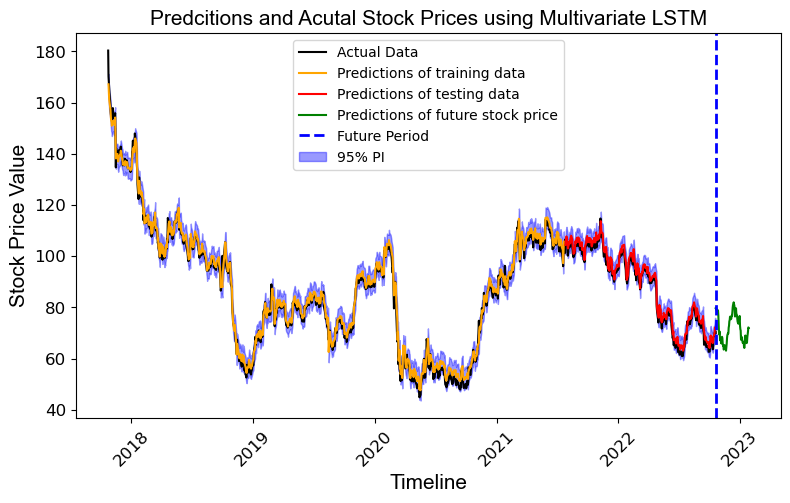

In [404]:
fig=plt.subplots(1, 2, figsize = (20, 5))
ax5=plt.subplot(1,2,2).set_visible(False)
#fig = plt.figure(figsize=(8,5))
ax4=plt.subplot(1,2,1)
plt.plot(df.index,df['Open'],color='black',label="Actual Data")
plt.plot(PREDICTION_TRAIN_MULTI.index,PREDICTION_TRAIN_MULTI['Open'],color='orange',label="Predictions of training data")
plt.plot(PREDICTION_TEST_MULTI.index,PREDICTION_TEST_MULTI['Open'],color='red',label="Predictions of testing data")
plt.plot(futurePreds_multi.index,futurePreds_multi['Open'],color='green',label="Predictions of future stock price")
plt.axvline(x = min(futurePreds_multi.index), color='blue', linewidth=2, linestyle='--',label="Future Period")
plt.fill_between(PREDICTION_TRAIN_MULTI.index, (PREDICTION_TRAIN_MULTI['Open']-train_band_size), (PREDICTION_TRAIN_MULTI['Open']+train_band_size), color='blue', alpha=.4)
plt.fill_between(PREDICTION_TEST_MULTI.index, (PREDICTION_TEST_MULTI['Open']-test_band_size), (PREDICTION_TEST_MULTI['Open']+test_band_size), color='blue', alpha=.4,label='95% PI')
#plt.set_title("Predictions w/ 95% Confidence")
plt.legend(loc='best')
plt.title('Predcitions and Acutal Stock Prices using Multivariate LSTM', family='Arial', fontsize=15)
plt.xlabel('Timeline', family='Arial', fontsize=15)
plt.ylabel('Stock Price Value', family='Arial', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

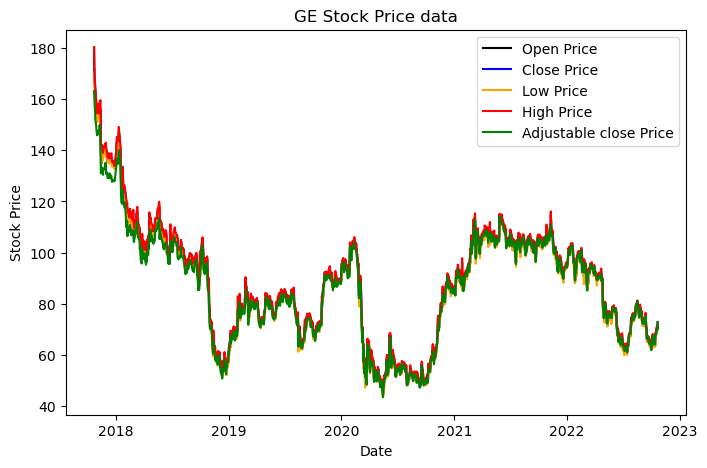

In [435]:
fig = plt.figure(figsize=(8,5))
plt.plot(dates,data.Open, color='black',label='Open Price')
plt.plot(dates,data.Close, color='blue',label='Close Price')
plt.plot(dates,data.Low, color='orange',label='Low Price')
plt.plot(dates,data.High, color='red',label='High Price')
plt.plot(dates,data['Adj Close'], color='green',label='Adjustable close Price')
plt.legend()
plt.title("GE Stock Price data")
plt.xlabel("Date")
plt.ylabel('Stock Price')
plt.show()